# Acquire and Summarize

1. Acquire data from the cloud database.

    You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.

    - [x] Be sure to do the correct join (inner, outer, etc.).
        - Don't eliminate properties only because they have a null value for airconditioningtypeid.
    - [x] Only include properties with a transaction in 2017
    - [x] include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction. (Hint: read the docs for the .duplicated method)
    - [x] Only include properties that have a latitude and longitude value.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

import sys
import os
home_directory_path = os.path.expanduser('~')
sys.path.append(home_directory_path +'/utils')
import acquire_utils
import env

In [2]:
query ='''SELECT *
            FROM zillow.properties_2017 AS pro
            JOIN zillow.predictions_2017 AS pre USING (parcelid)
            LEFT JOIN zillow.airconditioningtype AS act USING (airconditioningtypeid)
            LEFT JOIN zillow.architecturalstyletype AS ast USING (architecturalstyletypeid)
            LEFT JOIN zillow.buildingclasstype AS bst USING (buildingclasstypeid)
            LEFT JOIN zillow.heatingorsystemtype AS hst USING (heatingorsystemtypeid)
            LEFT JOIN zillow.propertylandusetype AS plut USING (propertylandusetypeid)
            LEFT JOIN zillow.storytype AS st USING (storytypeid)
            LEFT JOIN zillow.typeconstructiontype AS tct USING (typeconstructiontypeid);
        '''

db = 'zillow'

filename = 'data/zillow_raw.csv'

def get_connection(db, user=env.user, host=env.host, password=env.pwd):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    

def get_sql_data(sql_query, db, filename):
    '''
    If the csv file exists, it is read and returned as a pandas DataFrame
    If not, pandas reads in a SQL query that acquires telco customer data from a MySQL database.
    The query is stored into a DataFrame, saved, and returned.
    '''
    # Read the SQL query into a dataframe
    df = pd.read_sql(sql_query,
                        get_connection(db))
    # Write that DataFrame for prep
    df.to_csv(filename, index=False)
    # Return the DataFrame
    return df

In [3]:
df = get_sql_data(query, db, filename)

In [4]:
df.isna().sum()

typeconstructiontypeid          77391
storytypeid                     77564
propertylandusetypeid              34
heatingorsystemtypeid           28042
buildingclasstypeid             77599
architecturalstyletypeid        77407
airconditioningtypeid           52607
parcelid                            0
id                                  0
basementsqft                    77564
bathroomcnt                        34
bedroomcnt                         34
buildingqualitytypeid           27804
calculatedbathnbr                 650
decktypeid                      77000
finishedfloor1squarefeet        71577
calculatedfinishedsquarefeet      235
finishedsquarefeet12             3690
finishedsquarefeet13            77572
finishedsquarefeet15            74587
finishedsquarefeet50            71577
finishedsquarefeet6             77228
fips                               34
fireplacecnt                    69325
fullbathcnt                       650
garagecarcnt                    52094
garagetotals

Only include properties with a transaction in 2017

In [5]:
df = df[df['transactiondate'].str.startswith('2017')]

Only include properties that have a latitude and longitude value.

In [6]:
df = df.dropna(subset=['latitude','longitude'])

Include only the last transaction for duplicate property ID's

In [7]:
df = df.sort_values('transactiondate', ascending=False).drop_duplicates('parcelid')

In [8]:
df

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
77612,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12826780,1187175,NaN,2.0,3.0,6.0,2.0,NaN,NaN,1762.0,1762.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,33937685.0,-117996709.0,6347.0,NaN,NaN,NaN,NaN,NaN,0100,WHR16000*,6.037503e+07,14634.0,3101.0,NaN,96171.0,0.0,NaN,1.0,NaN,NaN,1955.0,NaN,NaN,140000.0,522000.0,2016.0,382000.0,6317.15,None,NaN,6.037503e+13,77612,0.007204,2017-09-25,None,None,None,Central,Single Family Residential,None,None
77611,NaN,NaN,261.0,2.0,NaN,NaN,1.0,12773139,1843709,NaN,1.0,3.0,4.0,1.0,NaN,NaN,1032.0,1032.0,NaN,NaN,NaN,NaN,6037.0,NaN,1.0,NaN,NaN,NaN,34040895.0,-118038169.0,5074.0,NaN,NaN,NaN,NaN,NaN,0100,SER1*,6.037434e+07,36502.0,3101.0,NaN,96480.0,0.0,NaN,1.0,NaN,NaN,1954.0,NaN,NaN,32797.0,49546.0,2016.0,16749.0,876.43,None,NaN,6.037434e+13,77611,0.037129,2017-09-21,Central,None,None,Central,Single Family Residential,None,None
77610,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17239384,2968375,NaN,2.0,4.0,NaN,2.0,NaN,1612.0,1612.0,1612.0,NaN,NaN,1612.0,NaN,6111.0,1.0,2.0,2.0,560.0,NaN,34300140.0,-118706327.0,12105.0,NaN,NaN,NaN,NaN,NaN,1111,None,6.111008e+07,27110.0,2061.0,NaN,97116.0,7.0,NaN,NaN,656.0,NaN,1964.0,1.0,NaN,50683.0,67205.0,2016.0,16522.0,1107.48,None,NaN,6.111008e+13,77610,0.013209,2017-09-21,None,None,None,None,Single Family Residential,None,None
77609,NaN,NaN,261.0,2.0,NaN,NaN,NaN,11000655,673515,NaN,2.0,2.0,6.0,2.0,NaN,NaN,1286.0,1286.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,34245368.0,-118282383.0,47405.0,NaN,NaN,NaN,NaN,NaN,0100,LARE40,6.037101e+07,12447.0,3101.0,27328.0,96284.0,0.0,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,70917.0,354621.0,2016.0,283704.0,4478.43,None,NaN,6.037101e+13,77609,0.020615,2017-09-20,None,None,None,Central,Single Family Residential,None,None
77608,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10833991,2864704,NaN,3.0,3.0,8.0,3.0,NaN,NaN,1741.0,1741.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,34202400.0,-118502000.0,59487.0,1.0,NaN,NaN,NaN,1.0,010C,LARD3,6.037132e+07,12447.0,3101.0,32368.0,96415.0,0.0,NaN,1.0,NaN,NaN,1980.0,NaN,NaN,265000.0,379000.0,2016.0,114000.0,4685.34,None,NaN,6.037132e+13,77608,-0.002245,2017-09-20,Central,None,None,Central,Condominium,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,NaN,NaN,266.0,NaN,NaN,NaN,NaN,17143294,1447245,NaN,2.0,3.0,NaN,2.0,NaN,842.0,1492.0,1492.0,NaN,NaN,842.0,NaN,6111.0,1.0,2.0,2.0,0.0,NaN,34230044.0,-118993991.0,903.0,NaN,NaN,NaN,NaN,NaN,1129,None,6.111005e+07,51239.0,2061.0,NaN,97091.0,6.0,NaN,NaN,NaN,NaN,1982.0,2.0,NaN,198640.0,331064.0,2016.0,132424.0,3508.10,None,NaN,6.111005e+13,5,-0.020526,2017-01-01,None,None,None,None,Condominium,None,None
4,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10887214,1970746,NaN,3.0,3.0,8.0,3.

Drop redundant columns

In [9]:
df = df.iloc[:,7:].drop(columns='id')

2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

,parcelid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,7.738100e+04,50.000000,77381.000000,77381.000000,49672.000000,76772.000000,614.0,6023.000000,77185.000000,73749.000000,41.000000,3009.000000,6023.000000,386.000000,77381.000000,8276.000000,76772.000000,25474.000000,25474.000000,1538.0,7.738100e+04,7.738100e+04,6.914200e+04,16137.0,867.000000,464.0,1074.0,15042.0,7.738100e+04,75910.000000,77381.000000,30890.000000,77331.000000,77381.000000,10096.000000,50563.000000,2388.000000,70.000000,77118.000000,17560.000000,172.0,7.726900e+04,7.738000e+04,77381.0,7.737900e+04,77376.000000,2886.000000,7.713700e+04,77381.000000
mean,1.300715e+07,679.720000,2.299130,3.053489,6.534587,2.316867,66.0,1366.512535,1785.219939,1760.522543,1389.853659,2357.791625,1381.771542,2082.500000,6048.819232,1.191155,2.250482,1.815459,350.111957,1.0,3.400837e+07,-1.182036e+08,2.996928e+04,1.0,517.916955,1.0,1.0,1.0,6.049129e+07,33671.242708,2534.158333,187734.864066,96587.086822,1.476952,1.009608,1.110021,305.411223,216.385714,1968.635831,1.434738,1.0,1.893145e+05,4.901345e+05,2016.0,3.010954e+05,5995.532346,14.087318,6.049673e+13,0.016625
std,3.481346e+06,689.703546,0.996651,1.139096,1.721953,0.979755,0.0,671.308125,954.049286,934.024340,123.531688,1188.775210,726.468878,1240.382784,20.748199,0.491080,0.966552,0.588345,261.681641,0.0,2.653888e+05,3.594826e+05,1.233711e+05,0.0,156.716017,0.0,0.0,0.0,2.059052e+05,47169.815982,801.593352,165118.791740,3798.347098,2.824386,0.118630,1.171154,238.392793,190.177514,23.786032,0.544569,0.0,2.300874e+05,6.534440e+05,0.0,4.925960e+05,7622.844153,2.185663,1.535242e+12,0.170191
min,1.071186e+07,38.000000,0.000000,0.000000,1.000000,1.000000,66.0,44.000000,128.000000,128.000000,1056.000000,598.000000,44.000000,380.000000,6037.000000,1.000000,1.000000,0.000000,0.000000,1.0,3.333953e+07,-1.194754e+08,2.360000e+02,1.0,24.000000,1.0,1.0,1.0,6.037101e+07,3491.000000,1286.000000,6952.000000,95982.000000,0.000000,1.000000,1.000000,11.000000,12.000000,1824.000000,1.000000,1.0,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,-4.655420
25%,1.153830e+07,273.000000,2.000000,2.000000,6.000000,2.000000,66.0,955.000000,1182.000000,1172.000000,1344.000000,1625.000000,956.000000,993.750000,6037.000000,1.000000,2.000000,2.000000,0.000000,1.0,3.381457e+07,-1.184153e+08,5.700000e+03,1.0,424.000000,1.0,1.0,1.0,6.037311e+07,12447.000000,1286.000000,46736.000000,96193.000000,0.000000,1.000000,1.000000,170.000000,61.500000,1953.000000,1.000000,1.0,8.426500e+04,2.070000e+05,2016.0,8.550400e+04,2715.632500,14.000000,6.037311e+13,-0.024377
50%,1.253157e+07,515.000000,2.000000,3.000000,6.000000,2.000000,66.0,1257.000000,1543.000000,1523.000000,1440.000000,2094.000000,1259.000000,1812.500000,6037.000000,1.000000,2.000000,2.000000,436.000000,1.0,3.402200e+07,-1.181808e+08,7.206000e+03,1.0,500.000000,1.0,1.0,1.0,6.037603e+07,25218.000000,3101.000000,118849.000000,96389.000000,0.000000,1.000000,1.000000,251.000000,164.500000,1970.000000,1.000000,1.0,1.364990e+05,3.589755e+05,2016.0,2.033720e+05,4450.695000,15.000000,6.037603e+13,0.006627
75%,1.421183e+07,796.500000,3.000000,4.000000,8.000000,3.000000,66.0,1615.000000,2113.000000,2076.000000,1440.000000,2838.000000,1621.500000,3053.500000,6059.000000,1.000000,3.000000,2.0000

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77381 entries, 77612 to 0
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77381 non-null  int64  
 1   basementsqft                  50 non-null     float64
 2   bathroomcnt                   77381 non-null  float64
 3   bedroomcnt                    77381 non-null  float64
 4   buildingqualitytypeid         49672 non-null  float64
 5   calculatedbathnbr             76772 non-null  float64
 6   decktypeid                    614 non-null    float64
 7   finishedfloor1squarefeet      6023 non-null   float64
 8   calculatedfinishedsquarefeet  77185 non-null  float64
 9   finishedsquarefeet12          73749 non-null  float64
 10  finishedsquarefeet13          41 non-null     float64
 11  finishedsquarefeet15          3009 non-null   float64
 12  finishedsquarefeet50          6023 non-null   float64
 13  f

None

------------------------------
PARCELID


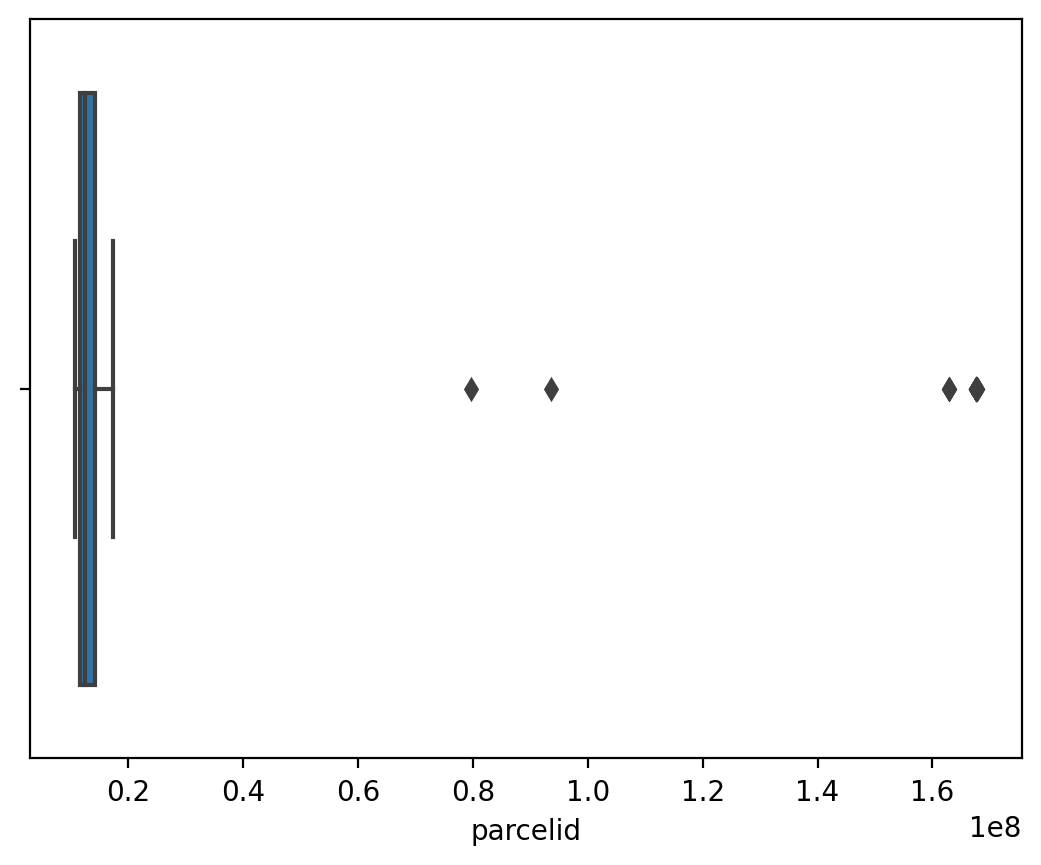

------------------------------
BASEMENTSQFT


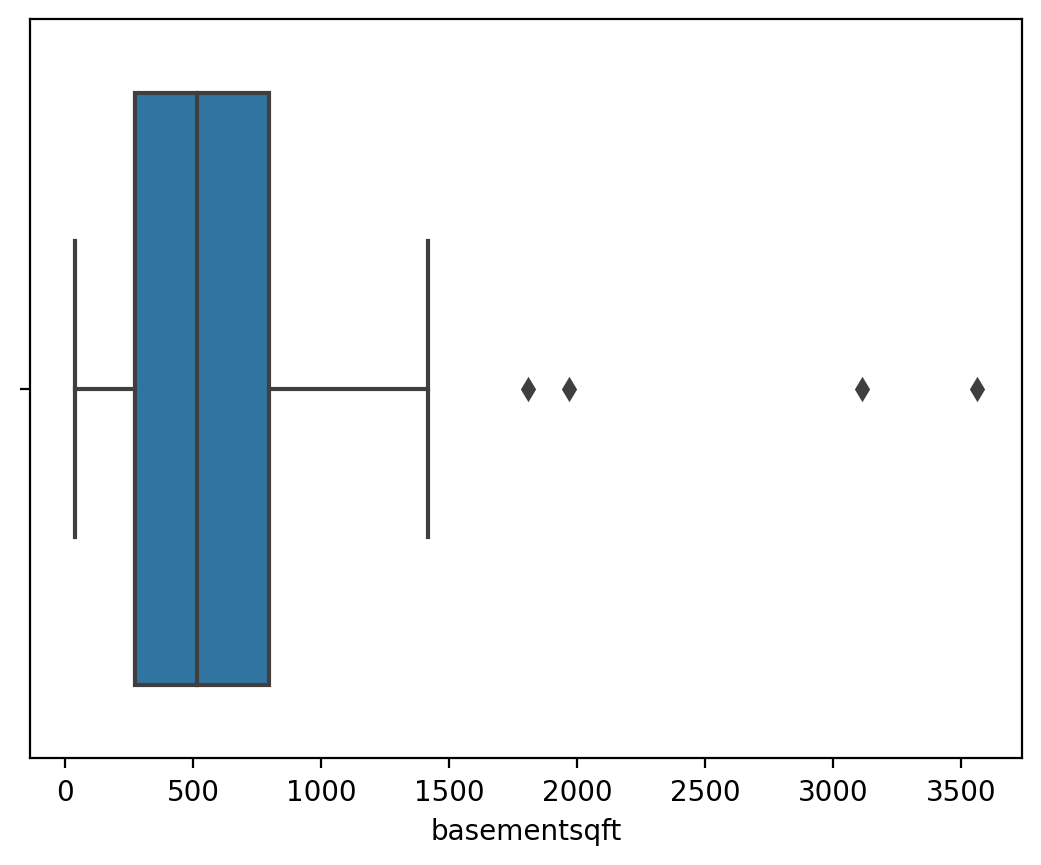

------------------------------
BATHROOMCNT


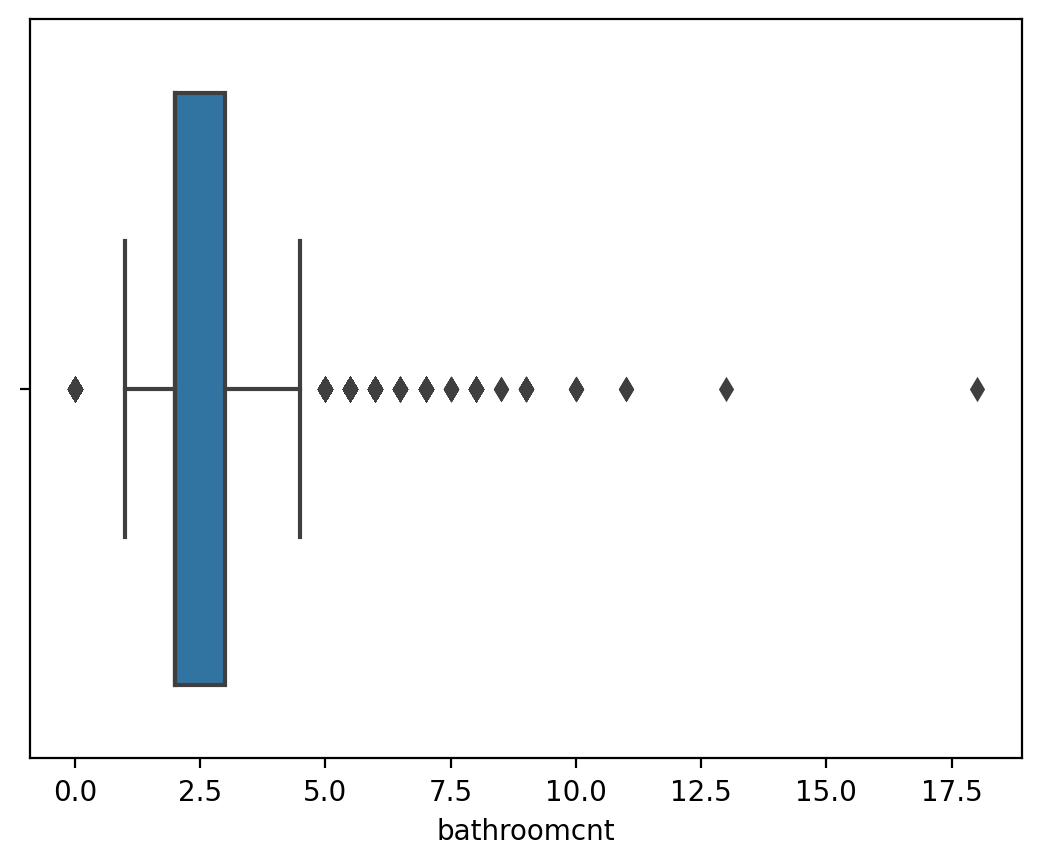

------------------------------
BEDROOMCNT


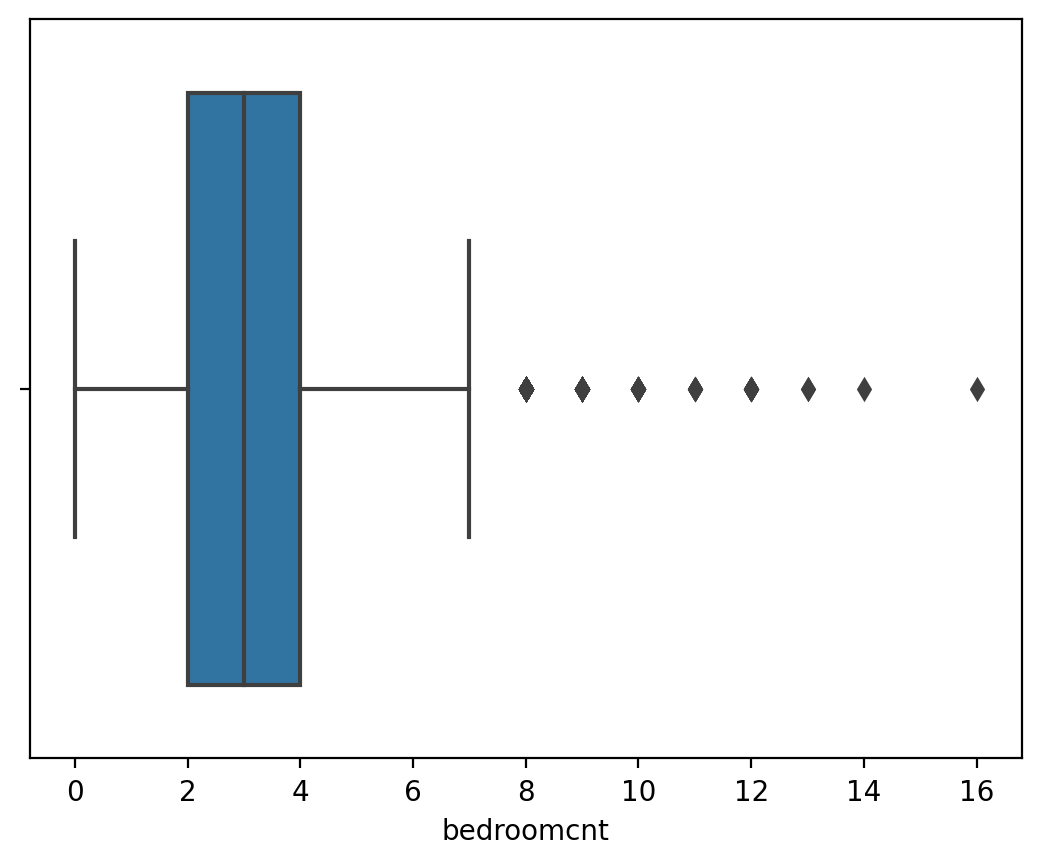

------------------------------
BUILDINGQUALITYTYPEID


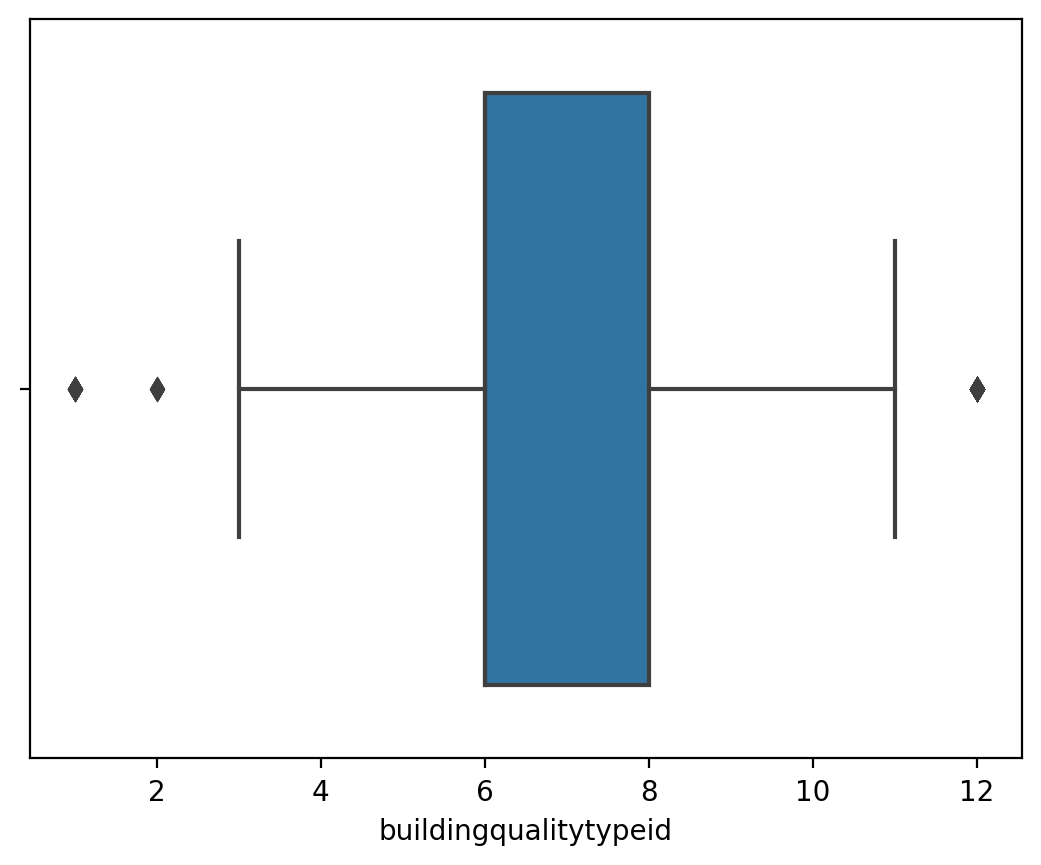

------------------------------
CALCULATEDBATHNBR


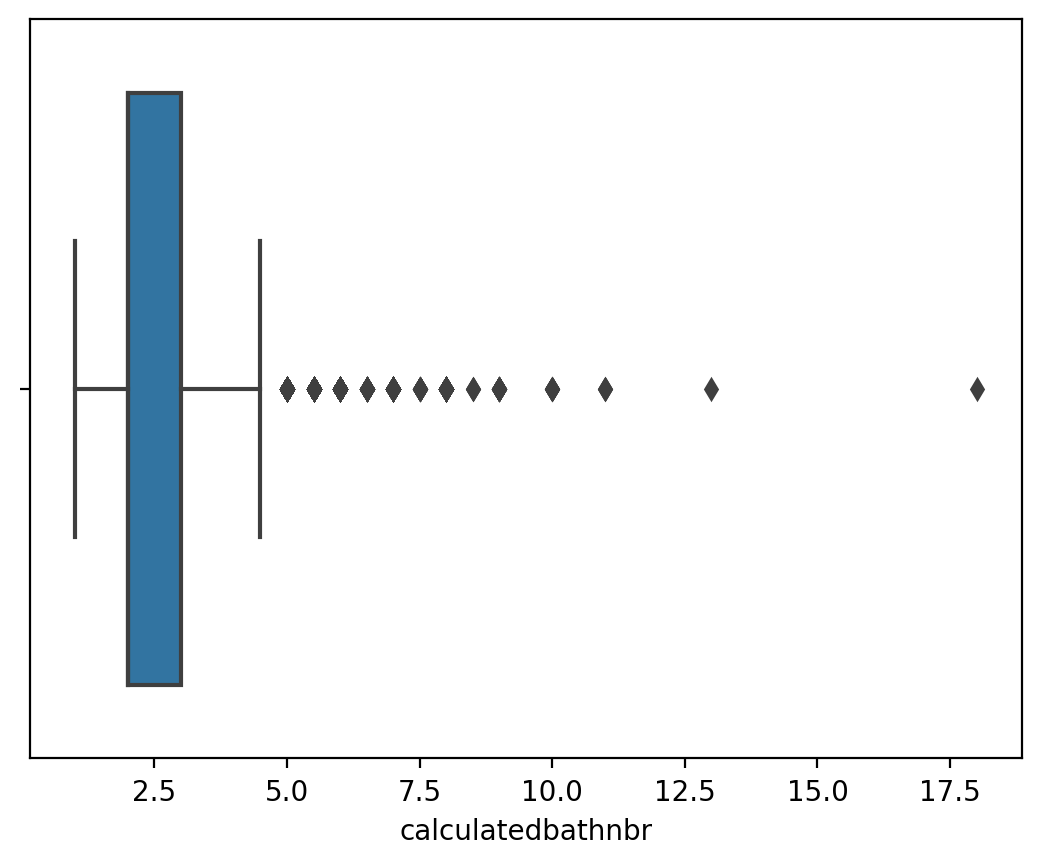

------------------------------
DECKTYPEID


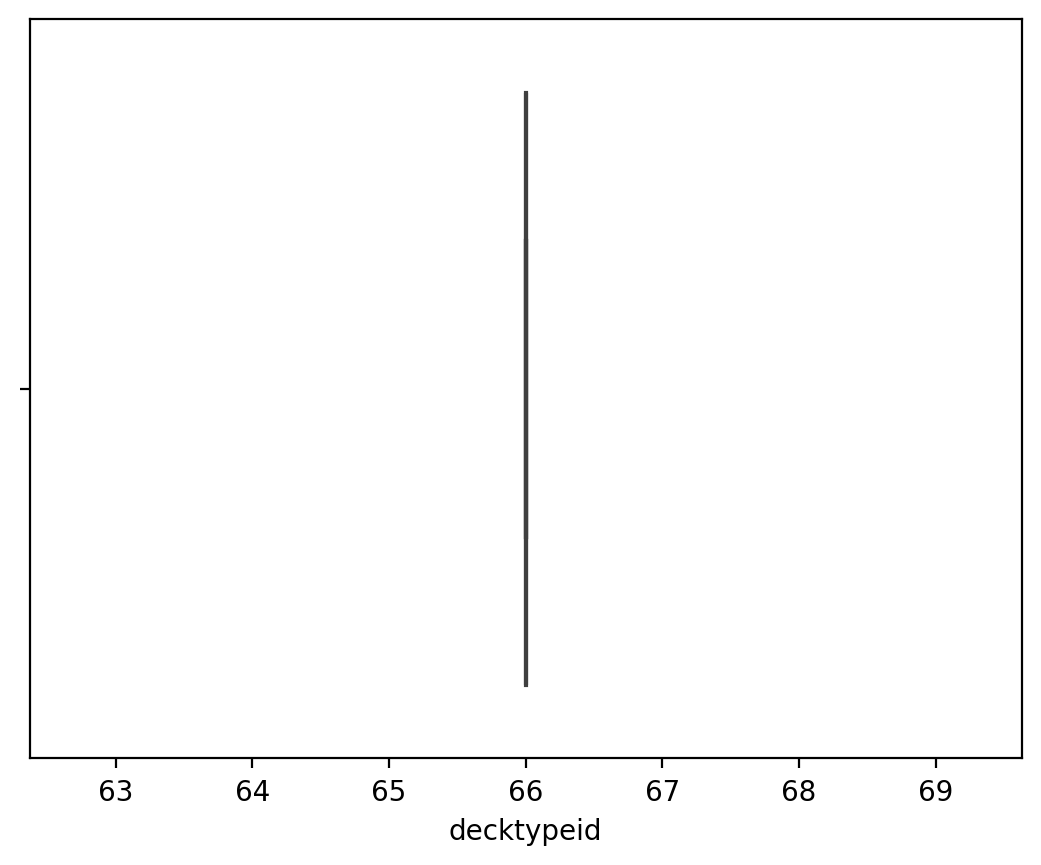

------------------------------
FINISHEDFLOOR1SQUAREFEET


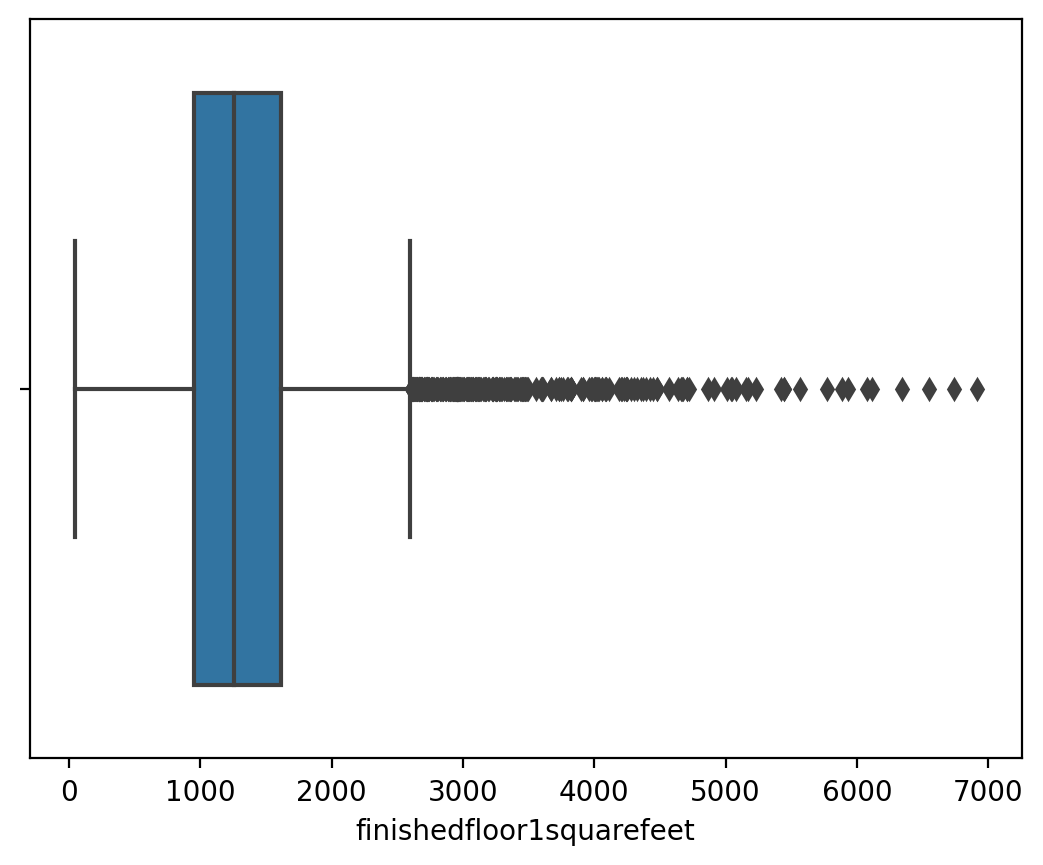

------------------------------
CALCULATEDFINISHEDSQUAREFEET


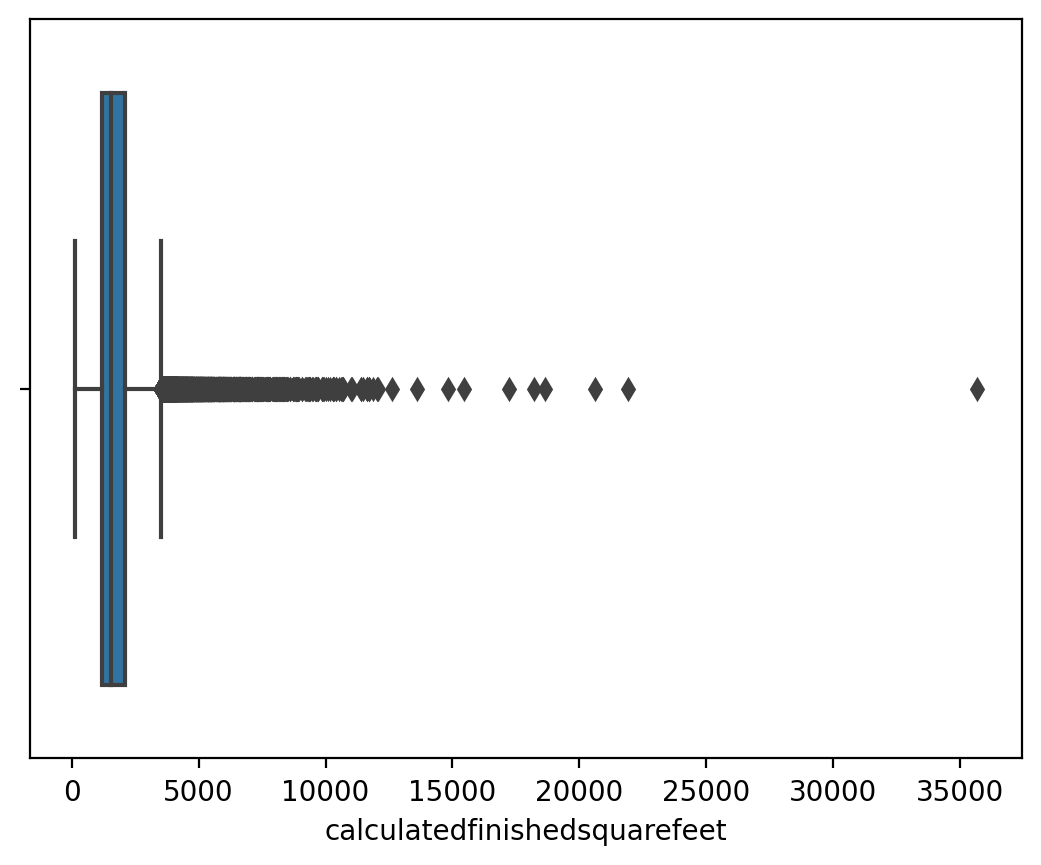

------------------------------
FINISHEDSQUAREFEET12


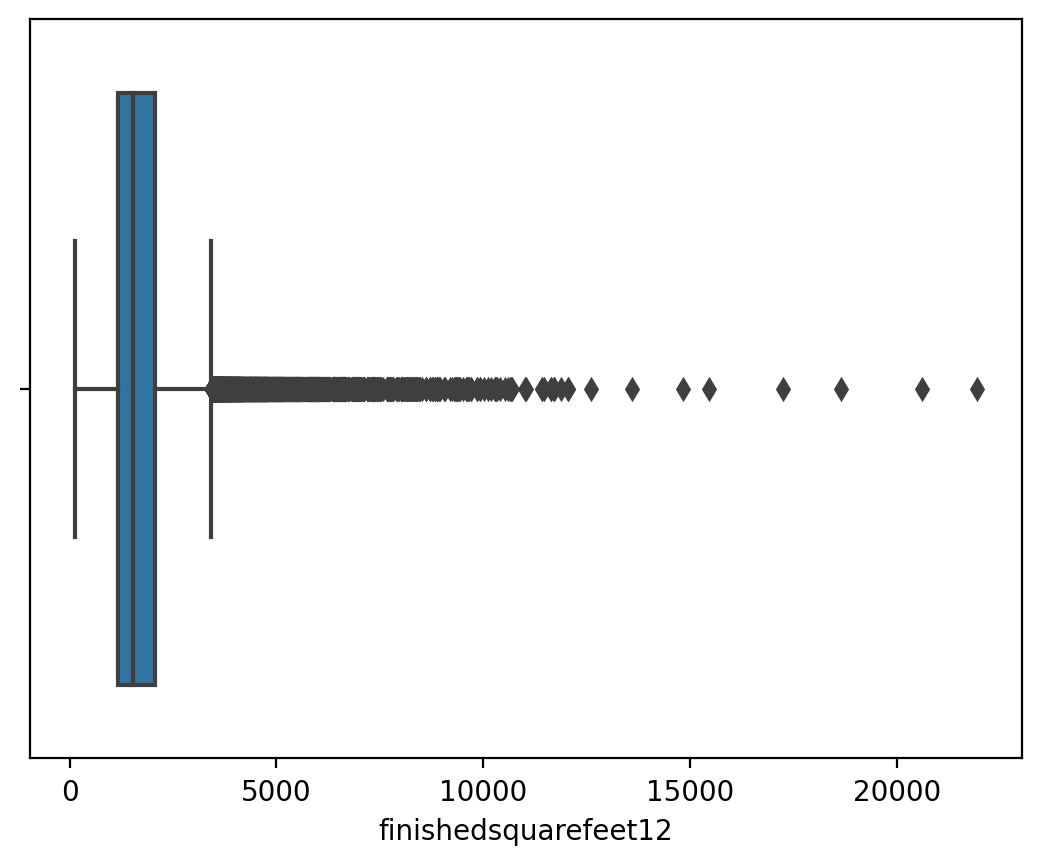

------------------------------
FINISHEDSQUAREFEET13


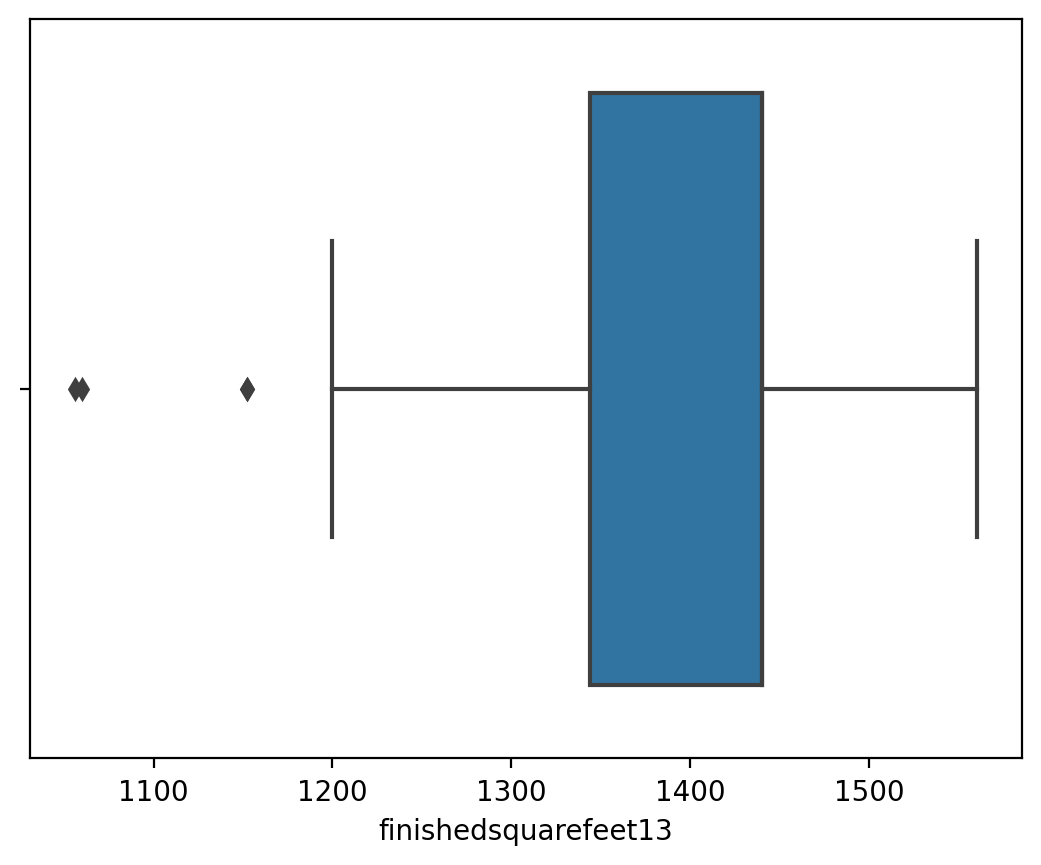

------------------------------
FINISHEDSQUAREFEET15


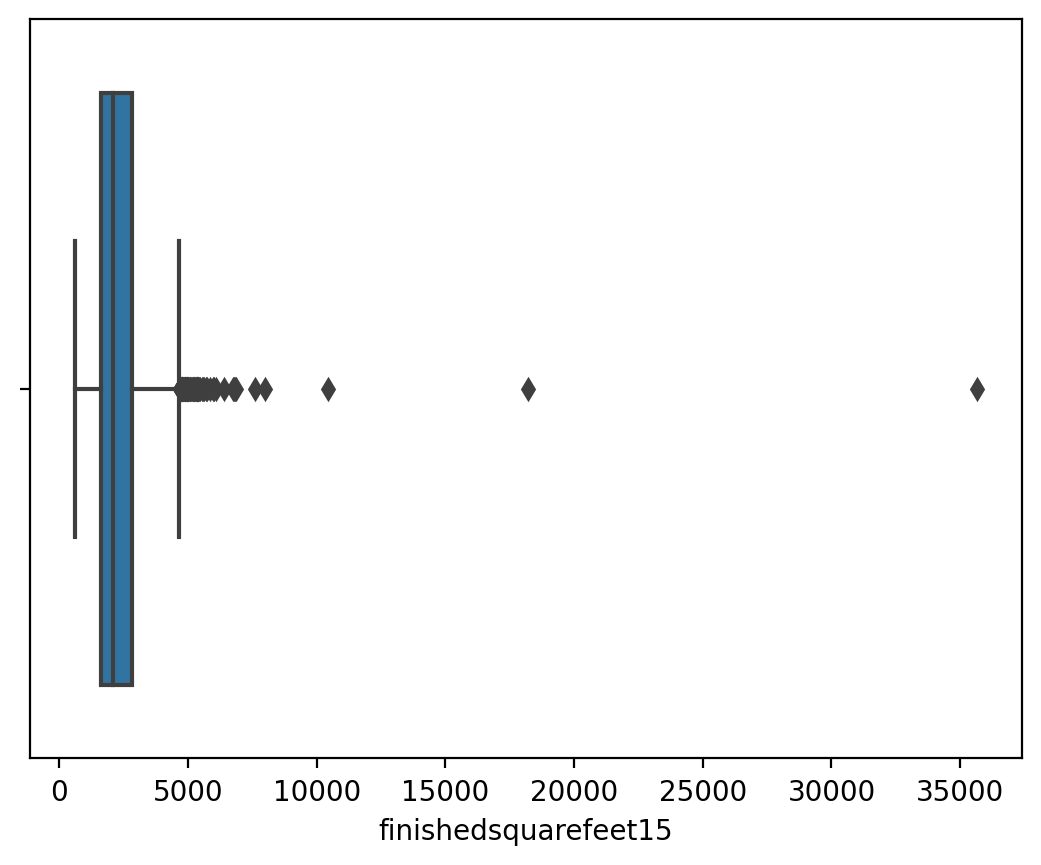

------------------------------
FINISHEDSQUAREFEET50


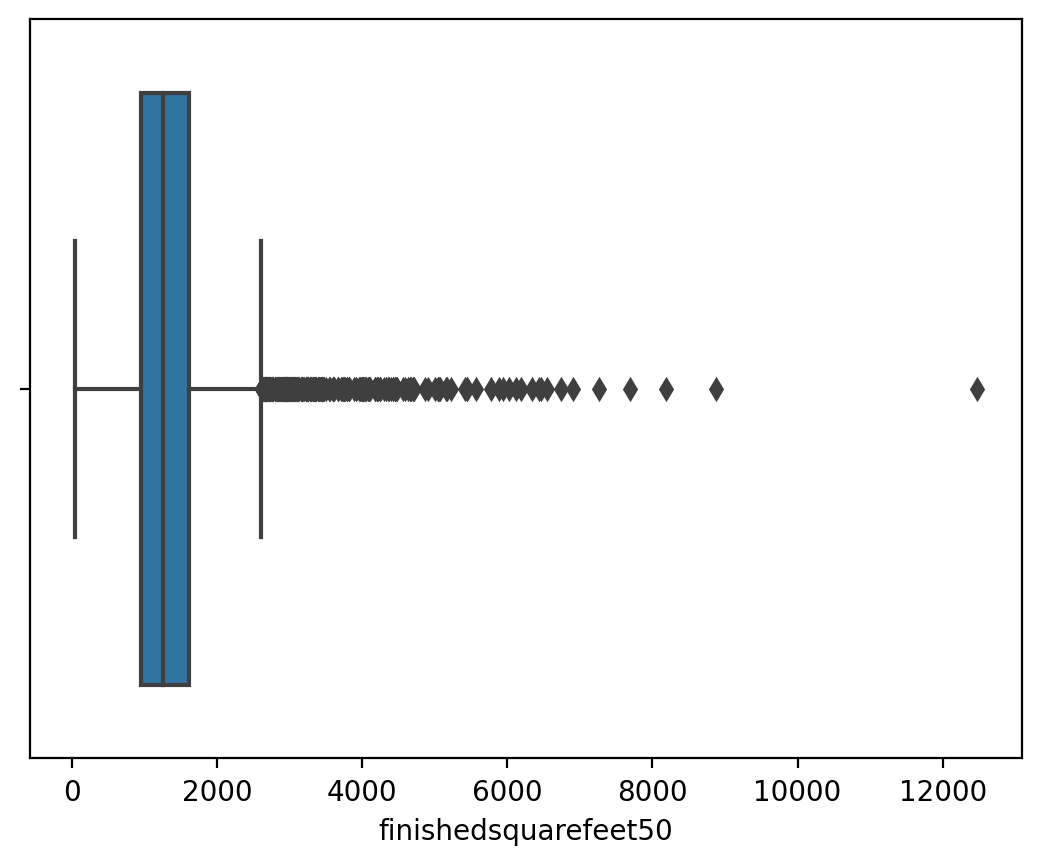

------------------------------
FINISHEDSQUAREFEET6


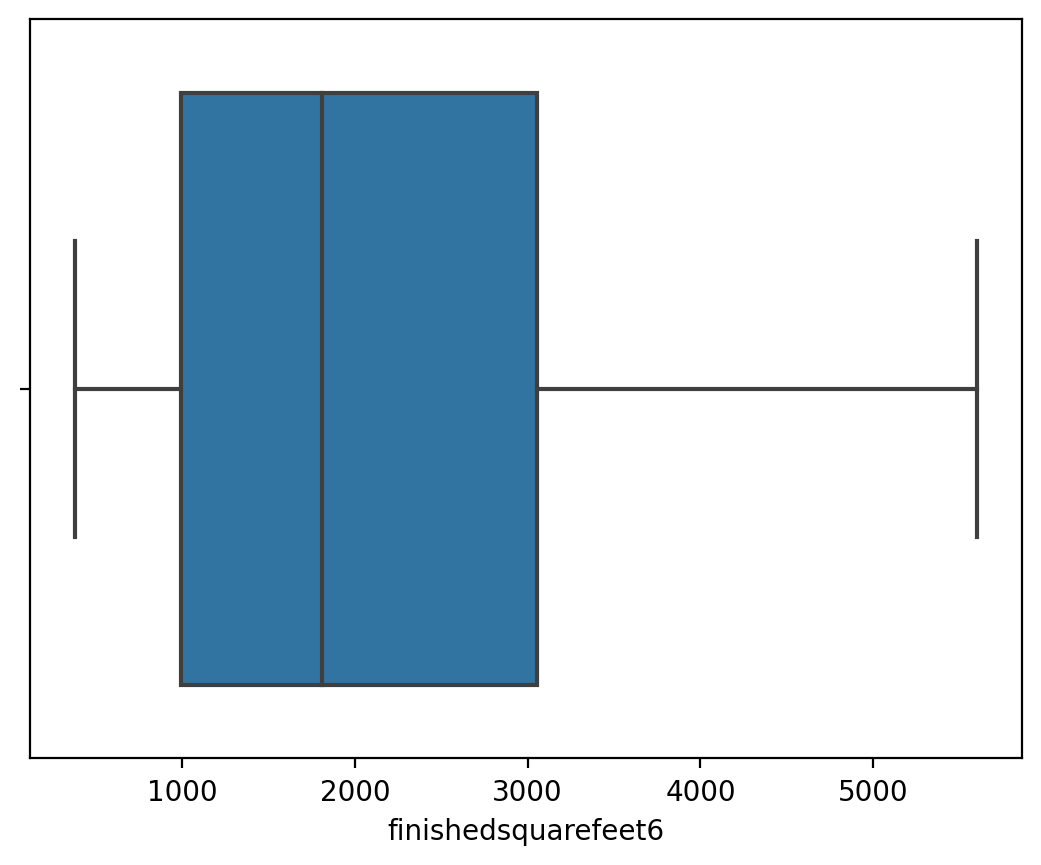

------------------------------
FIPS


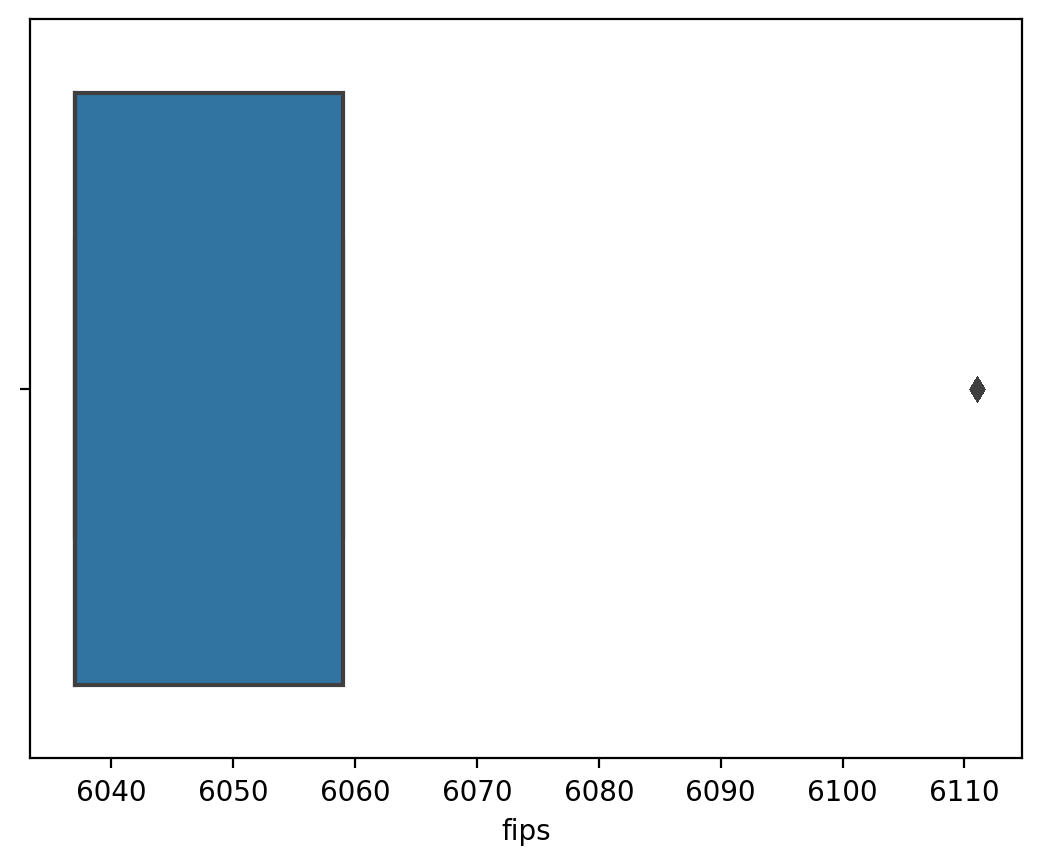

------------------------------
FIREPLACECNT


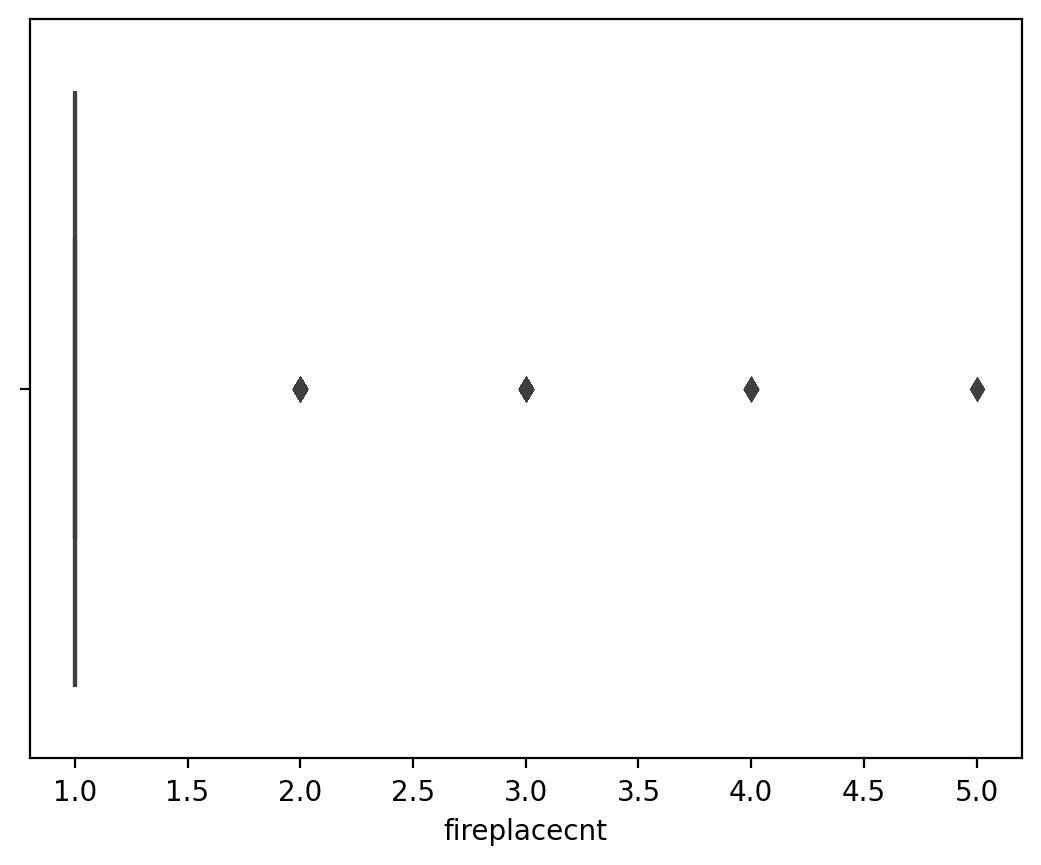

------------------------------
FULLBATHCNT


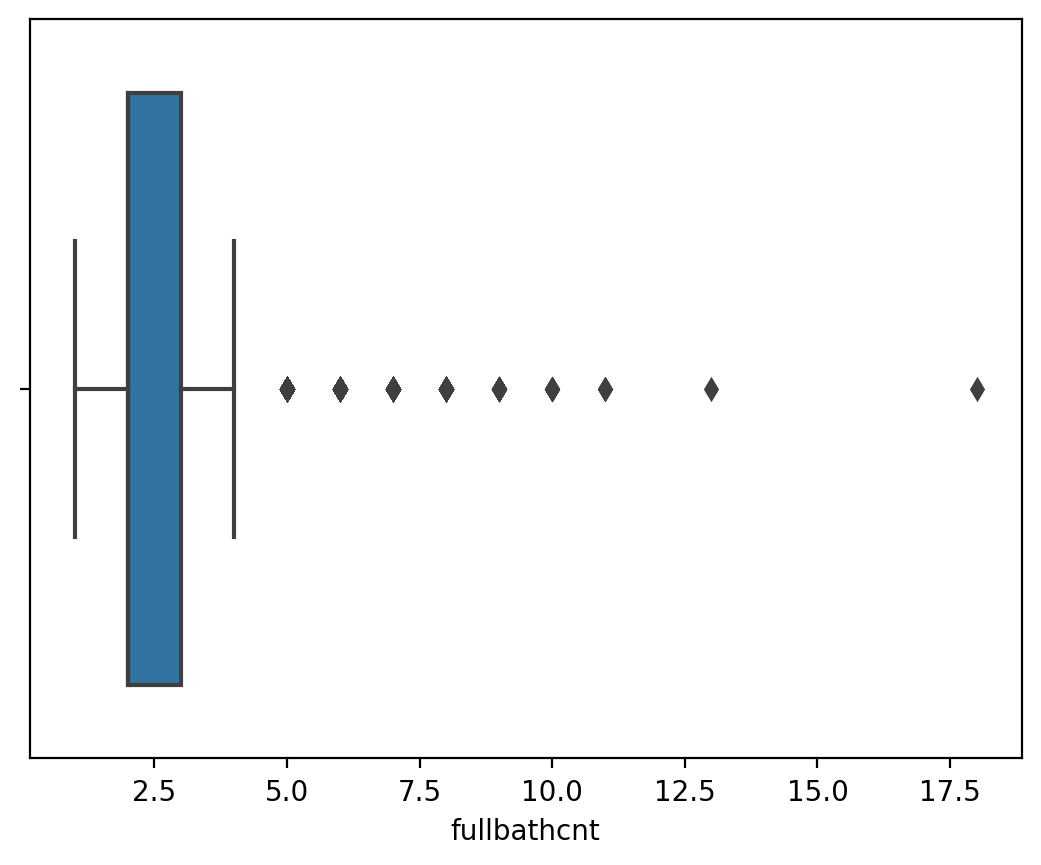

------------------------------
GARAGECARCNT


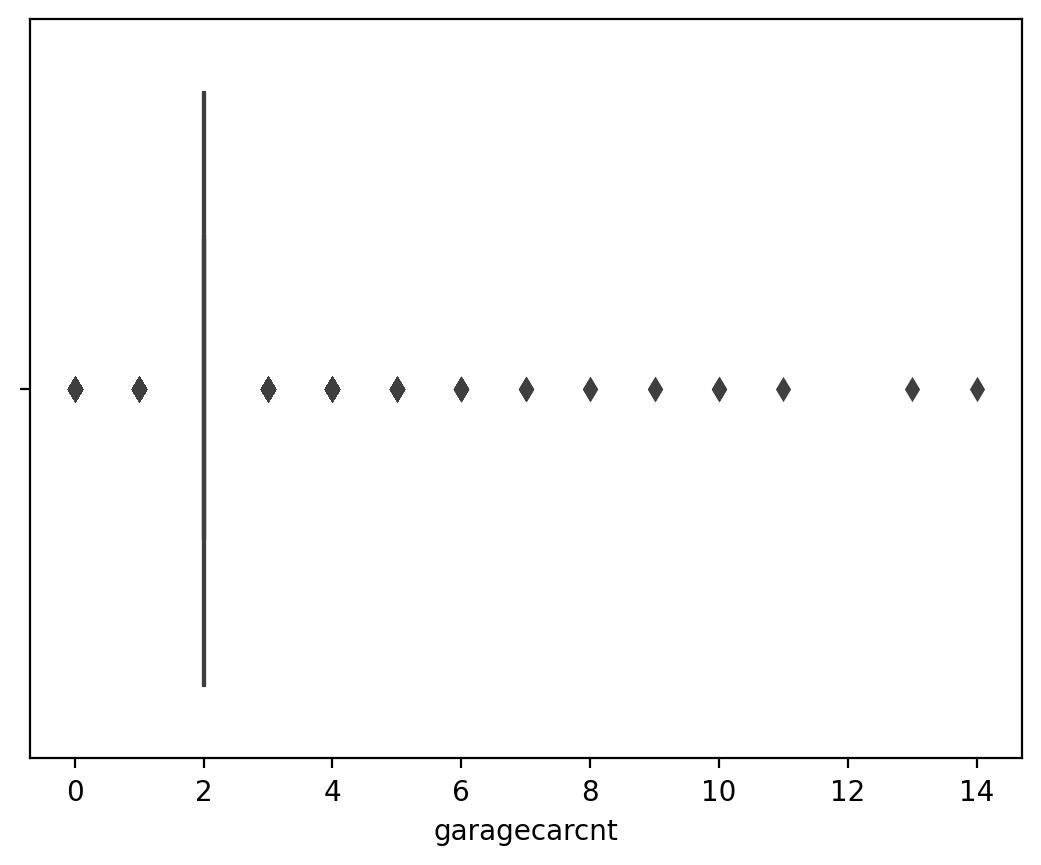

------------------------------
GARAGETOTALSQFT


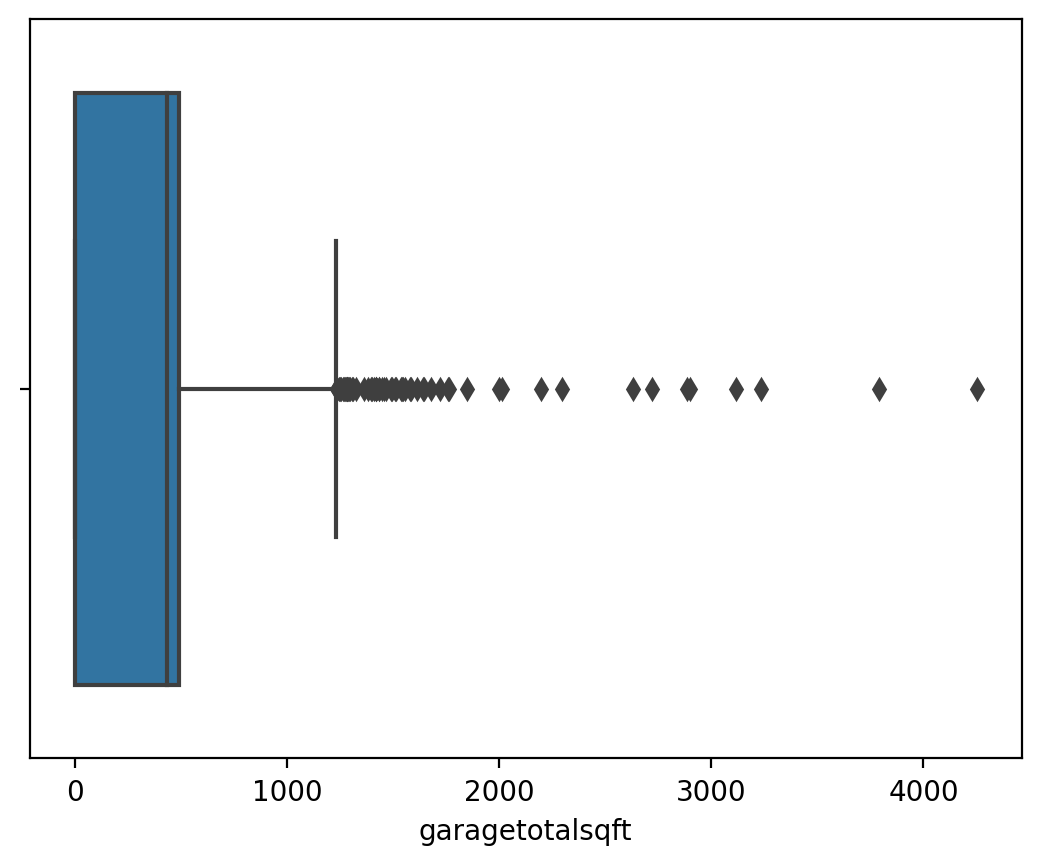

------------------------------
HASHOTTUBORSPA


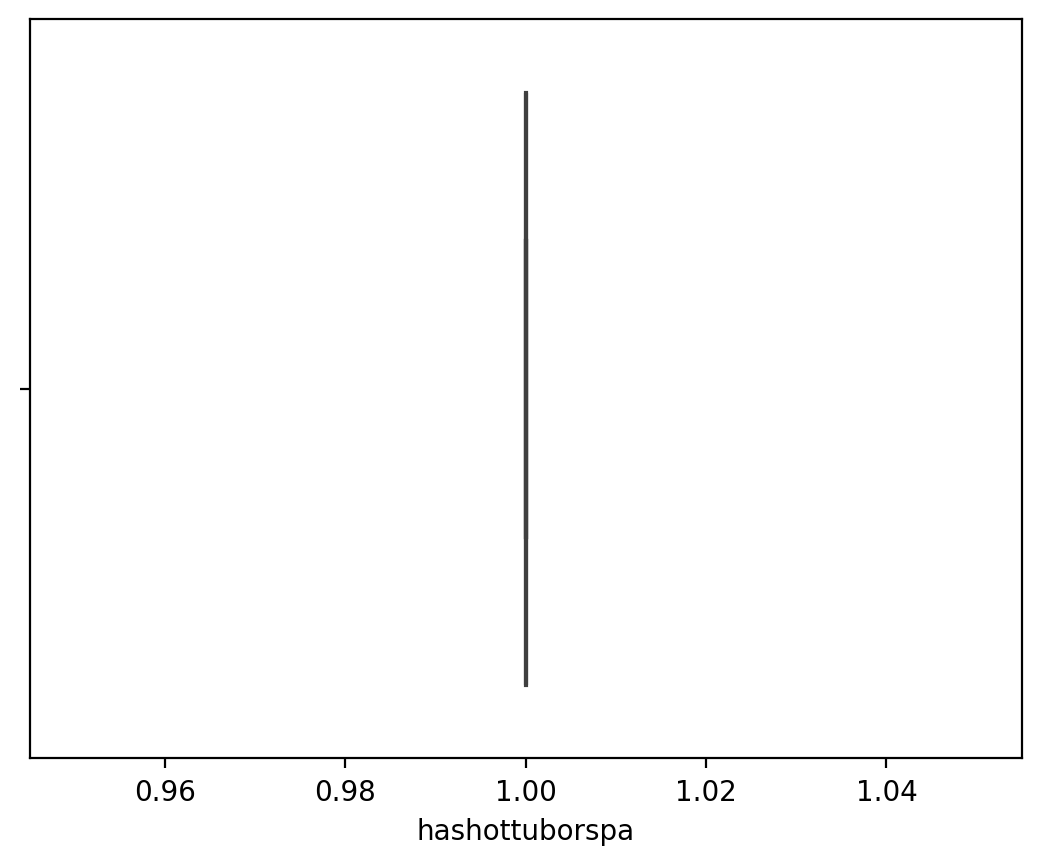

------------------------------
LATITUDE


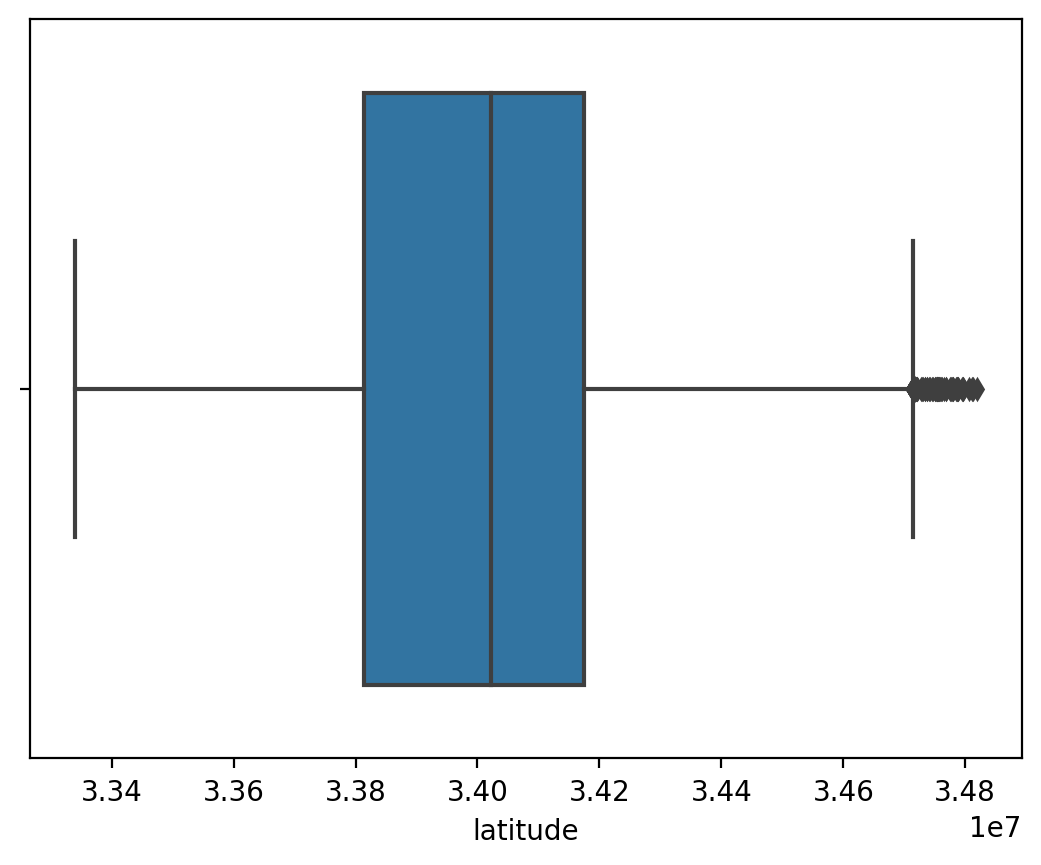

------------------------------
LONGITUDE


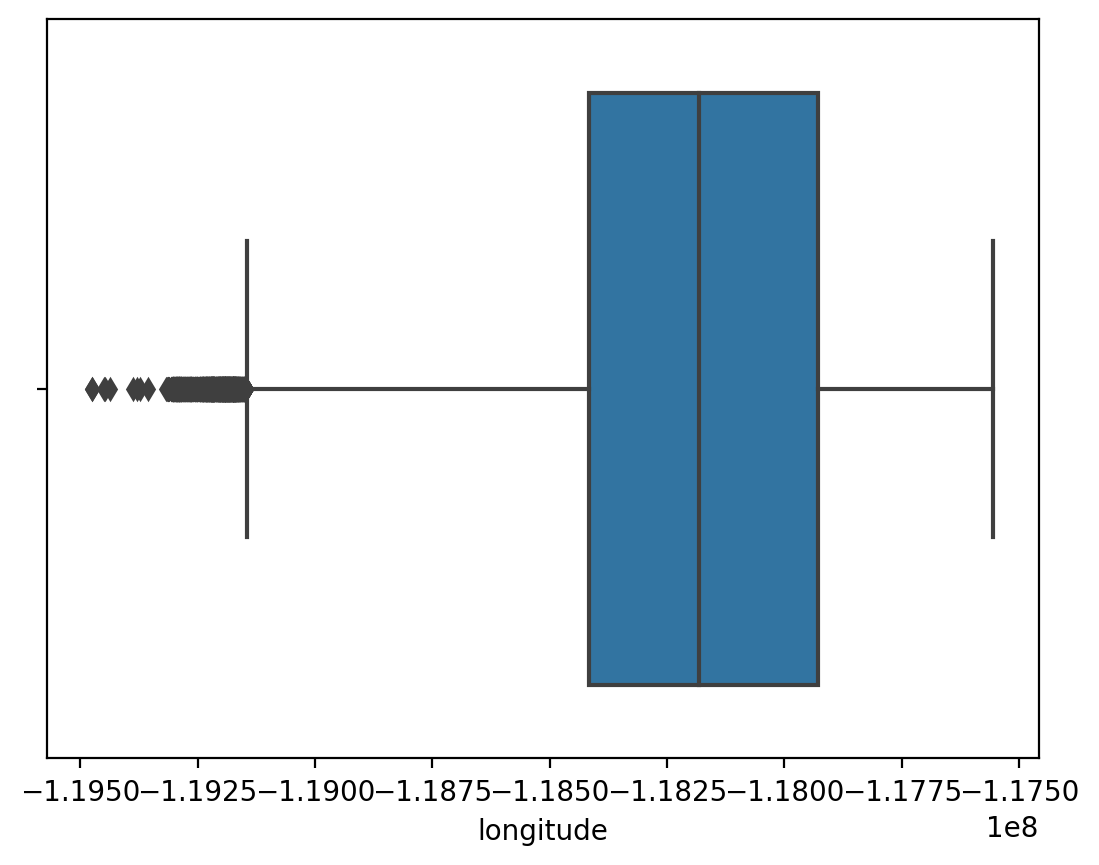

------------------------------
LOTSIZESQUAREFEET


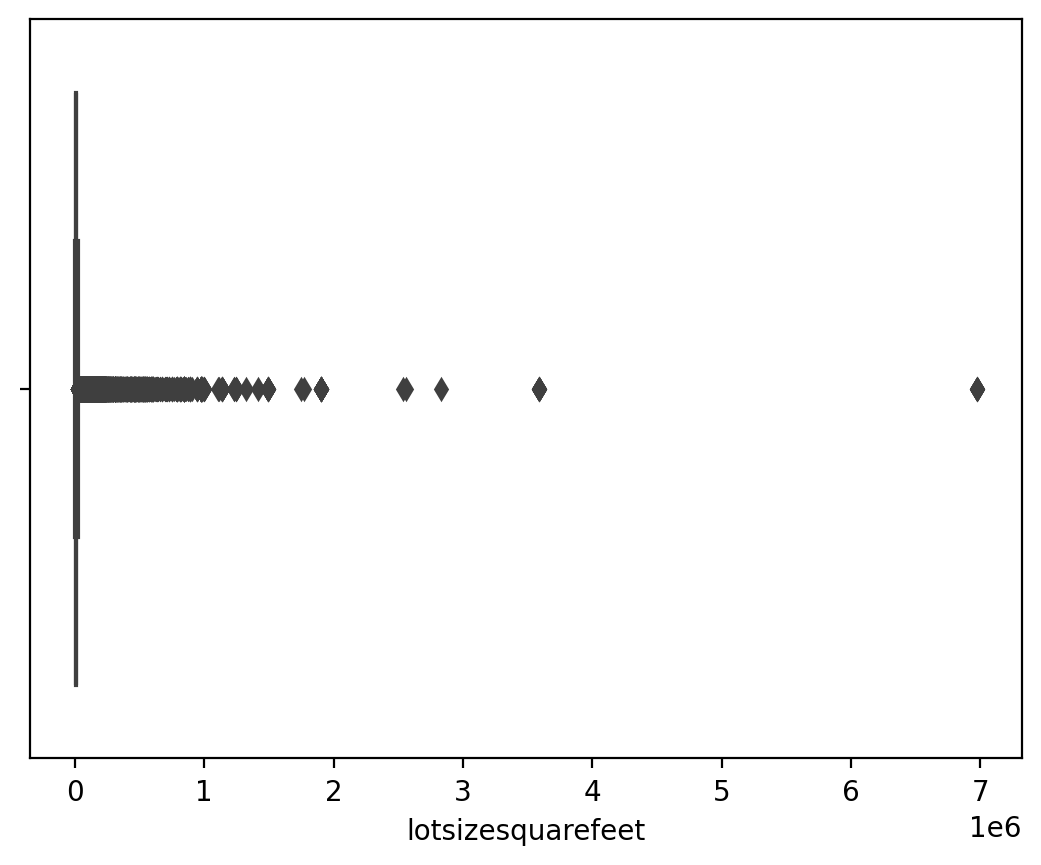

------------------------------
POOLCNT


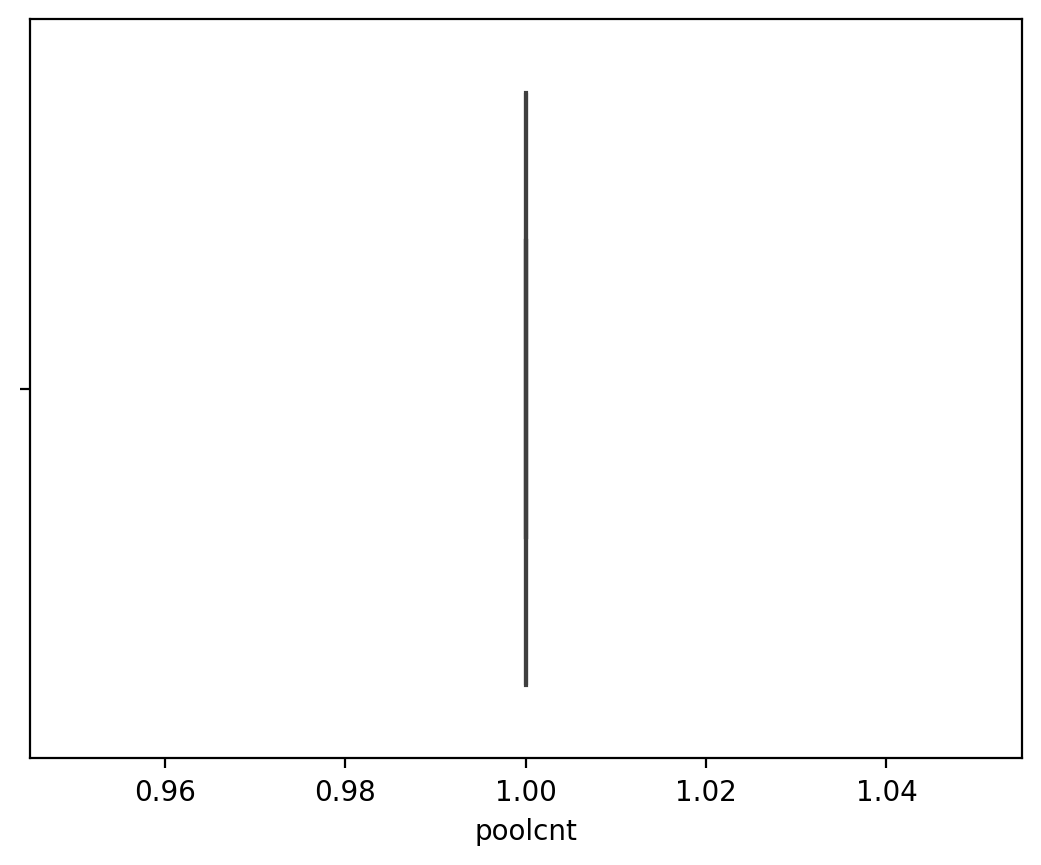

------------------------------
POOLSIZESUM


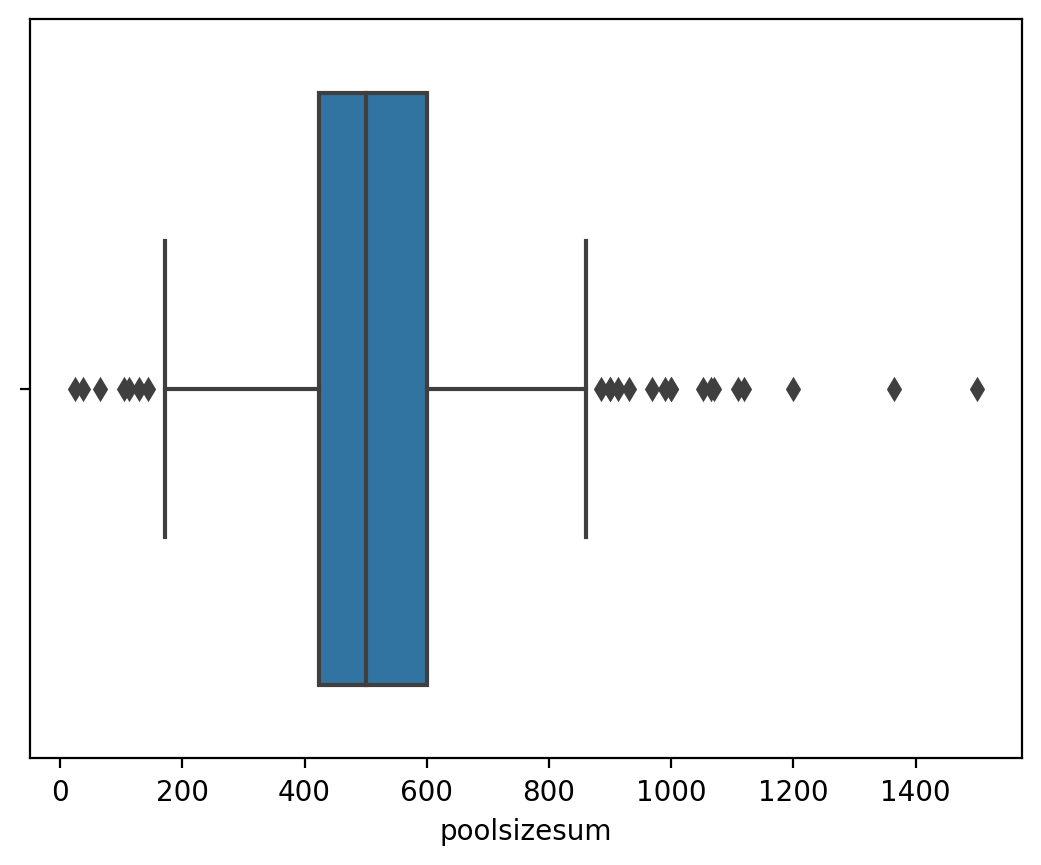

------------------------------
POOLTYPEID10


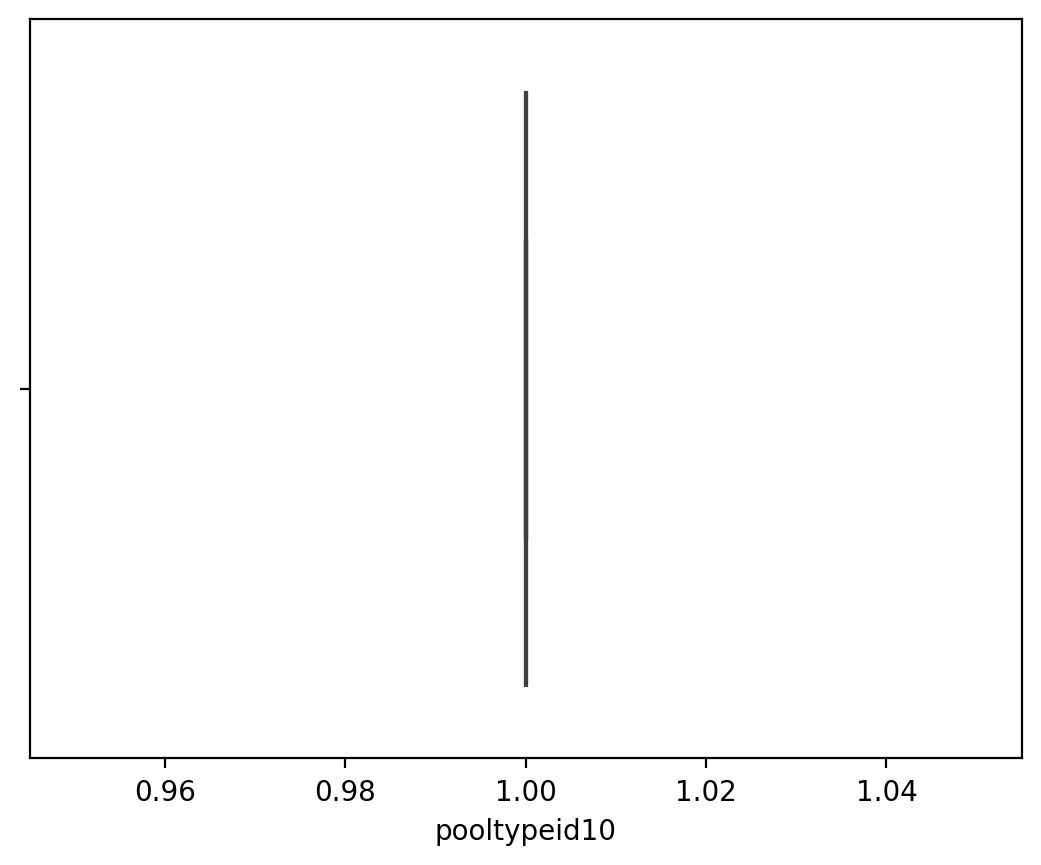

------------------------------
POOLTYPEID2


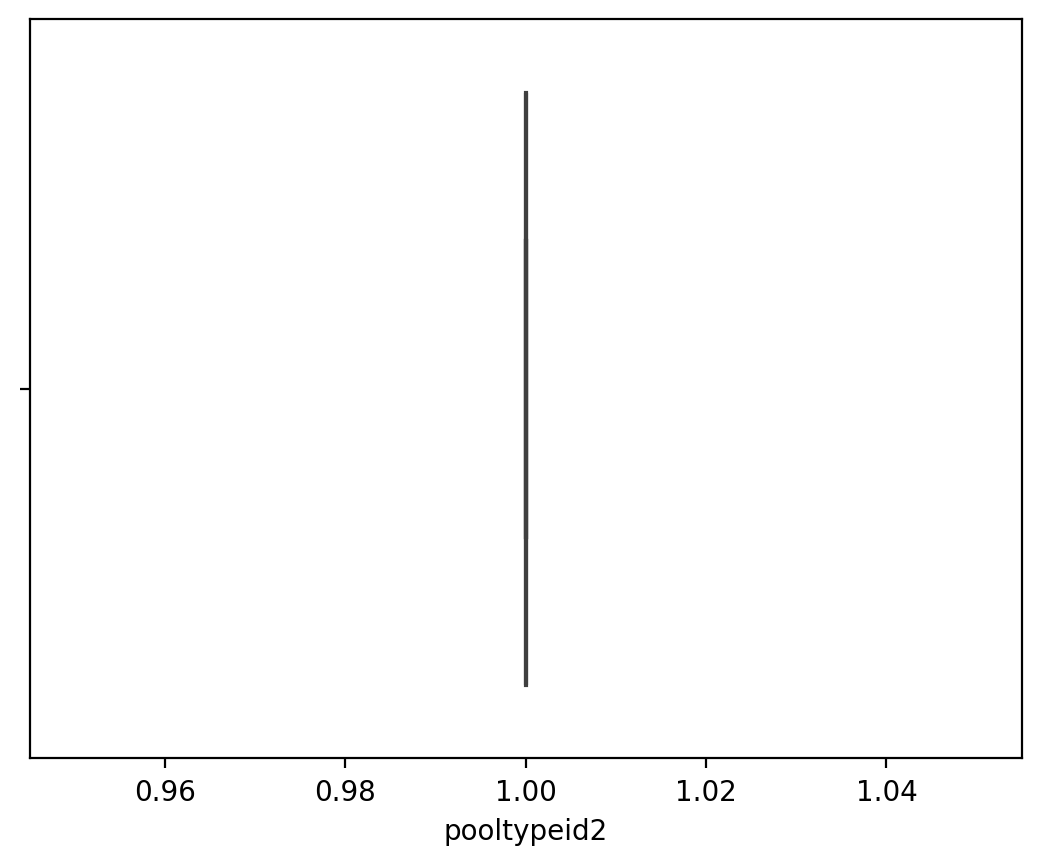

------------------------------
POOLTYPEID7


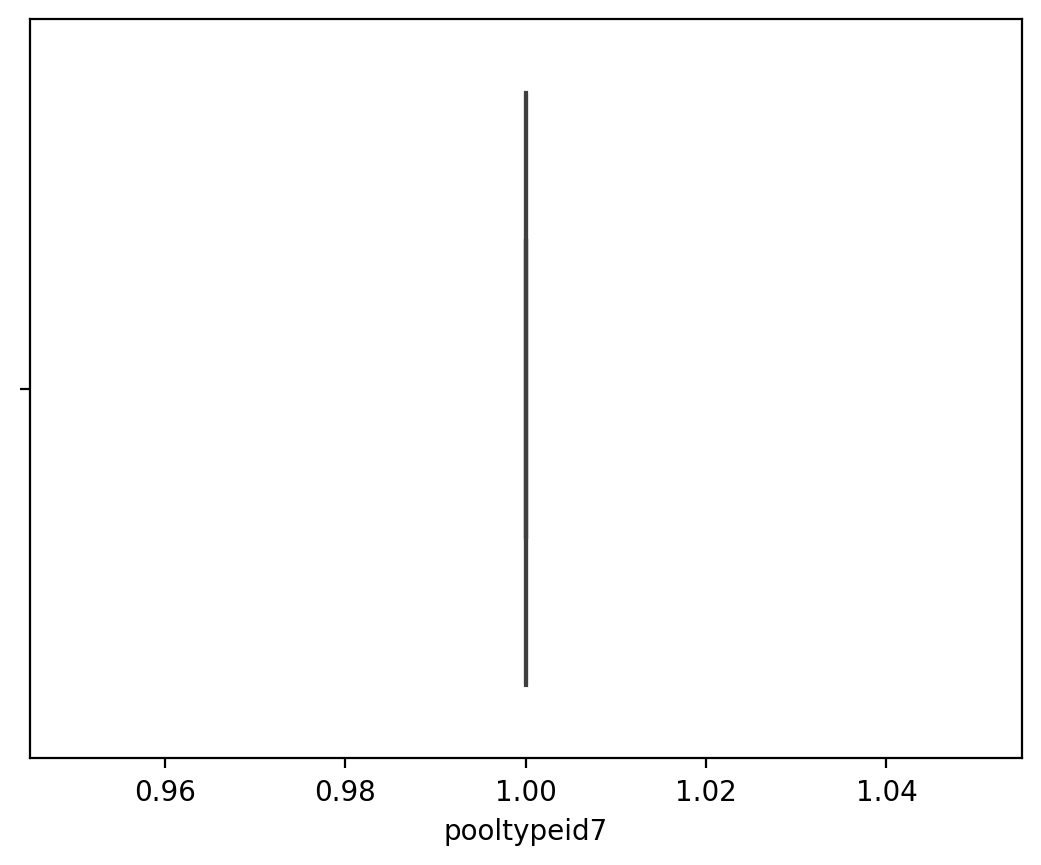

------------------------------
PROPERTYCOUNTYLANDUSECODE


0100    26714
122     13045
010C     8813
0101     6399
34       4922
1111     3353
1        2393
010E     2047
010D     1943
0200     1835
Name: propertycountylandusecode, dtype: int64

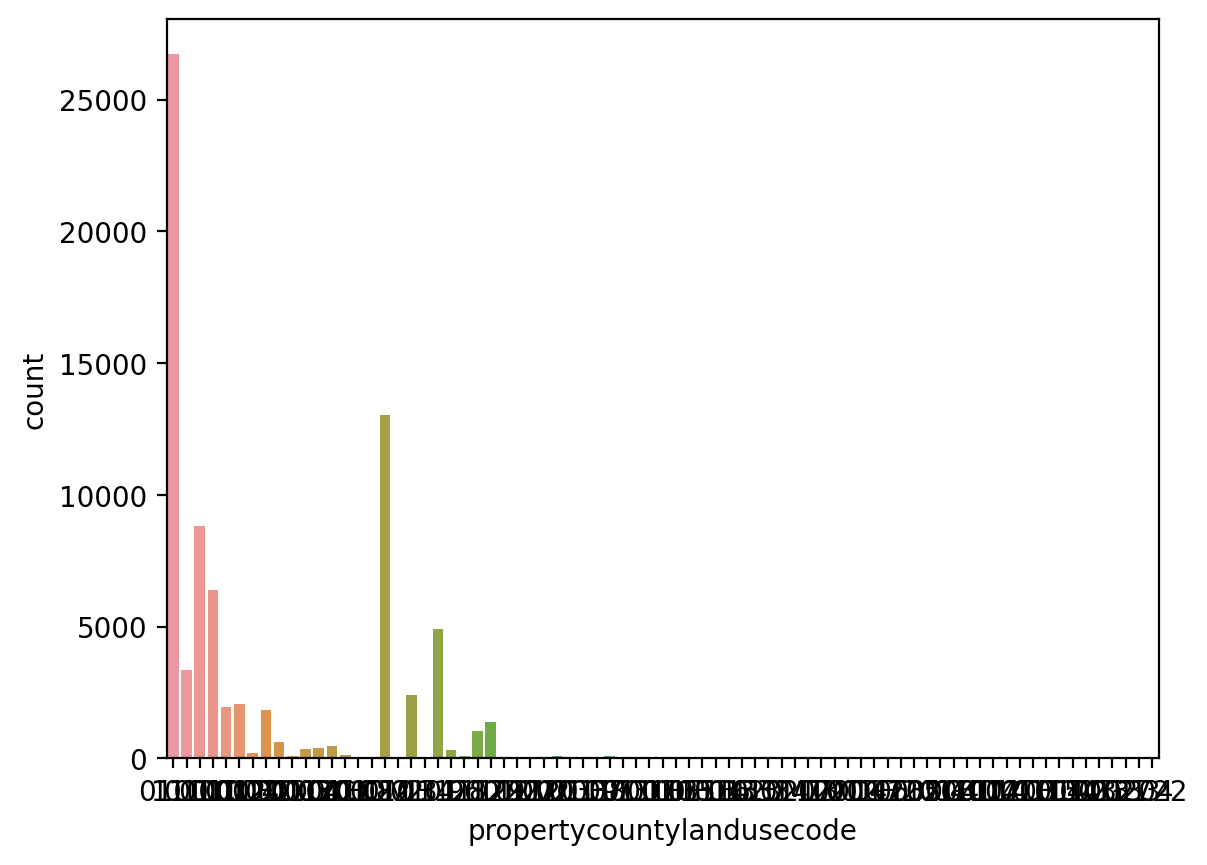

------------------------------
PROPERTYZONINGDESC


LAR1       6747
LAR3       2437
LARS       1389
LBR1N      1222
LARD1.5    1127
LAR2       1031
SCUR2       956
LARD2       849
LARA        654
LARE11      628
Name: propertyzoningdesc, dtype: int64

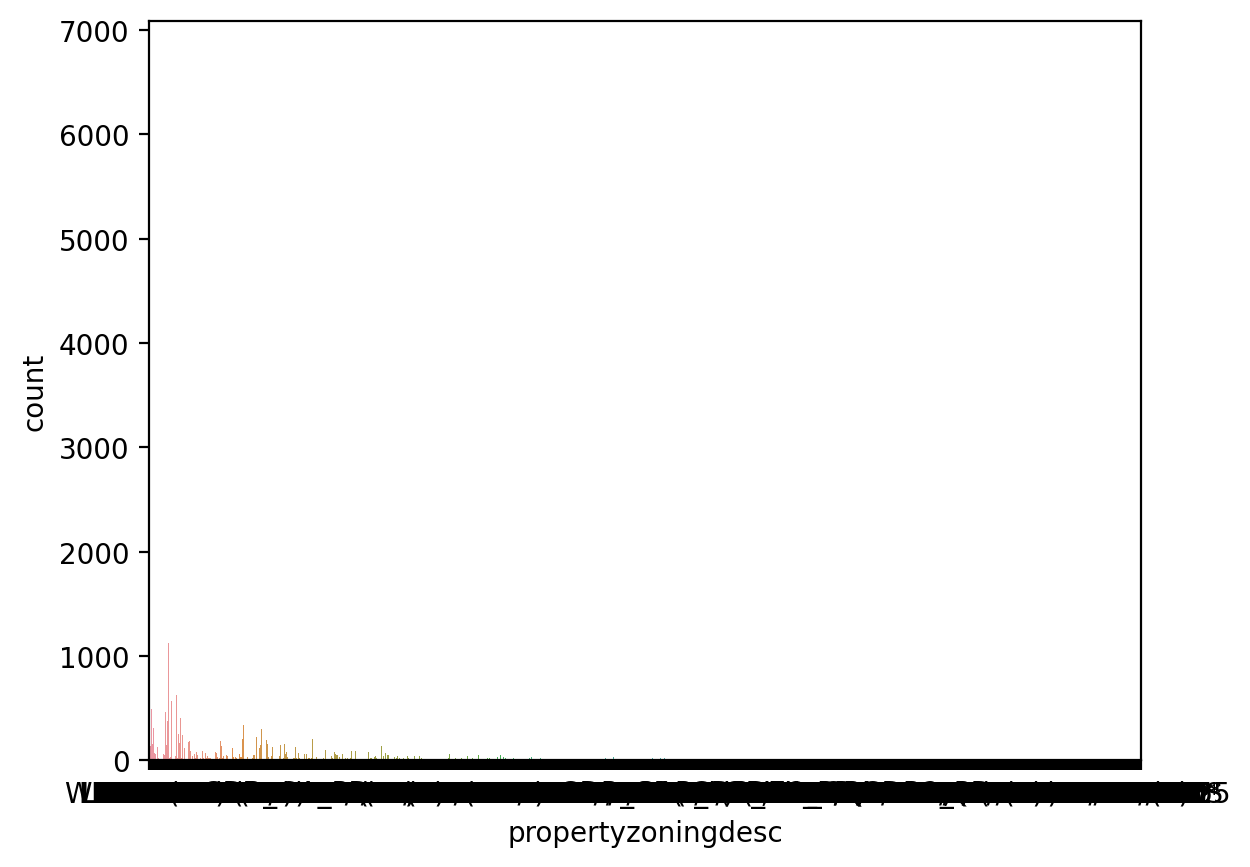

------------------------------
RAWCENSUSTRACTANDBLOCK


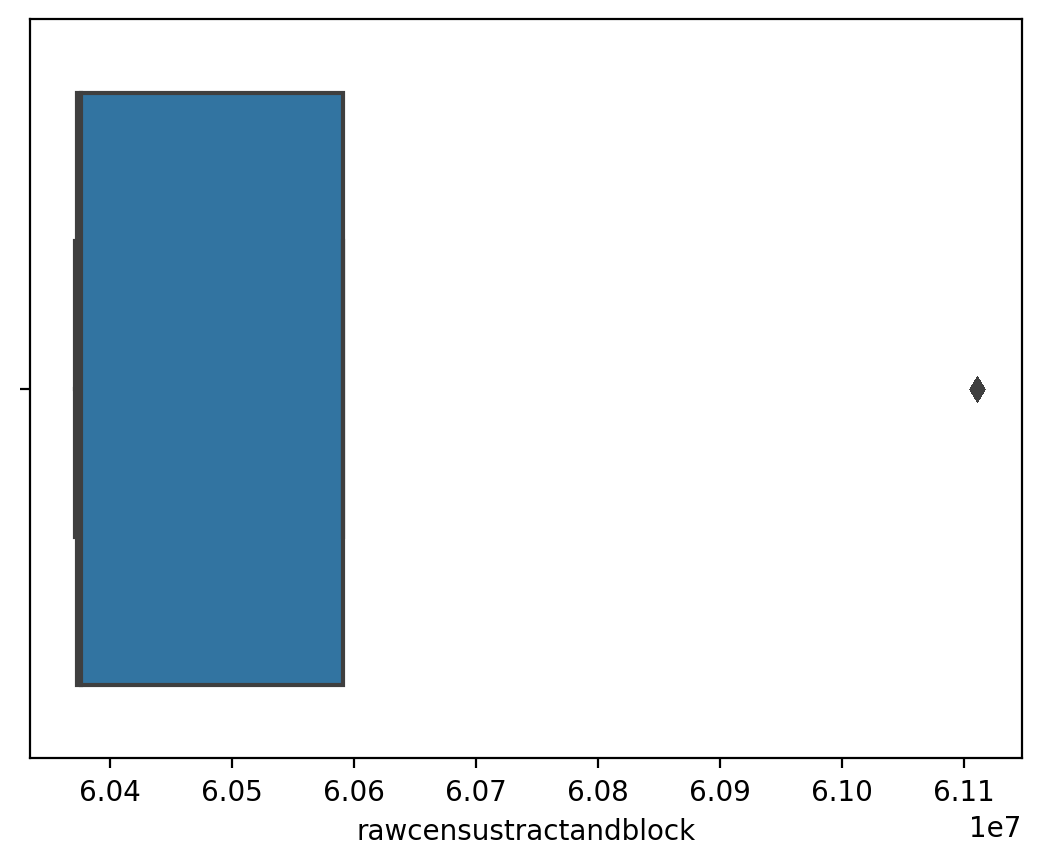

------------------------------
REGIONIDCITY


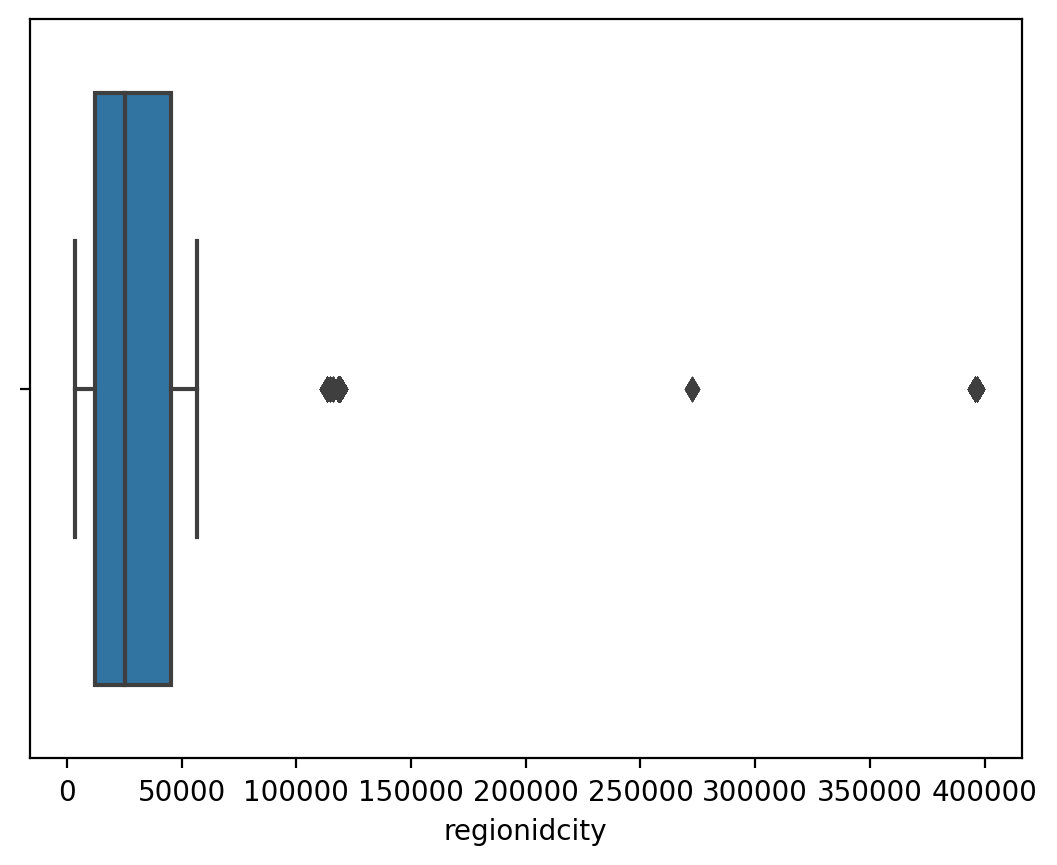

------------------------------
REGIONIDCOUNTY


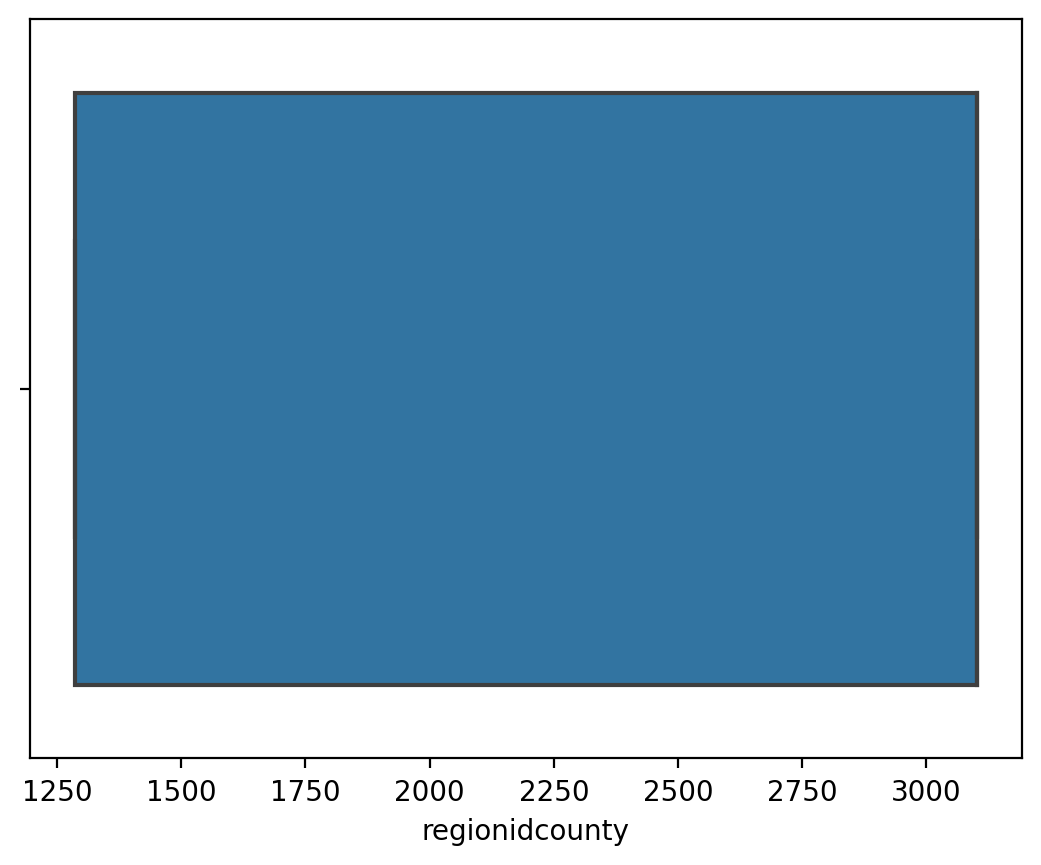

------------------------------
REGIONIDNEIGHBORHOOD


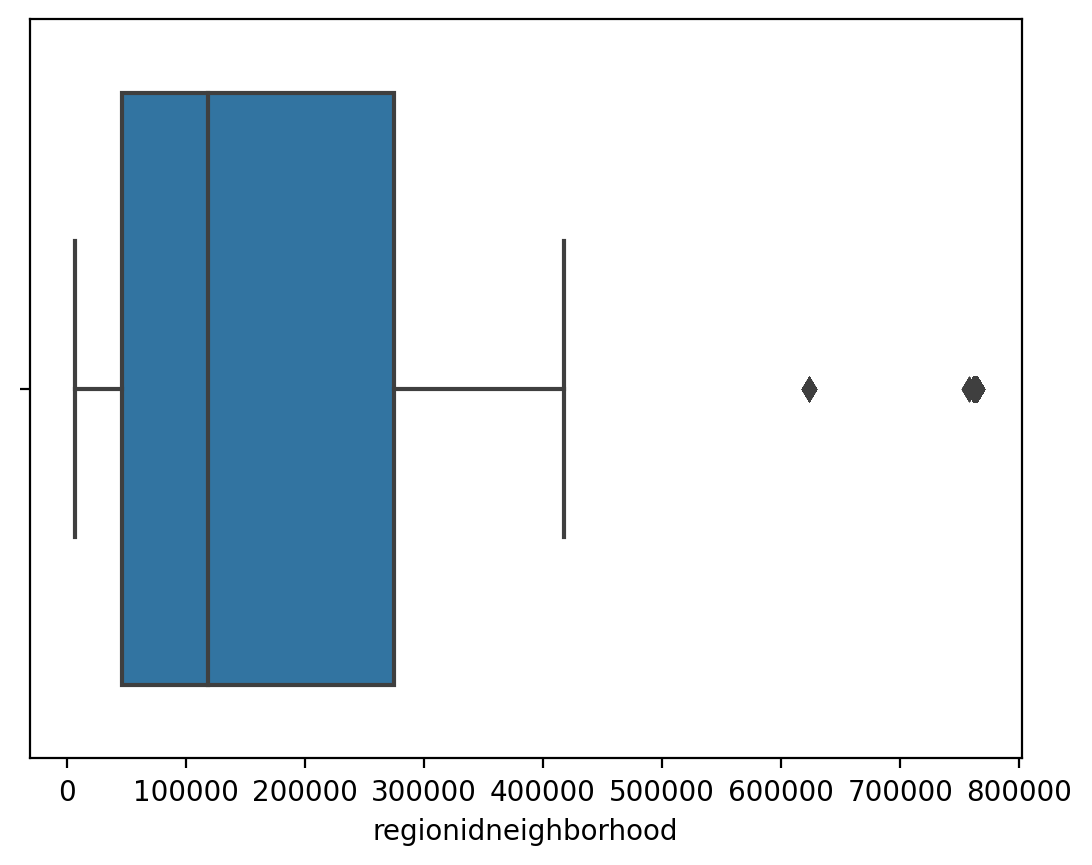

------------------------------
REGIONIDZIP


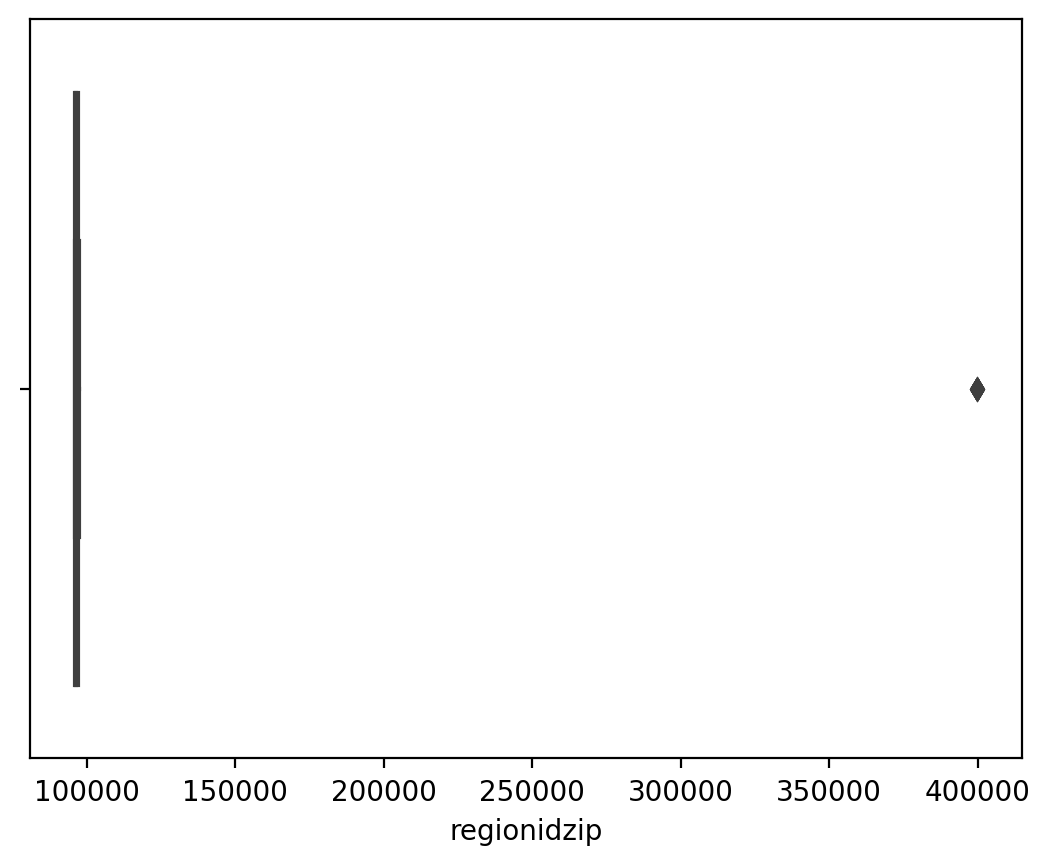

------------------------------
ROOMCNT


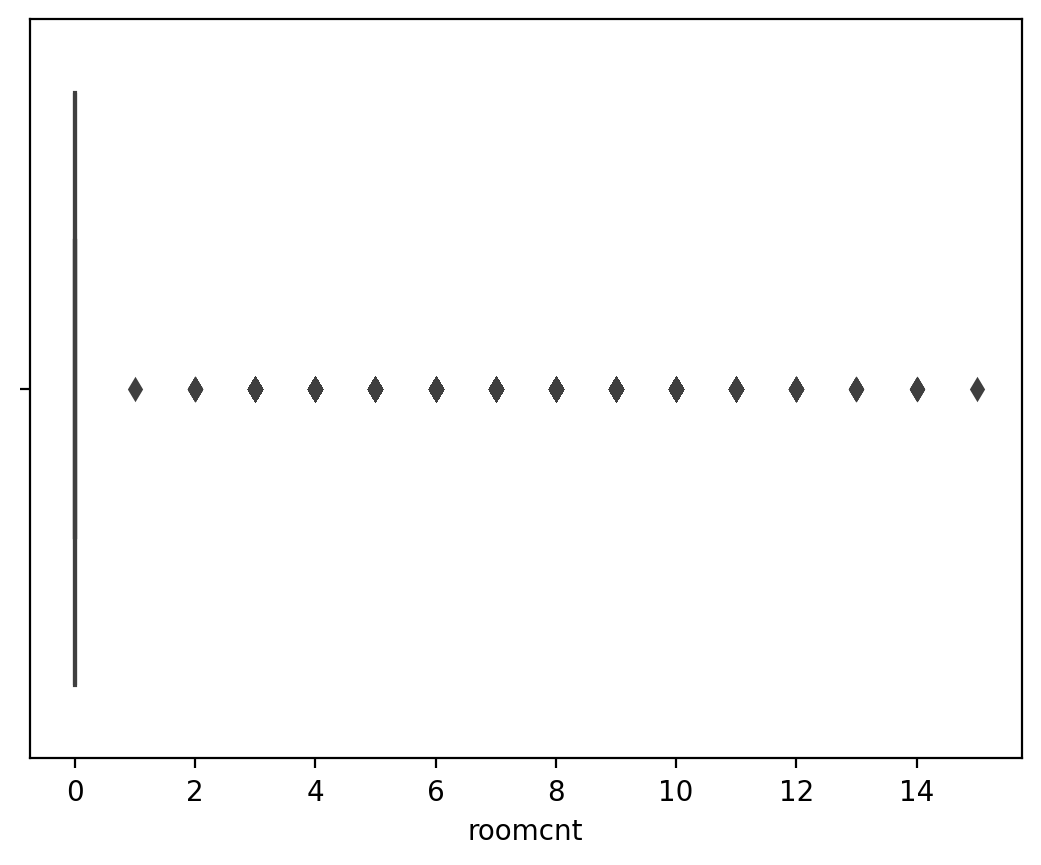

------------------------------
THREEQUARTERBATHNBR


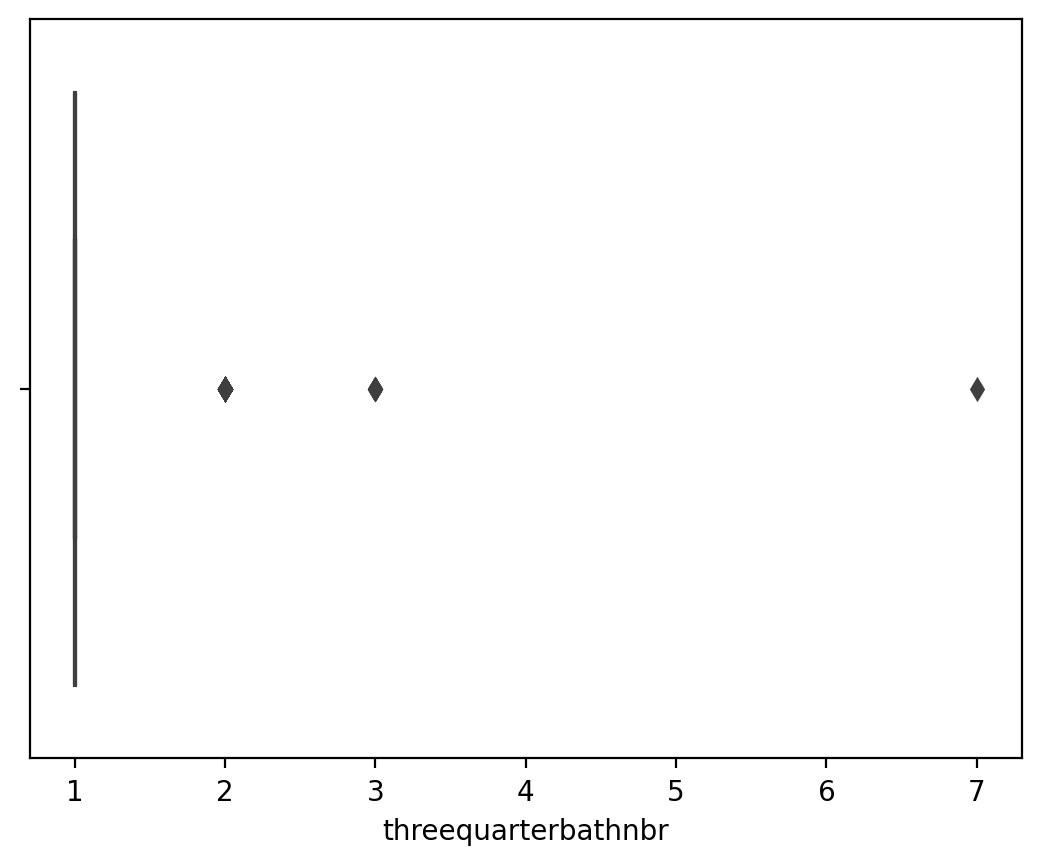

------------------------------
UNITCNT


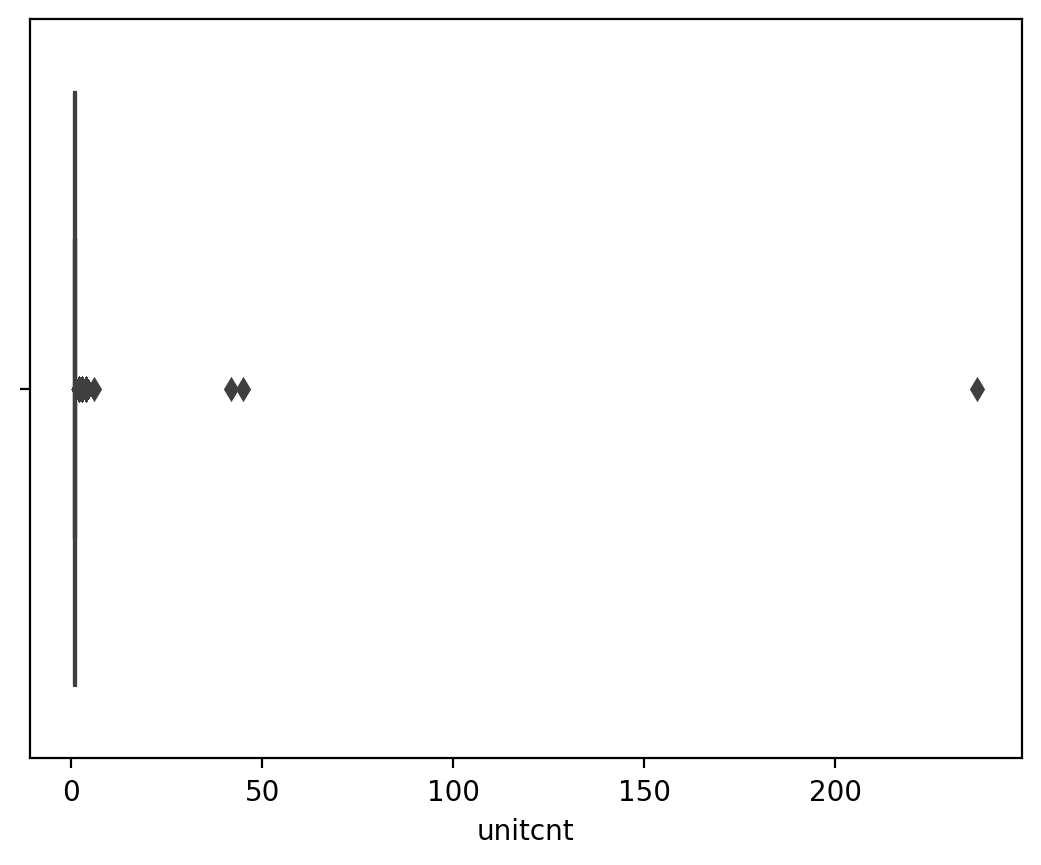

------------------------------
YARDBUILDINGSQFT17


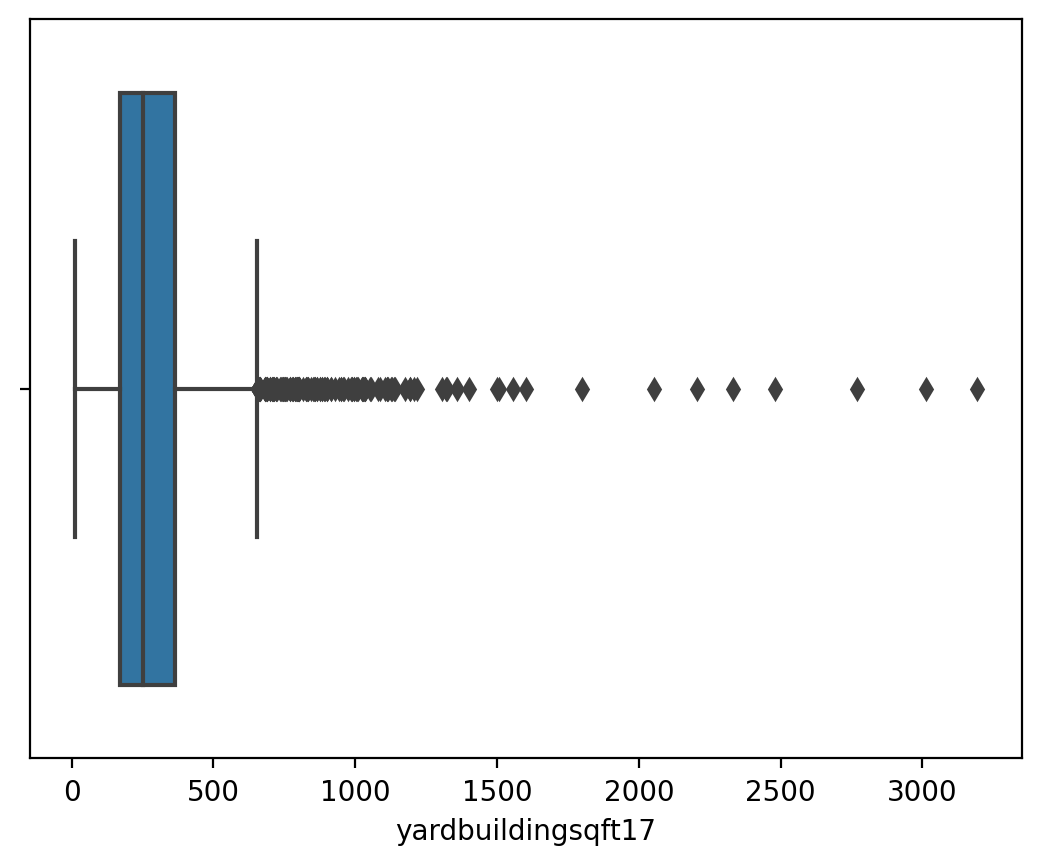

------------------------------
YARDBUILDINGSQFT26


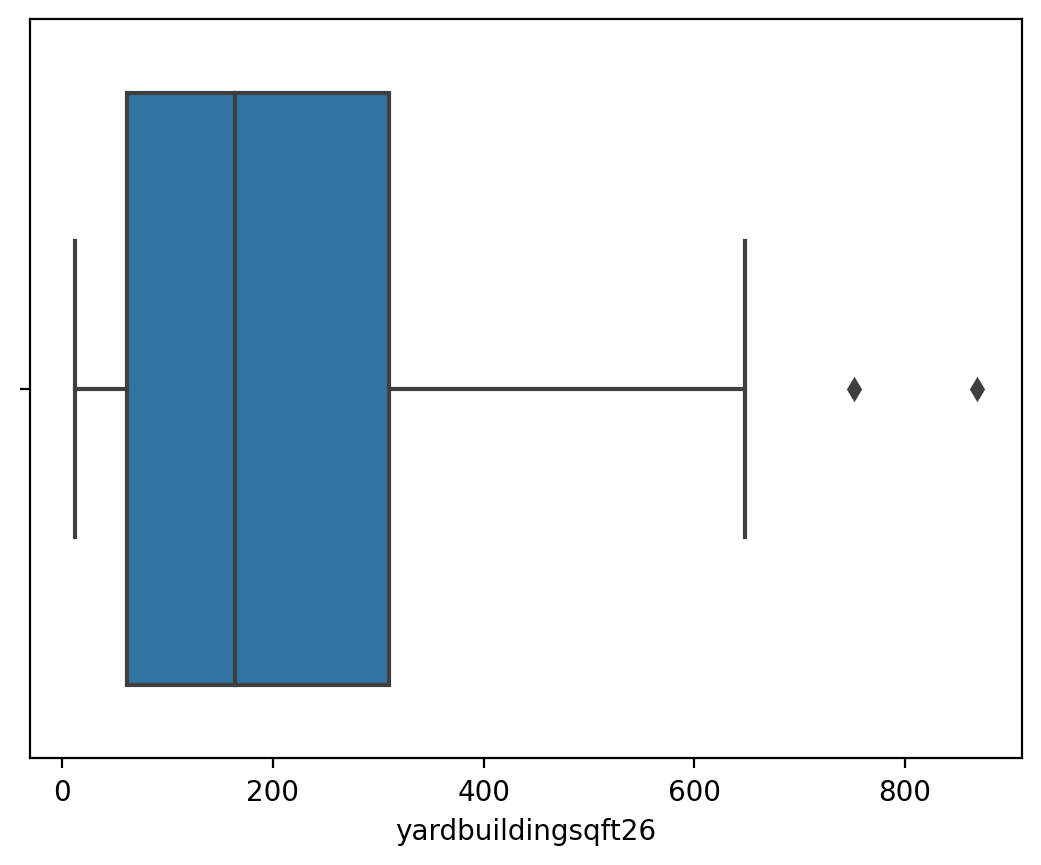

------------------------------
YEARBUILT


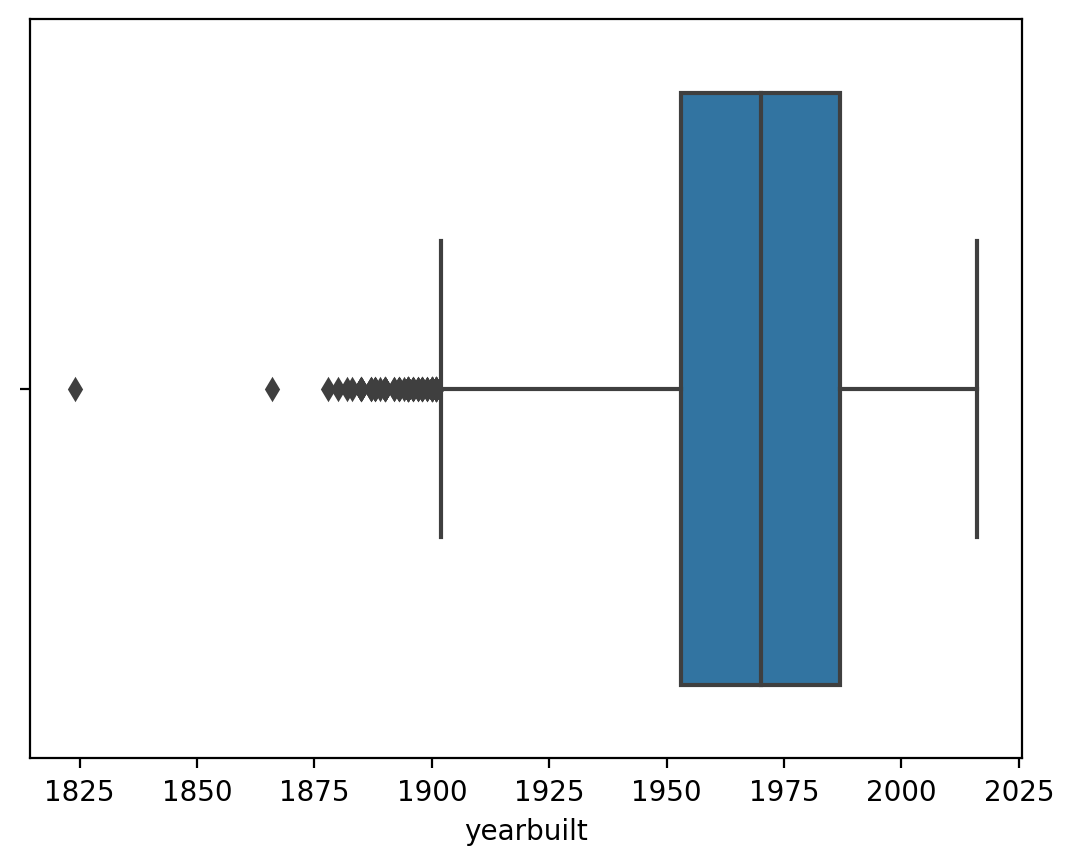

------------------------------
NUMBEROFSTORIES


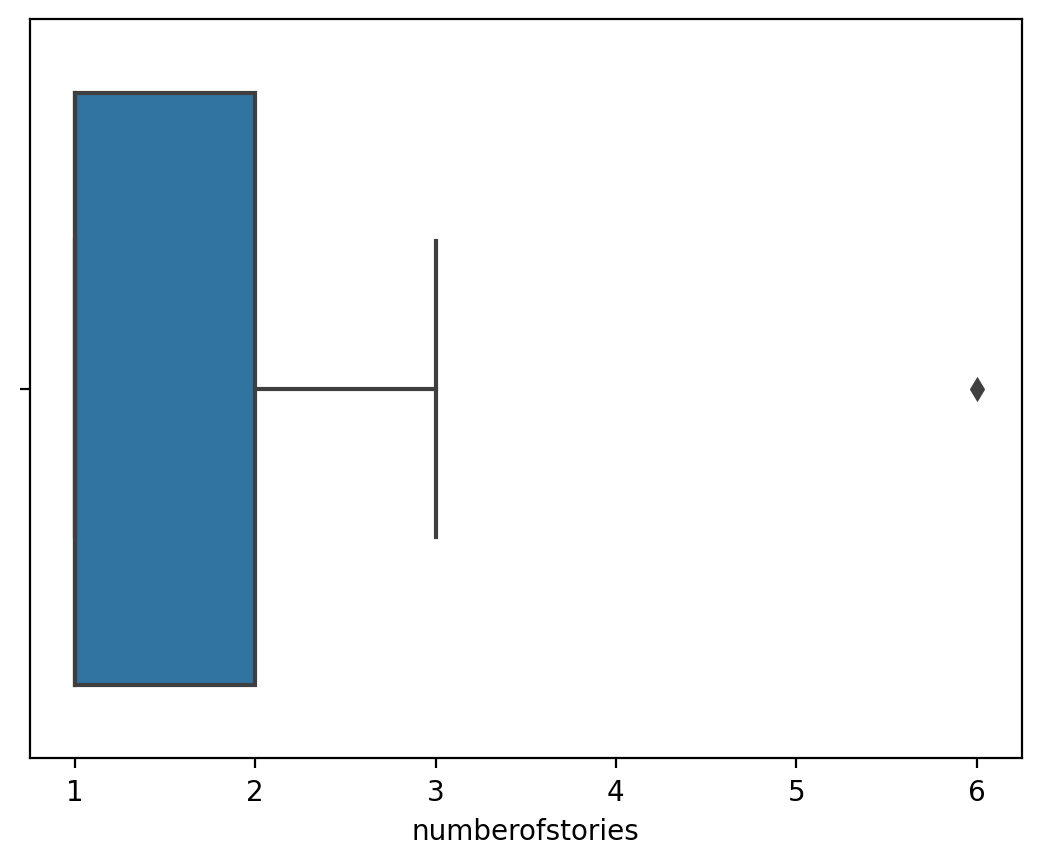

------------------------------
FIREPLACEFLAG


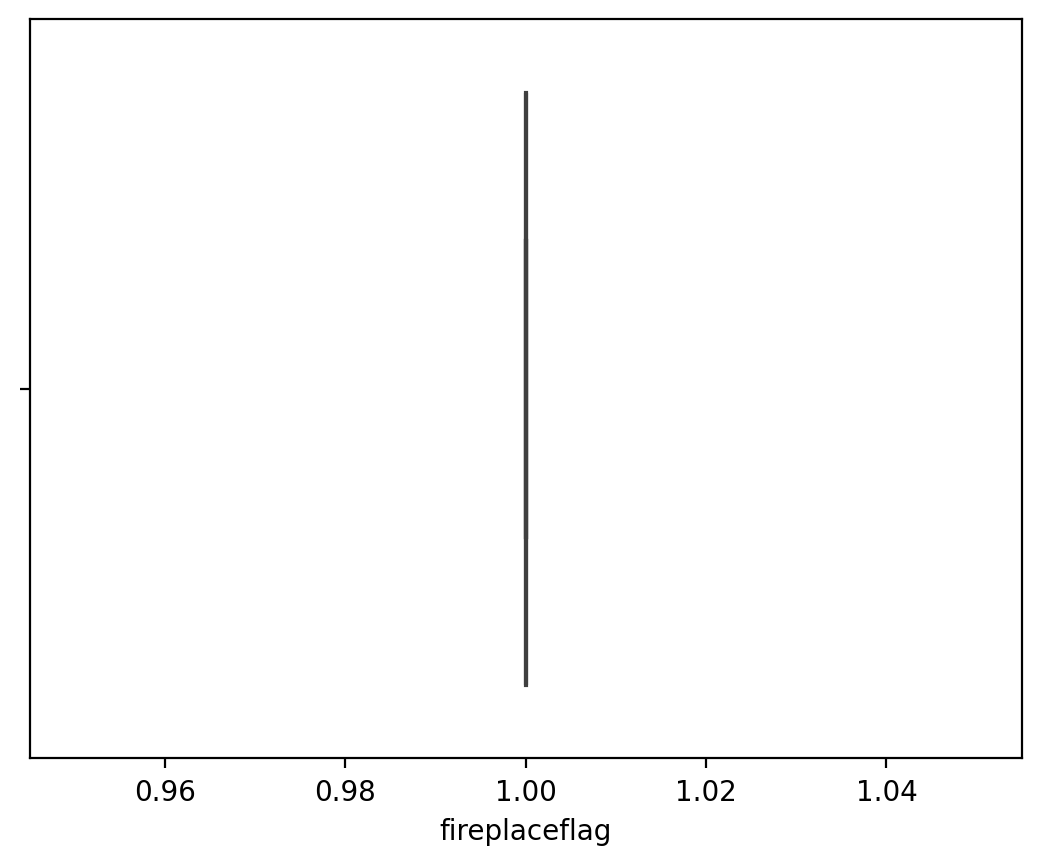

------------------------------
STRUCTURETAXVALUEDOLLARCNT


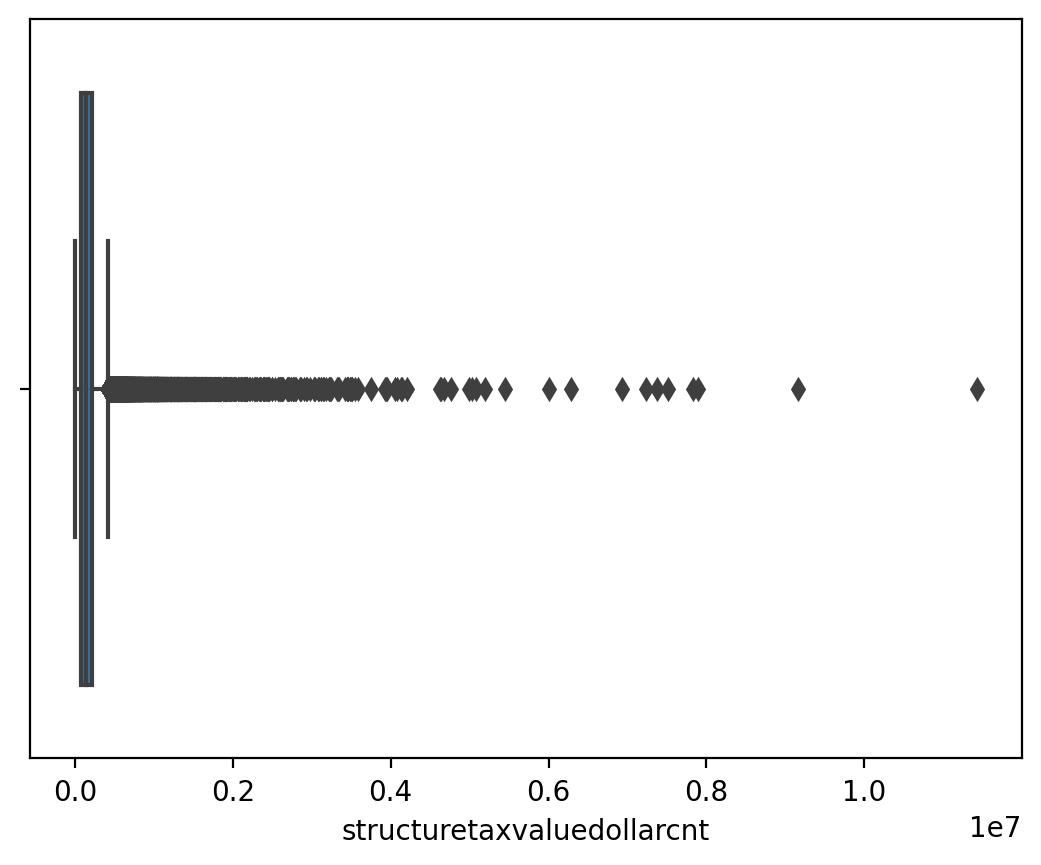

------------------------------
TAXVALUEDOLLARCNT


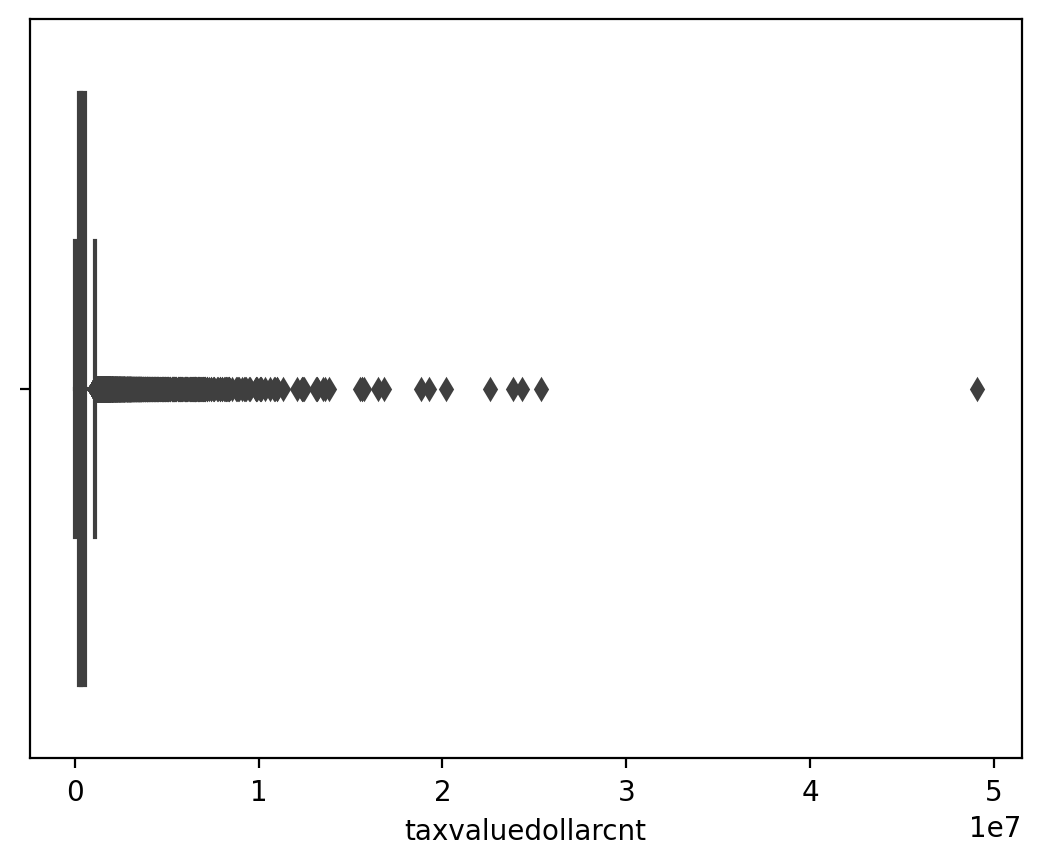

------------------------------
ASSESSMENTYEAR


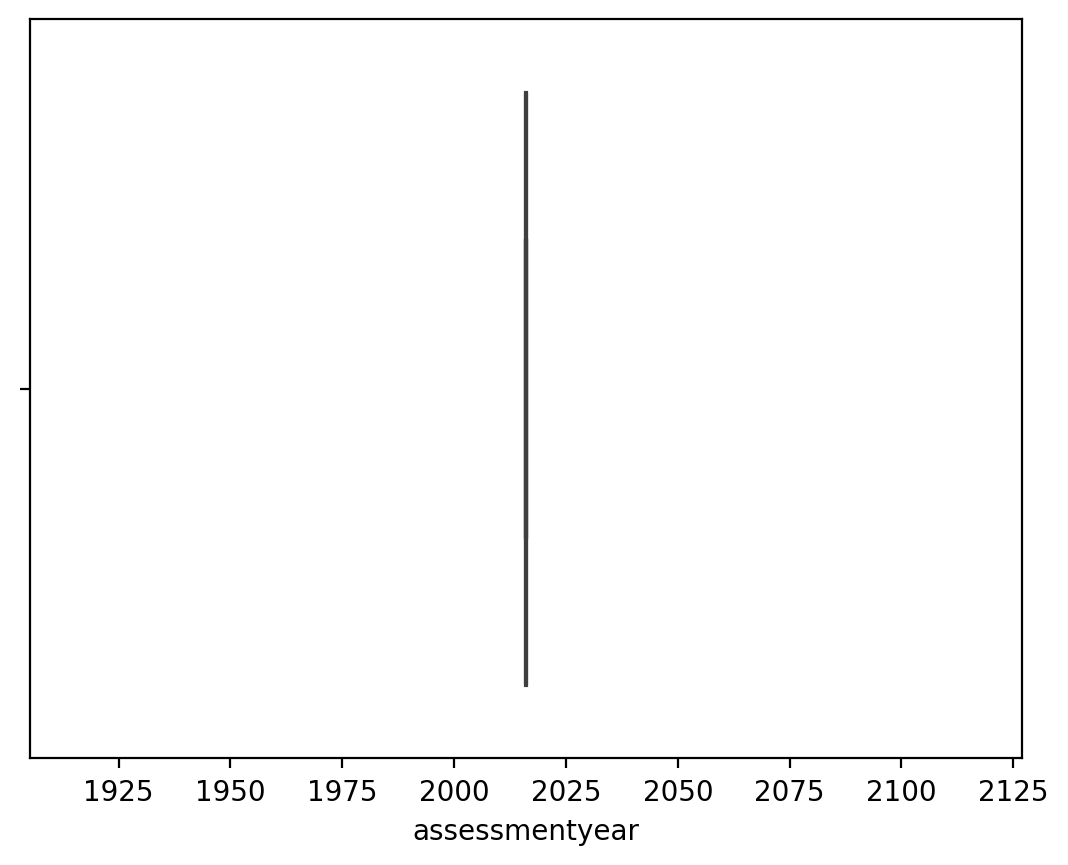

------------------------------
LANDTAXVALUEDOLLARCNT


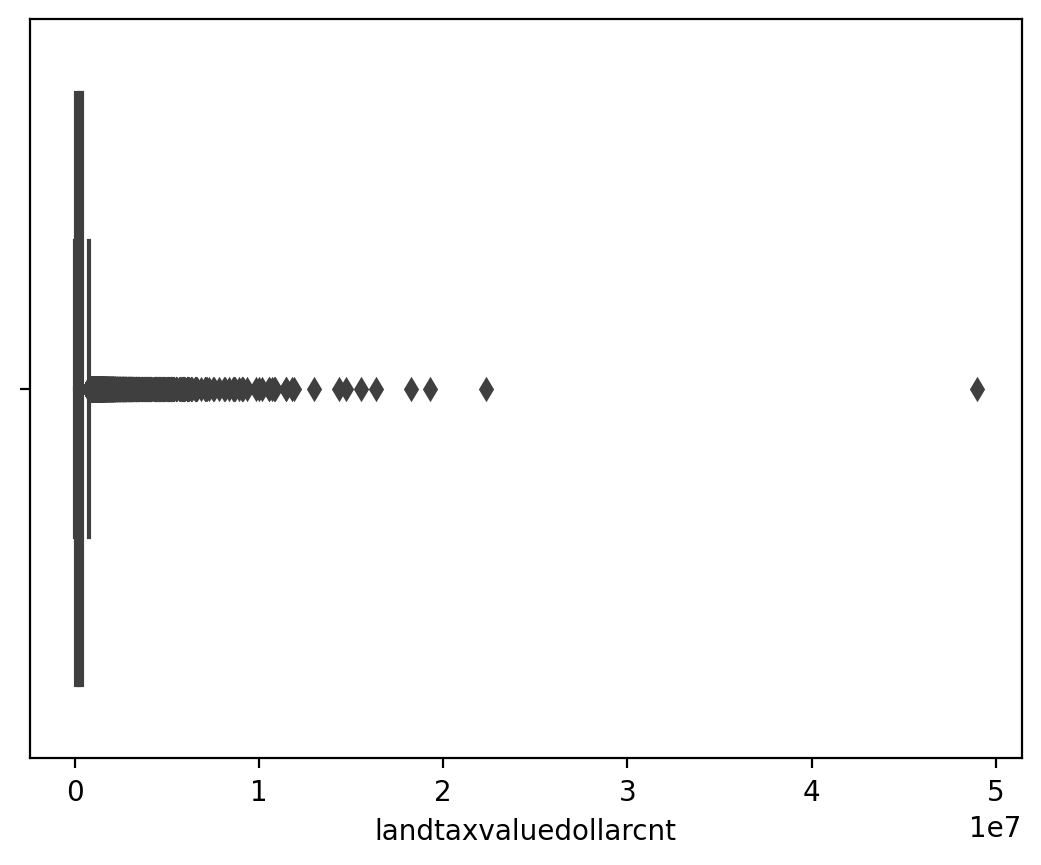

------------------------------
TAXAMOUNT


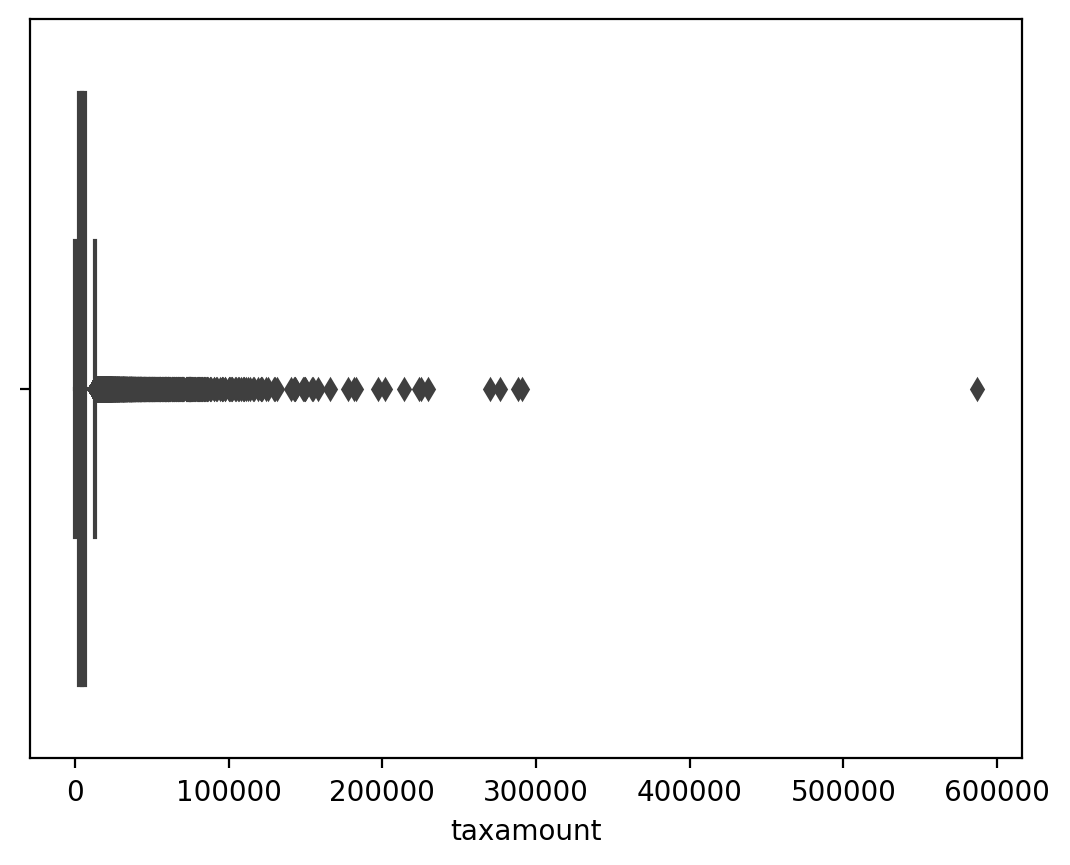

------------------------------
TAXDELINQUENCYFLAG


Y    2886
Name: taxdelinquencyflag, dtype: int64

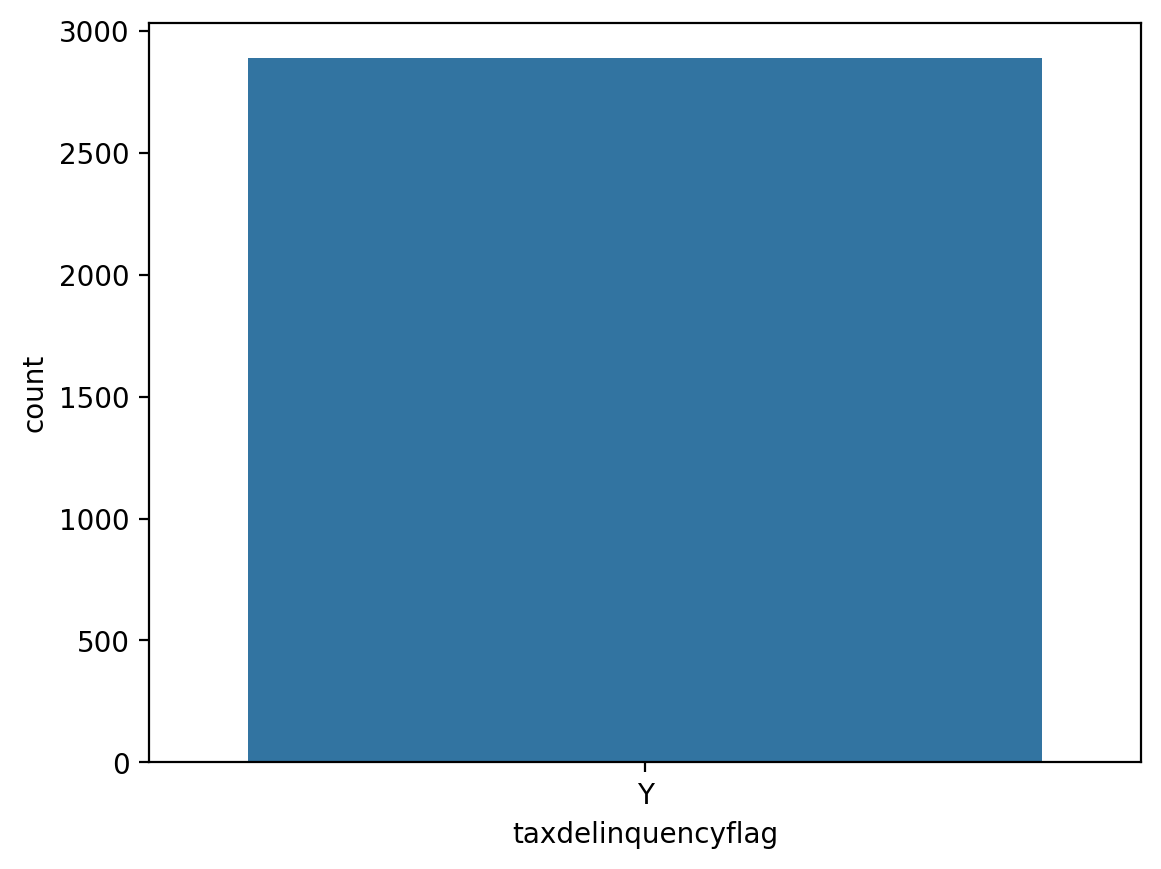

------------------------------
TAXDELINQUENCYYEAR


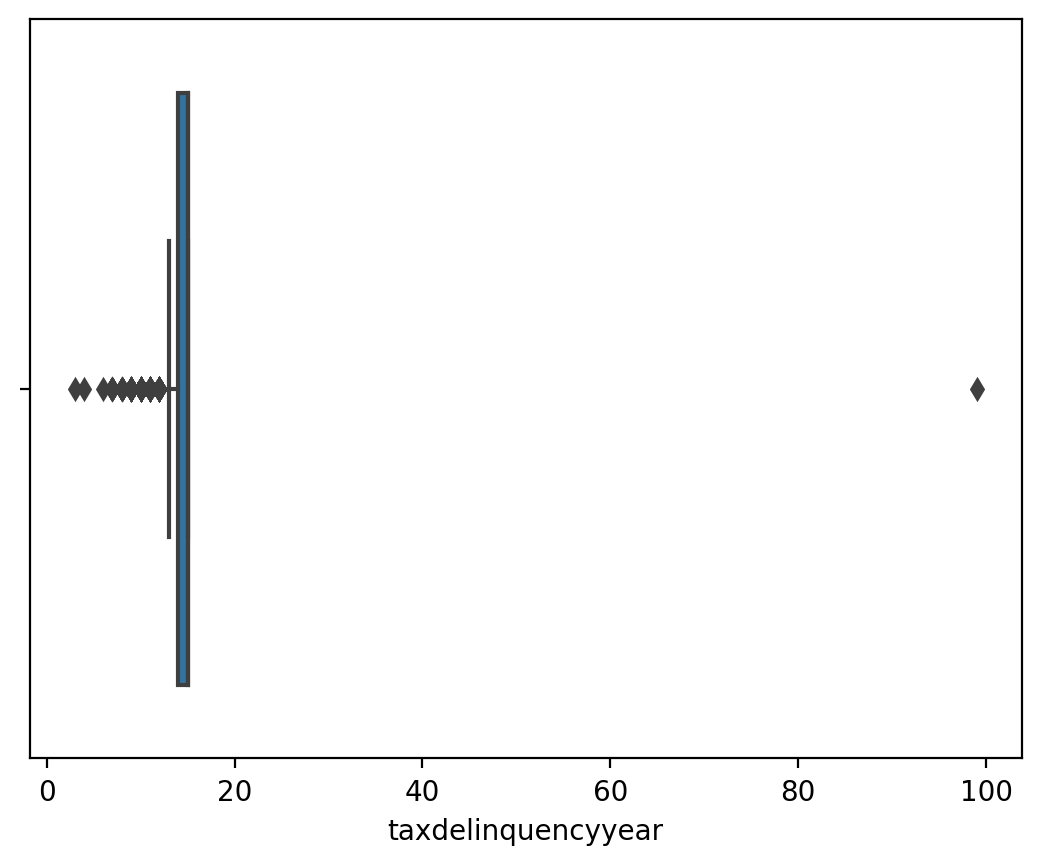

------------------------------
CENSUSTRACTANDBLOCK


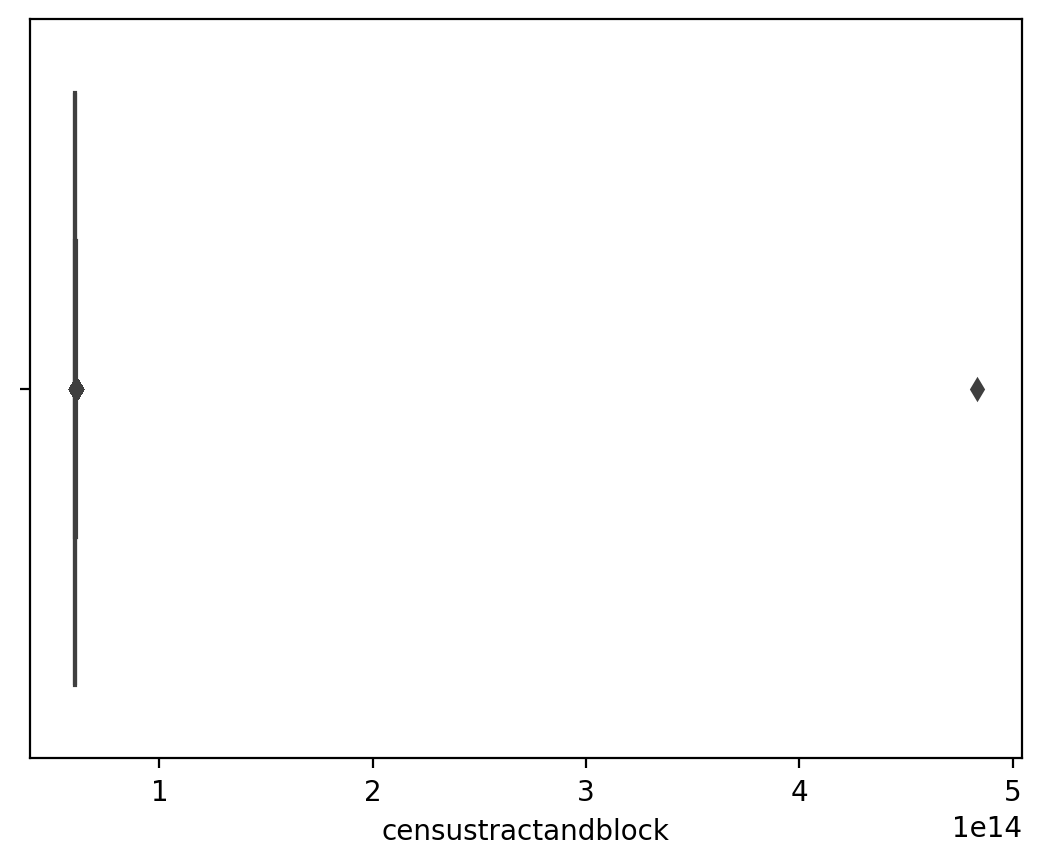

------------------------------
LOGERROR


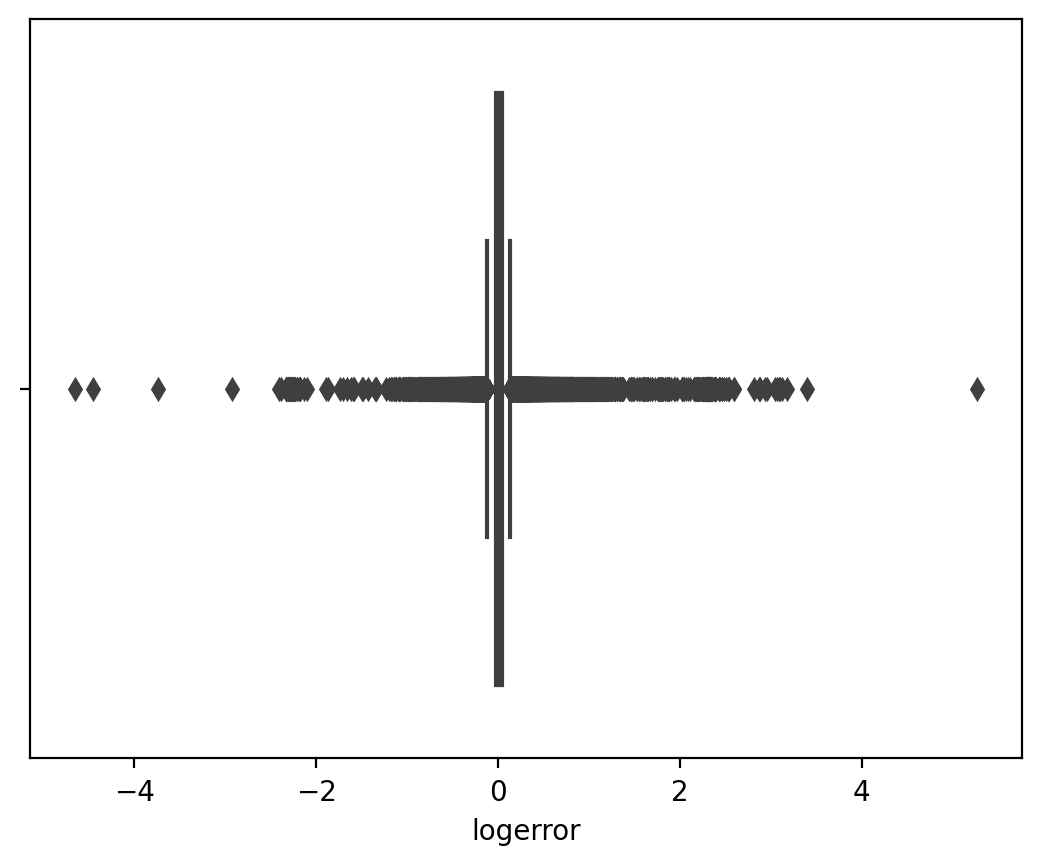

------------------------------
TRANSACTIONDATE


2017-06-30    1189
2017-04-28     911
2017-05-31     867
2017-07-28     814
2017-08-31     781
2017-03-31     770
2017-05-26     743
2017-06-16     727
2017-06-23     706
2017-08-25     696
Name: transactiondate, dtype: int64

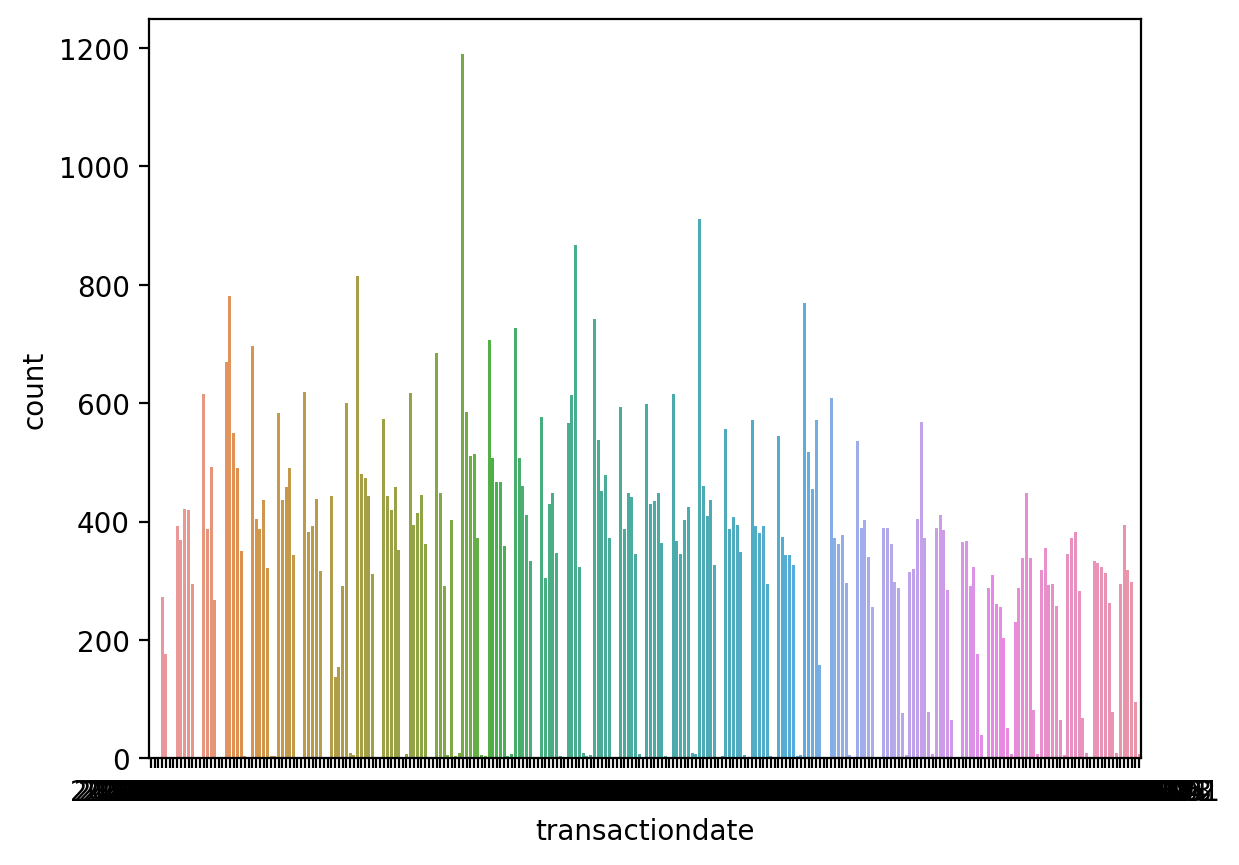

------------------------------
AIRCONDITIONINGDESC


Central          23133
Yes               1574
None               167
Wall Unit           53
Refrigeration       26
Name: airconditioningdesc, dtype: int64

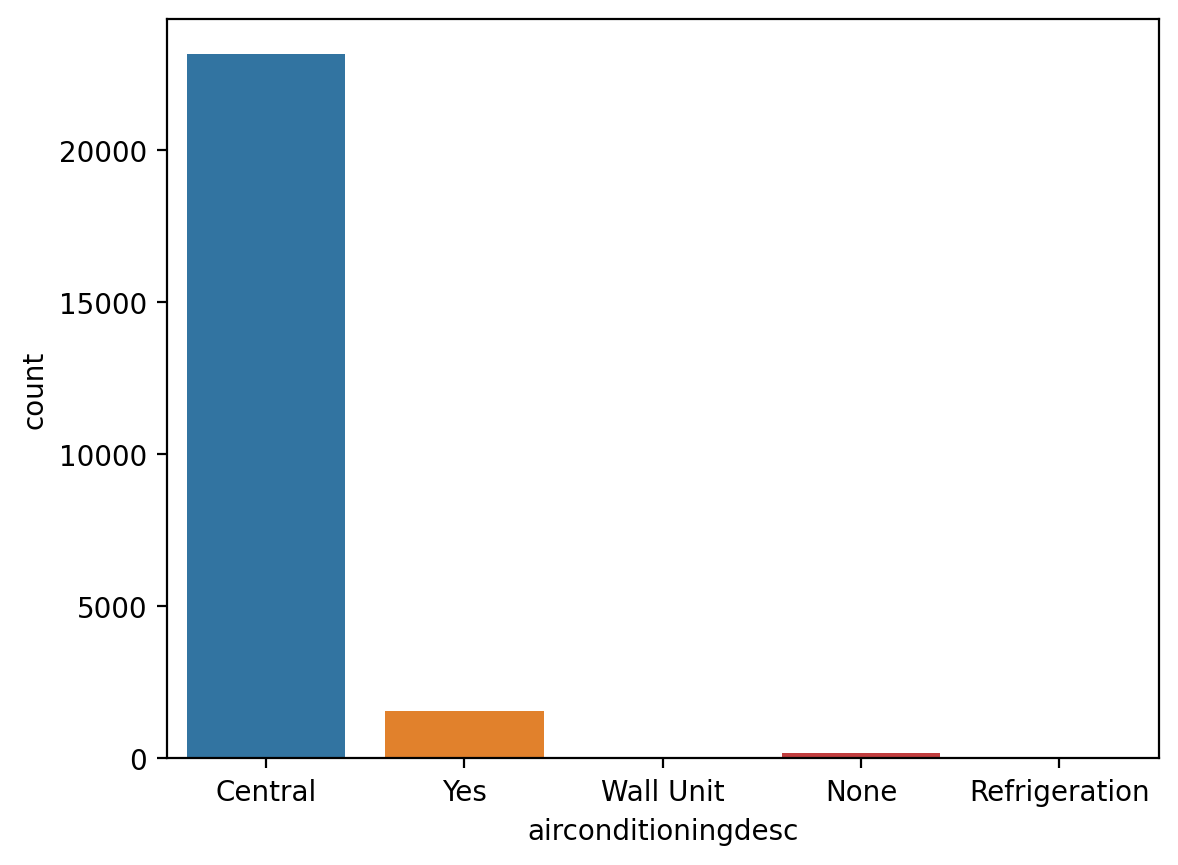

------------------------------
ARCHITECTURALSTYLEDESC


Contemporary     172
Conventional      19
Ranch/Rambler      7
Bungalow           5
Cape Cod           3
Name: architecturalstyledesc, dtype: int64

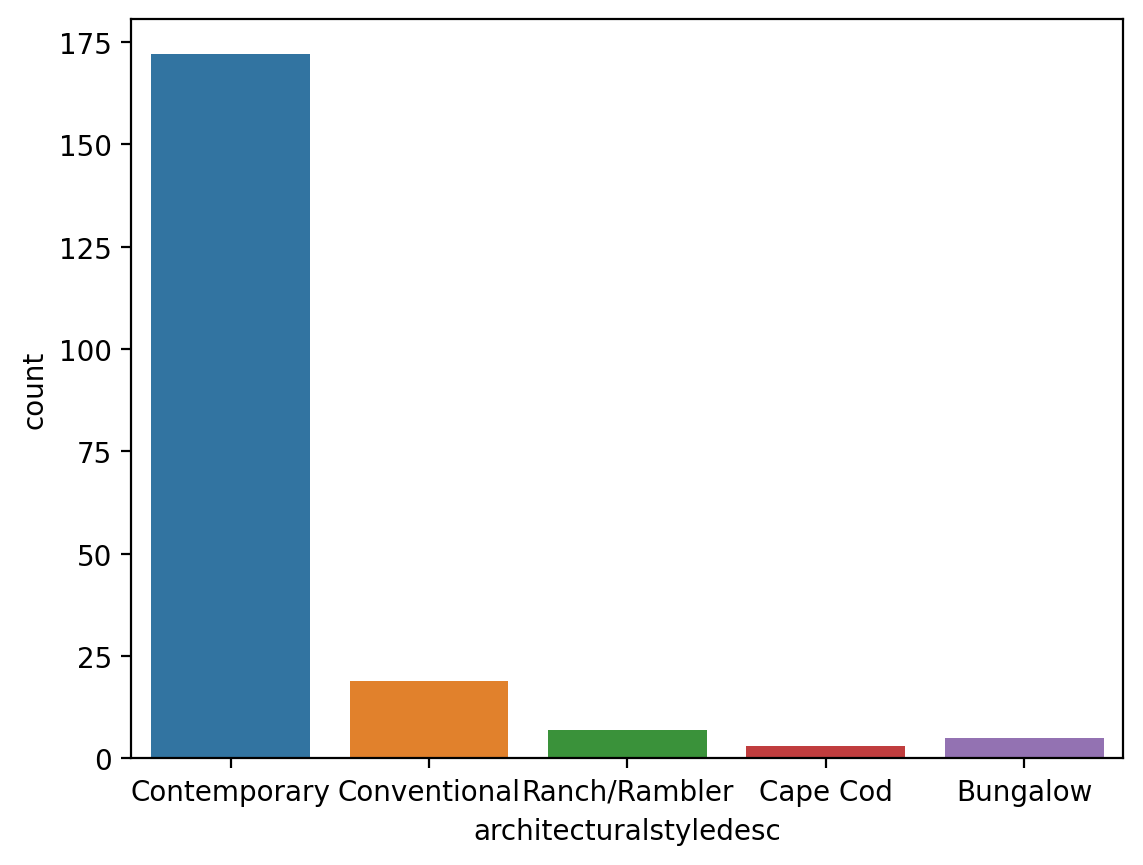

------------------------------
BUILDINGCLASSDESC


Buildings having wood or wood and steel frames                                                                                                                                                                                             14
Buildings having exterior walls built of a non-combustible material such as brick, concrete, block or poured concrete. Interior partitions and roof structures are built of combustible materials. Floor may be concrete or wood frame.     1
Name: buildingclassdesc, dtype: int64

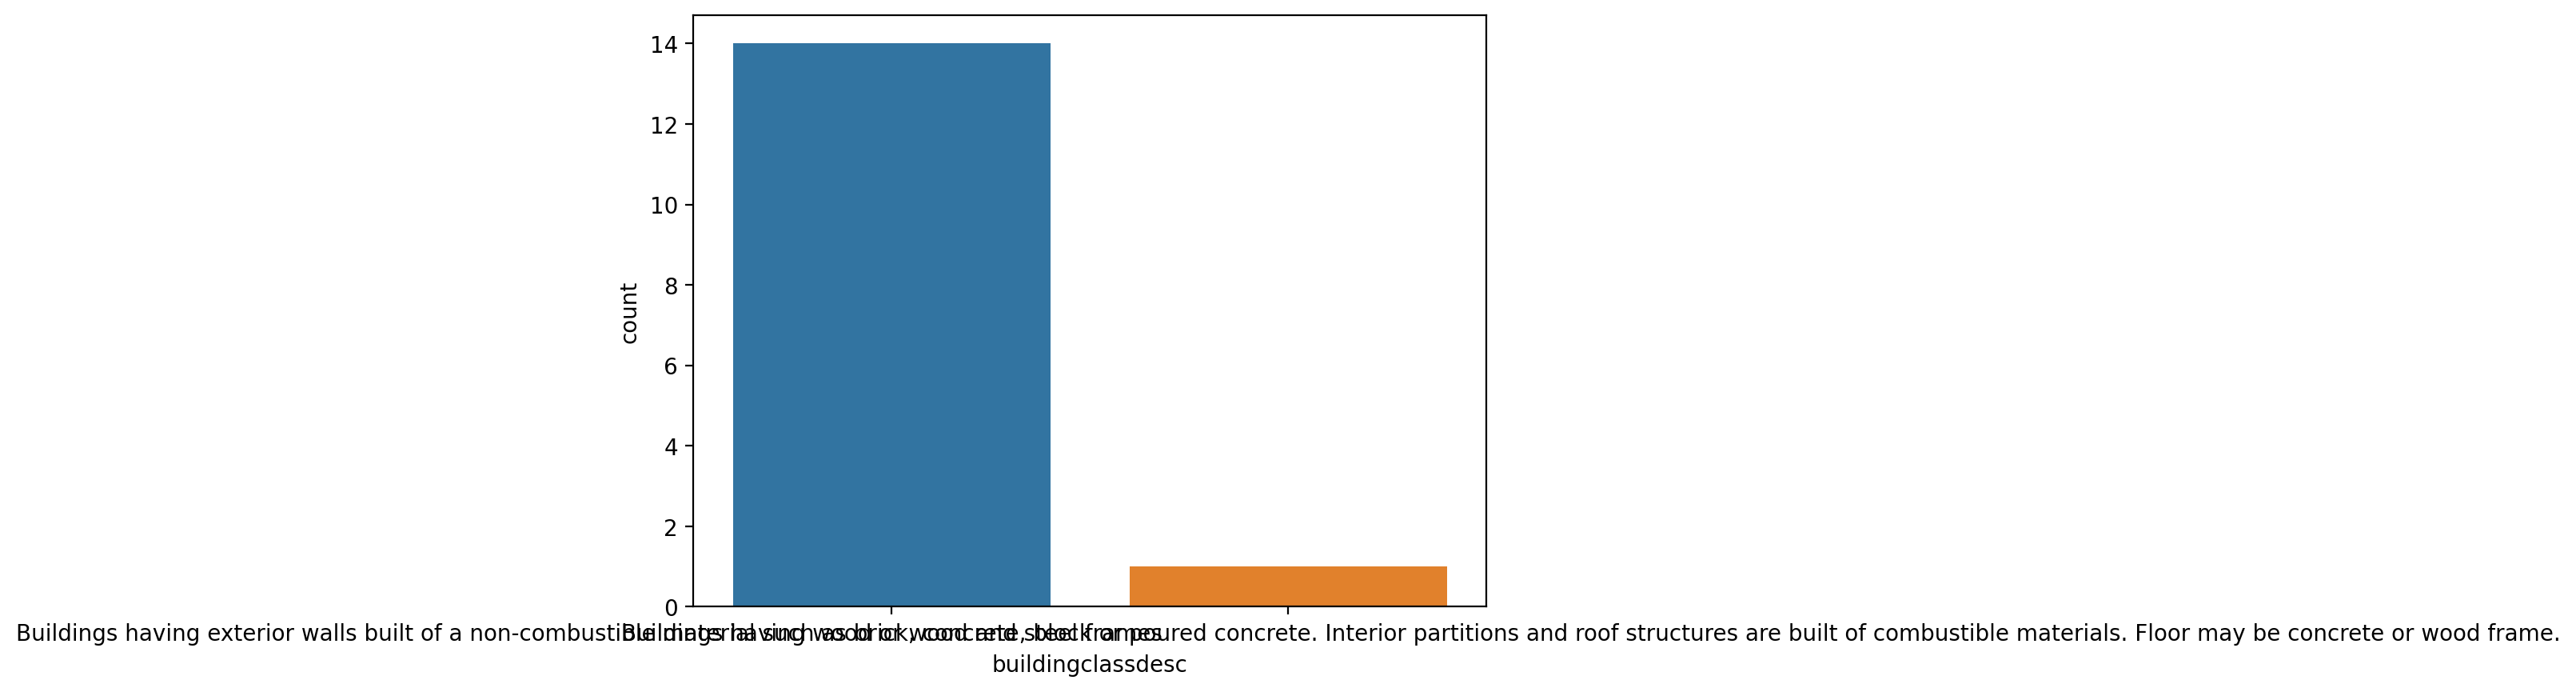

------------------------------
HEATINGORSYSTEMDESC


Central       33550
Floor/Wall    14065
Yes             846
Forced air      776
Solar           104
None             59
Radiant          23
Baseboard        13
Gravity           3
Heat Pump         1
Name: heatingorsystemdesc, dtype: int64

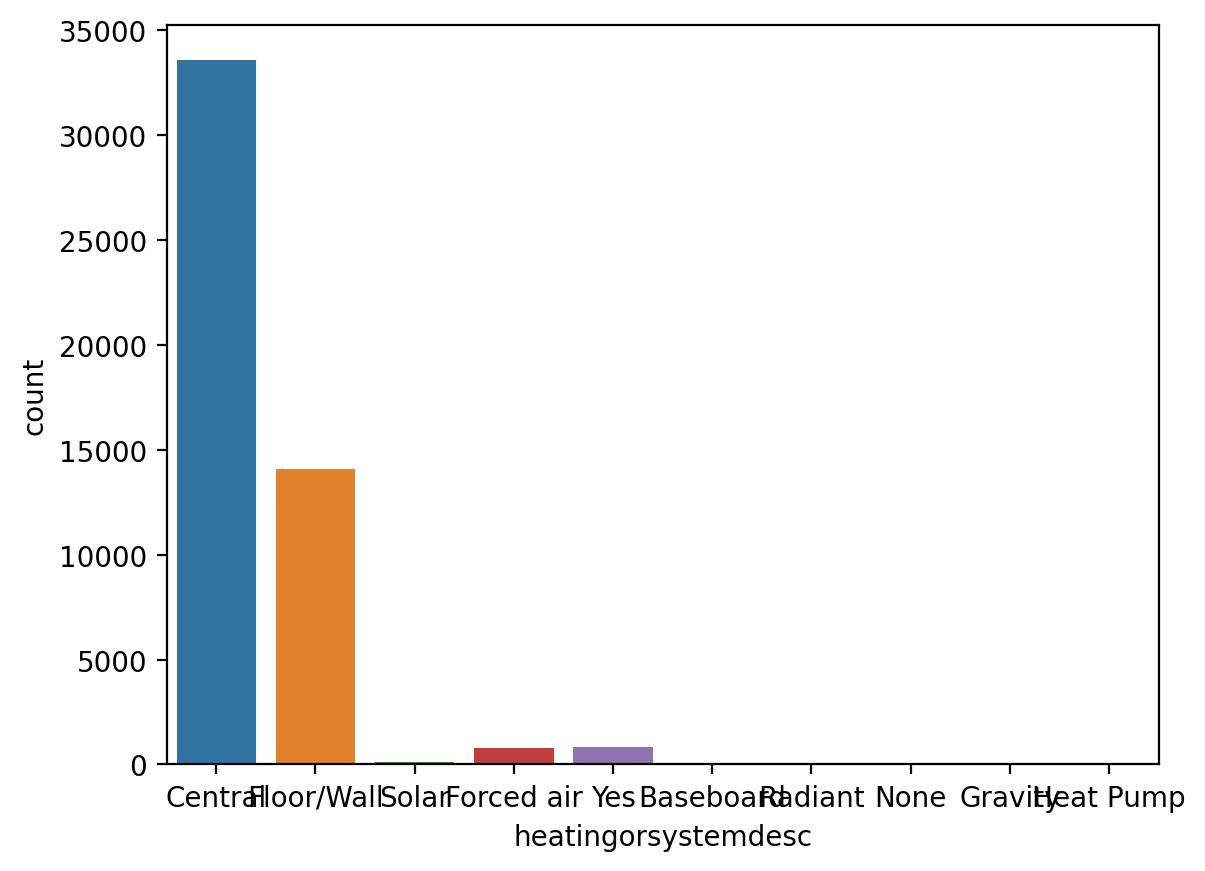

------------------------------
PROPERTYLANDUSEDESC


Single Family Residential                     52320
Condominium                                   19294
Duplex (2 Units, Any Combination)              2009
Planned Unit Development                       1944
Quadruplex (4 Units, Any Combination)           727
Triplex (3 Units, Any Combination)              535
Cluster Home                                    333
Mobile Home                                      74
Manufactured, Modular, Prefabricated Homes       58
Residential General                              37
Name: propertylandusedesc, dtype: int64

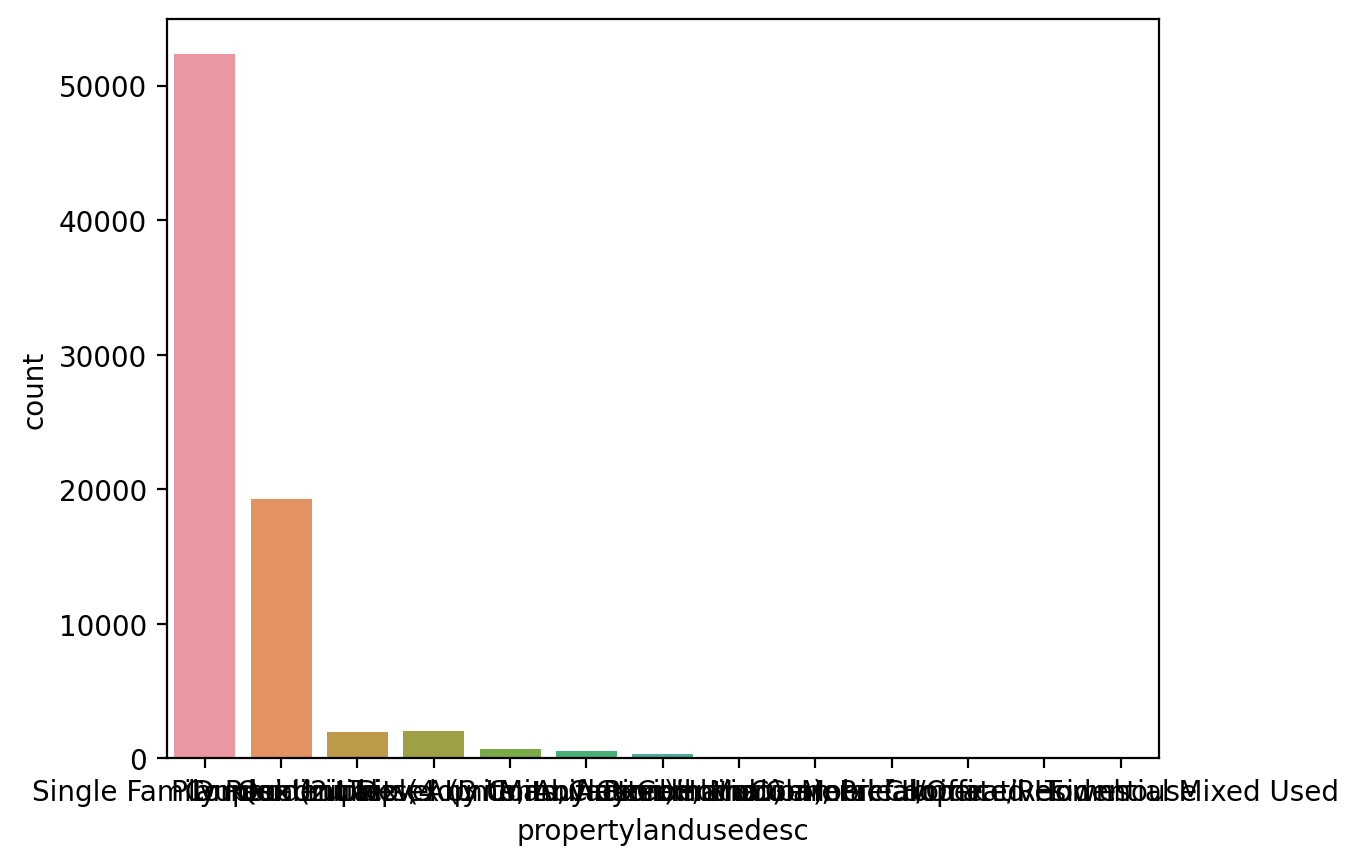

------------------------------
STORYDESC


Basement    50
Name: storydesc, dtype: int64

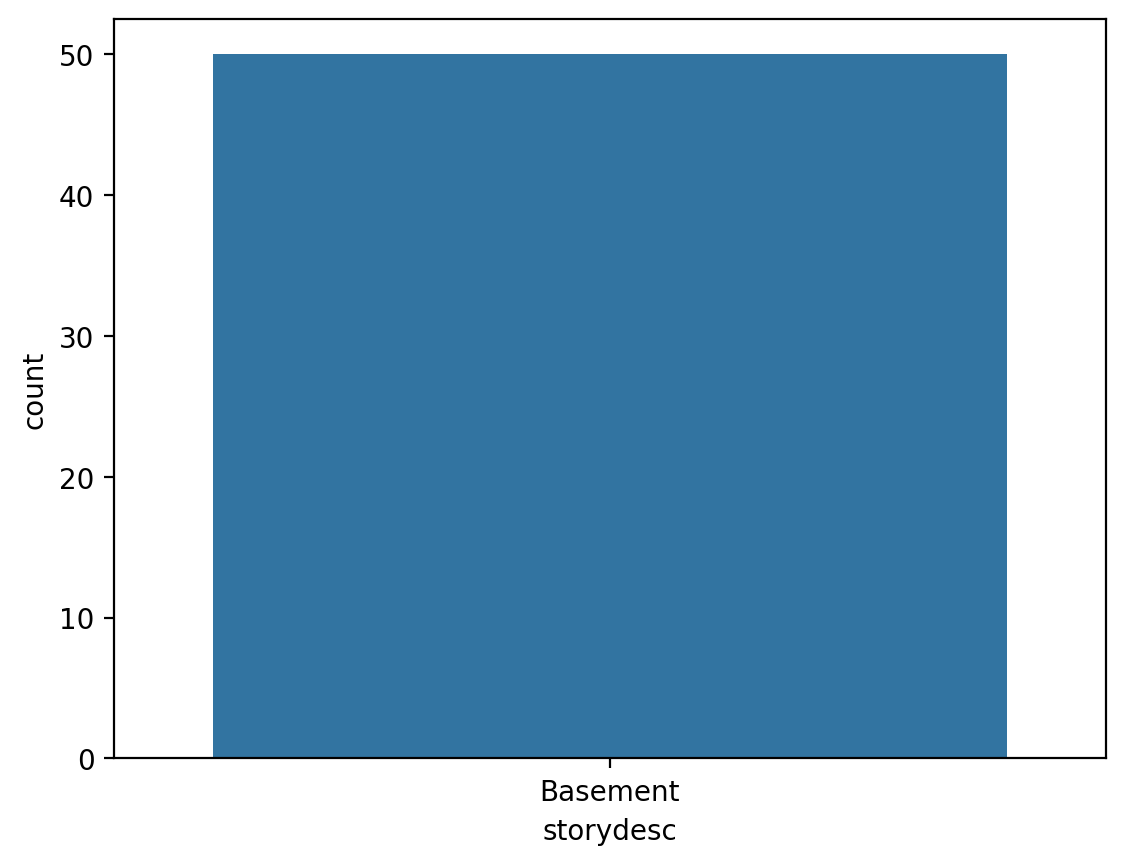

------------------------------
TYPECONSTRUCTIONDESC


Frame       219
Concrete      1
Metal         1
Masonry       1
Name: typeconstructiondesc, dtype: int64

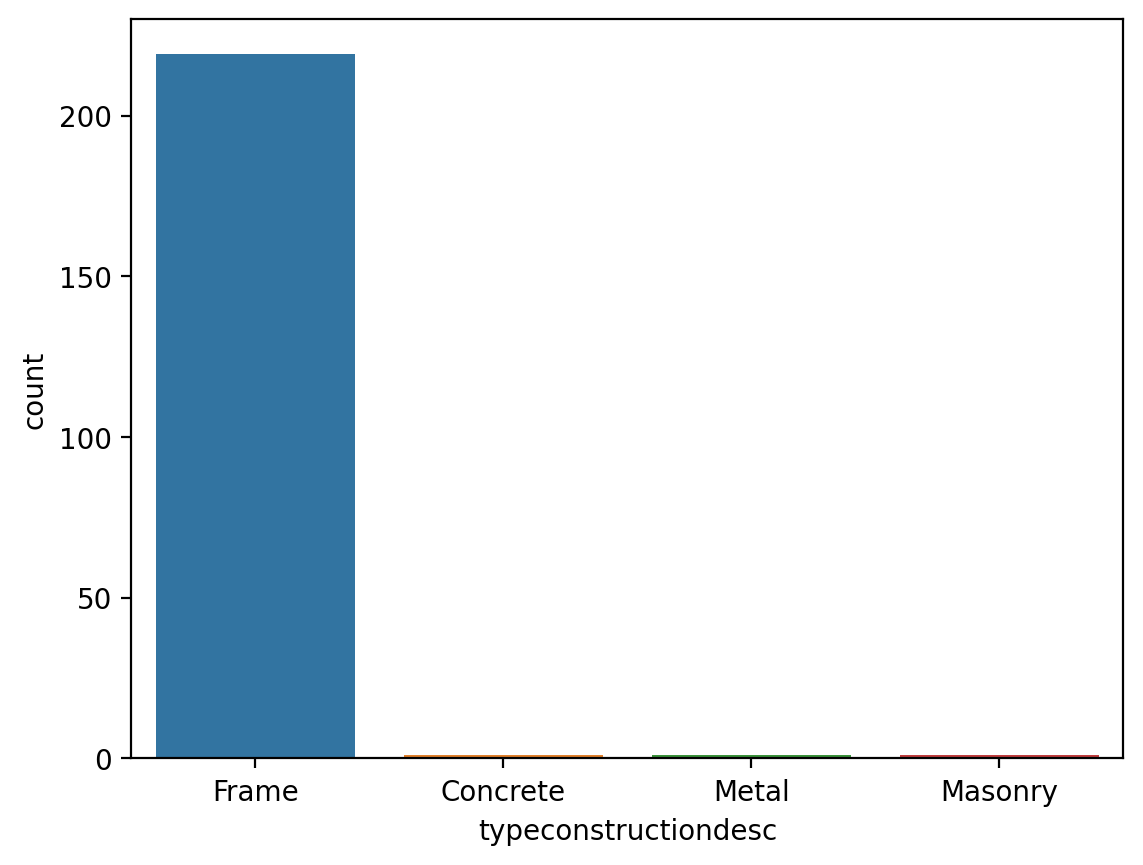

In [30]:
display(df.describe())
display(df.info()) # has dtypes and shapes

for col in df.columns:
    print('-'*30)
    print(col.upper())
    
    if df[col].dtype=='object':
        display(df[col].value_counts().head(10))
        sns.countplot(df, x=col)
        plt.show()

    if pd.api.types.is_numeric_dtype(df[col]):
        sns.boxplot(x=df[col])
        plt.show()
        
    

3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [27]:
def show_missing(df):
    return pd.DataFrame({'num_rows_missing': df.isna().mean(),
                         'pct_rows_missing': df.isna().mean()})
show_missing(df).head()

,num_rows_missing,pct_rows_missing
parcelid,0.000000,0.000000
basementsqft,0.999354,0.999354
bathroomcnt,0.000000,0.000000
bedroomcnt,0.000000,0.000000
buildingqualitytypeid,0.358085,0.358085


# Prepare

- [ ] Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.

Investigate values that indicate non-single unit properties:
- property land use: 
    - Single Family Residential 
    - Planned Unit Development
    - Mobile Home 
    - Manufactured, Modular, Prefabricated Homes
    - Residential General                              
    - Cooperative 

In [29]:
df['propertylandusedesc'].value_counts()

Single Family Residential                     52320
Condominium                                   19294
Duplex (2 Units, Any Combination)              2009
Planned Unit Development                       1944
Quadruplex (4 Units, Any Combination)           727
Triplex (3 Units, Any Combination)              535
Cluster Home                                    333
Mobile Home                                      74
Manufactured, Modular, Prefabricated Homes       58
Residential General                              37
Cooperative                                      29
Commercial/Office/Residential Mixed Used         15
Townhouse                                         6
Name: propertylandusedesc, dtype: int64

In [33]:
df = df[df['propertylandusedesc'].isin(['Single Family Residential', 'Planned Unit Development',
                                        'Mobile Home', 'Manufactured, Modular', 'Prefabricated Homes',
                                        'Residential General', 'Cooperative'])]

- [ ] Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

- The input:
    - A dataframe
    - A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
    - A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
- The output:
    - The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows - in your function.
- hint:
    - Look up the dropna documentation.
    - You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.

First drop columns with lots of missing values:

In [74]:
df.T.isna().mean() > .75

77612    False
77611    False
77610    False
77609    False
77428    False
         ...  
7        False
6        False
3        False
2        False
0        False
Length: 54404, dtype: bool

In [72]:
df[df.T.isna().mean()]

,parcelid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
77597,11953526,NaN,0.0,0.0,NaN,NaN,NaN,NaN,892.0,892.0,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,34102816.0,-118242343.0,5201.0,NaN,NaN,NaN,NaN,NaN,0100,LAM2,6.037187e+07,12447.0,3101.0,403191.0,96020.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6394.0,34124.0,2016.0,27730.0,490.51,None,NaN,6.037187e+13,-0.159471,2017-09-19,None,None,None,None,Single Family Residential,None,None
77256,14447871,NaN,2.0,1.0,NaN,2.0,NaN,NaN,2508.0,2508.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,677.0,NaN,33450438.0,-117655787.0,20090.0,NaN,NaN,NaN,NaN,NaN,122,None,6.059042e+07,NaN,1286.0,NaN,96956.0,4.0,NaN,NaN,NaN,NaN,1958.0,1.0,NaN,130033.0,183902.0,2016.0,53869.0,3063.06,None,NaN,6.059042e+13,0.047553,2017-09-18,None,None,None,None,Single Family Residential,None,None
76900,13945905,NaN,3.0,5.0,NaN,3.0,NaN,NaN,2307.0,2307.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,1.0,396.0,NaN,33746945.0,-117979745.0,7205.0,NaN,NaN,NaN,NaN,NaN,122,None,6.059100e+07,NaN,1286.0,NaN,96973.0,5.0,NaN,NaN,NaN,NaN,1956.0,1.0,NaN,118846.0,642000.0,2016.0,523154.0,7593.26,None,NaN,6.059100e+13,0.016791,2017-09-15,None,None,None,None,Single Family Residential,None,None
76879,14181840,NaN,3.0,4.0,NaN,3.0,NaN,NaN,2073.0,2073.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,416.0,NaN,33872807.0,-117860965.0,3300.0,NaN,NaN,NaN,NaN,NaN,122,None,6.059012e+07,26531.0,1286.0,NaN,97068.0,0.0,NaN,NaN,NaN,NaN,1996.0,NaN,NaN,266823.0,328535.0,2016.0,61712.0,4381.58,None,NaN,6.059012e+13,0.040903,2017-09-15,None,None,None,None,Single Family Residential,None,None
76881,13984343,NaN,2.0,3.0,NaN,2.0,NaN,NaN,1480.0,1480.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,460.0,NaN,33460212.0,-117665444.0,5670.0,NaN,NaN,NaN,NaN,NaN,122,None,6.059042e+07,NaN,1286.0,NaN,96956.0,7.0,NaN,NaN,NaN,NaN,1970.0,1.0,NaN,50182.0,78878.0,2016.0,28696.0,1865.18,None,NaN,6.059042e+13,0.042185,2017-09-15,None,None,None,None,Single Family Residential,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,14190895,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6059.0,NaN,NaN,NaN,NaN,NaN,33879900.0,-117801183.0,39184.0,NaN,NaN,NaN,NaN,NaN,122,None,6.059022e+07,21412.0,1286.0,NaN,97078.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,432623.0,830145.0,2016.0,397522.0,9354.84,None,NaN,6.059022e+13,-0.001296,2017-01-03,None,None,None,None,Single Family Residential,None,None
404,14484783,NaN,3.0,2.0,NaN,3.0,NaN,NaN,1723.0,1723.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,444.0,NaN,33615303.0,-117619530.0,2800.0,NaN,NaN,NaN,NaN,NaN,122,None,6.059032e+07,15554.0,1286.0,NaN,96993.0,0.0,NaN,NaN,NaN,NaN,1993.0,NaN,NaN,195331.0,568508.0,2016.0,373177.0,7187.60,None,NaN,6.059032e+13,-0.009241,2017-01-03,None,None,None,None,Single Family Residential,None,None
37,11682477,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,34045737.0,-118740777.0,6430.0,NaN,NaN,NaN,NaN,NaN,010V,LCA11*,6.037800e+07,12520.0,31

In [64]:
df.T.isna().mean()

77612    0.483333
77611    0.466667
77610    0.433333
77609    0.466667
77428    0.483333
           ...   
7        0.483333
6        0.416667
3        0.450000
2        0.466667
0        0.500000
Length: 54404, dtype: float64

In [58]:
df.isna().mean()

parcelid                        0.000000
basementsqft                    0.999136
bathroomcnt                     0.000000
bedroomcnt                      0.000000
buildingqualitytypeid           0.344037
calculatedbathnbr               0.003272
decktypeid                      0.992831
finishedfloor1squarefeet        0.919528
calculatedfinishedsquarefeet    0.002261
finishedsquarefeet12            0.005349
finishedsquarefeet13            0.999963
finishedsquarefeet15            1.000000
finishedsquarefeet50            0.919528
finishedsquarefeet6             0.996949
fips                            0.000000
fireplacecnt                    0.867032
fullbathcnt                     0.003272
garagecarcnt                    0.669307
garagetotalsqft                 0.669307
hashottuborspa                  0.972171
latitude                        0.000000
longitude                       0.000000
lotsizesquarefeet               0.008161
poolcnt                         0.789409
poolsizesum     

- Drop columns with more than 40% missing values.
- Investigate columns with missing values between 10% and 40%

In [78]:
df.isna().mean() < .20

parcelid                         True
basementsqft                    False
bathroomcnt                      True
bedroomcnt                       True
buildingqualitytypeid           False
calculatedbathnbr                True
decktypeid                      False
finishedfloor1squarefeet        False
calculatedfinishedsquarefeet     True
finishedsquarefeet12             True
finishedsquarefeet13            False
finishedsquarefeet15            False
finishedsquarefeet50            False
finishedsquarefeet6             False
fips                             True
fireplacecnt                    False
fullbathcnt                      True
garagecarcnt                    False
garagetotalsqft                 False
hashottuborspa                  False
latitude                         True
longitude                        True
lotsizesquarefeet                True
poolcnt                         False
poolsizesum                     False
pooltypeid10                    False
pooltypeid2 

In [80]:
df.loc[:,df.isna().mean() < .20]

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
77612,12826780,2.0,3.0,2.0,1762.0,1762.0,6037.0,2.0,33937685.0,-117996709.0,6347.0,0100,6.037503e+07,14634.0,3101.0,96171.0,0.0,1955.0,140000.0,522000.0,2016.0,382000.0,6317.15,6.037503e+13,0.007204,2017-09-25,Single Family Residential
77611,12773139,1.0,3.0,1.0,1032.0,1032.0,6037.0,1.0,34040895.0,-118038169.0,5074.0,0100,6.037434e+07,36502.0,3101.0,96480.0,0.0,1954.0,32797.0,49546.0,2016.0,16749.0,876.43,6.037434e+13,0.037129,2017-09-21,Single Family Residential
77610,17239384,2.0,4.0,2.0,1612.0,1612.0,6111.0,2.0,34300140.0,-118706327.0,12105.0,1111,6.111008e+07,27110.0,2061.0,97116.0,7.0,1964.0,50683.0,67205.0,2016.0,16522.0,1107.48,6.111008e+13,0.013209,2017-09-21,Single Family Residential
77609,11000655,2.0,2.0,2.0,1286.0,1286.0,6037.0,2.0,34245368.0,-118282383.0,47405.0,0100,6.037101e+07,12447.0,3101.0,96284.0,0.0,1940.0,70917.0,354621.0,2016.0,283704.0,4478.43,6.037101e+13,0.020615,2017-09-20,Single Family Residential
77428,11388980,2.0,3.0,2.0,1518.0,1518.0,6037.0,2.0,33983643.0,-118362294.0,5799.0,0100,6.037703e+07,116042.0,3101.0,96037.0,0.0,1948.0,116897.0,229242.0,2016.0,112345.0,3277.29,6.037703e+13,0.023168,2017-09-19,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,12069064,1.0,2.0,1.0,738.0,738.0,6037.0,1.0,34149214.0,-118239357.0,4214.0,0100,6.037302e+07,45457.0,3101.0,96325.0,0.0,1922.0,18890.0,218552.0,2016.0,199662.0,2366.08,6.037302e+13,0.101723,2017-01-01,Single Family Residential
6,12095076,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,34145202.0,-118179824.0,63000.0,0101,6.037461e+07,47019.0,3101.0,96293.0,0.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,-0.001011,2017-01-01,Single Family Residential
3,12177905,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,13038.0,0101,6.037300e+07,396551.0,3101.0,96330.0,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Single Family Residential
2,14186244,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,122,6.059022e+07,21412.0,1286.0,97078.0,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,Single Family Residential


In [63]:
for col in df.loc[:,df.isna().mean().between(0.1, 0.4) == True].columns:
    display(df[col].value_counts())

6.0     10505
8.0      9329
4.0      8146
7.0      3850
5.0      1508
9.0      1271
11.0      594
10.0      237
3.0       150
12.0       83
1.0         9
2.0         5
Name: buildingqualitytypeid, dtype: int64

LAR1          6486
LARS          1387
LBR1N         1116
SCUR2          865
LARE11         626
              ... 
LVRSP89-21       1
WD4*             1
PDR1-13000       1
LCRA6000ED       1
BGA1*            1
Name: propertyzoningdesc, Length: 1471, dtype: int64

1.0    35763
2.0       28
4.0        2
3.0        1
Name: unitcnt, dtype: int64

Central       22631
Floor/Wall    12556
Forced air      517
Solar            88
None             16
Baseboard         7
Radiant           6
Gravity           2
Yes               1
Name: heatingorsystemdesc, dtype: int64

In [59]:
df.isna().mean().between(0.1, 0.4) == True

parcelid                        False
basementsqft                    False
bathroomcnt                     False
bedroomcnt                      False
buildingqualitytypeid            True
calculatedbathnbr               False
decktypeid                      False
finishedfloor1squarefeet        False
calculatedfinishedsquarefeet    False
finishedsquarefeet12            False
finishedsquarefeet13            False
finishedsquarefeet15            False
finishedsquarefeet50            False
finishedsquarefeet6             False
fips                            False
fireplacecnt                    False
fullbathcnt                     False
garagecarcnt                    False
garagetotalsqft                 False
hashottuborspa                  False
latitude                        False
longitude                       False
lotsizesquarefeet               False
poolcnt                         False
poolsizesum                     False
pooltypeid10                    False
pooltypeid2 

In [81]:
df.isna().mean() < .20

parcelid                         True
basementsqft                    False
bathroomcnt                      True
bedroomcnt                       True
buildingqualitytypeid           False
calculatedbathnbr                True
decktypeid                      False
finishedfloor1squarefeet        False
calculatedfinishedsquarefeet     True
finishedsquarefeet12             True
finishedsquarefeet13            False
finishedsquarefeet15            False
finishedsquarefeet50            False
finishedsquarefeet6             False
fips                             True
fireplacecnt                    False
fullbathcnt                      True
garagecarcnt                    False
garagetotalsqft                 False
hashottuborspa                  False
latitude                         True
longitude                        True
lotsizesquarefeet                True
poolcnt                         False
poolsizesum                     False
pooltypeid10                    False
pooltypeid2 

In [84]:
df = df.loc[:, df.isna().mean() < .20]

In [87]:
df

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
77612,12826780,2.0,3.0,2.0,1762.0,1762.0,6037.0,2.0,33937685.0,-117996709.0,6347.0,0100,6.037503e+07,14634.0,3101.0,96171.0,0.0,1955.0,140000.0,522000.0,2016.0,382000.0,6317.15,6.037503e+13,0.007204,2017-09-25,Single Family Residential
77611,12773139,1.0,3.0,1.0,1032.0,1032.0,6037.0,1.0,34040895.0,-118038169.0,5074.0,0100,6.037434e+07,36502.0,3101.0,96480.0,0.0,1954.0,32797.0,49546.0,2016.0,16749.0,876.43,6.037434e+13,0.037129,2017-09-21,Single Family Residential
77610,17239384,2.0,4.0,2.0,1612.0,1612.0,6111.0,2.0,34300140.0,-118706327.0,12105.0,1111,6.111008e+07,27110.0,2061.0,97116.0,7.0,1964.0,50683.0,67205.0,2016.0,16522.0,1107.48,6.111008e+13,0.013209,2017-09-21,Single Family Residential
77609,11000655,2.0,2.0,2.0,1286.0,1286.0,6037.0,2.0,34245368.0,-118282383.0,47405.0,0100,6.037101e+07,12447.0,3101.0,96284.0,0.0,1940.0,70917.0,354621.0,2016.0,283704.0,4478.43,6.037101e+13,0.020615,2017-09-20,Single Family Residential
77428,11388980,2.0,3.0,2.0,1518.0,1518.0,6037.0,2.0,33983643.0,-118362294.0,5799.0,0100,6.037703e+07,116042.0,3101.0,96037.0,0.0,1948.0,116897.0,229242.0,2016.0,112345.0,3277.29,6.037703e+13,0.023168,2017-09-19,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,12069064,1.0,2.0,1.0,738.0,738.0,6037.0,1.0,34149214.0,-118239357.0,4214.0,0100,6.037302e+07,45457.0,3101.0,96325.0,0.0,1922.0,18890.0,218552.0,2016.0,199662.0,2366.08,6.037302e+13,0.101723,2017-01-01,Single Family Residential
6,12095076,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,34145202.0,-118179824.0,63000.0,0101,6.037461e+07,47019.0,3101.0,96293.0,0.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,-0.001011,2017-01-01,Single Family Residential
3,12177905,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,13038.0,0101,6.037300e+07,396551.0,3101.0,96330.0,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Single Family Residential
2,14186244,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,122,6.059022e+07,21412.0,1286.0,97078.0,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,Single Family Residential


In [107]:
df[df.T.isna().mean() > 0]

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
77467,11347481,3.0,4.0,3.0,3374.0,3374.0,6037.0,3.0,34464642.0,-118519913.0,14153.0,0101,6.037920e+07,NaN,3101.0,96403.0,0.0,2003.0,453000.0,730000.0,2016.0,277000.0,10169.77,6.037920e+13,-0.020198,2017-09-19,Single Family Residential
77454,11346385,3.0,4.0,3.0,2864.0,2864.0,6037.0,3.0,34471177.0,-118520288.0,5943.0,0101,6.037920e+07,NaN,3101.0,96403.0,0.0,2000.0,309054.0,493616.0,2016.0,184562.0,6688.44,6.037920e+13,0.007218,2017-09-19,Single Family Residential
77597,11953526,0.0,0.0,NaN,892.0,892.0,6037.0,NaN,34102816.0,-118242343.0,5201.0,0100,6.037187e+07,12447.0,3101.0,96020.0,0.0,NaN,6394.0,34124.0,2016.0,27730.0,490.51,6.037187e+13,-0.159471,2017-09-19,Single Family Residential
77592,11068972,5.0,4.0,5.0,5210.0,5210.0,6037.0,5.0,34296608.0,-118573153.0,NaN,010D,6.037108e+07,12447.0,3101.0,96356.0,0.0,2010.0,790000.0,1316000.0,2016.0,526000.0,16032.16,6.037108e+13,0.015806,2017-09-19,Planned Unit Development
77510,11116075,3.0,4.0,3.0,2905.0,2905.0,6037.0,3.0,34457428.0,-118562341.0,5738.0,0100,6.037920e+07,NaN,3101.0,96377.0,0.0,2013.0,346161.0,554208.0,2016.0,208047.0,11796.44,6.037920e+13,0.069004,2017-09-19,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,14449536,3.0,4.0,3.0,2379.0,2379.0,6059.0,3.0,33448668.0,-117649755.0,11218.0,1,6.059042e+07,NaN,1286.0,96956.0,0.0,1977.0,221674.0,622298.0,2016.0,400624.0,7150.06,6.059042e+13,0.214188,2017-01-03,Single Family Residential
176,14190895,0.0,0.0,NaN,NaN,NaN,6059.0,NaN,33879900.0,-117801183.0,39184.0,122,6.059022e+07,21412.0,1286.0,97078.0,0.0,NaN,432623.0,830145.0,2016.0,397522.0,9354.84,6.059022e+13,-0.001296,2017-01-03,Single Family Residential
366,12773717,4.0,3.0,4.0,1702.0,1702.0,6037.0,4.0,34036093.0,-118039927.0,NaN,010D,6.037434e+07,36502.0,3101.0,96480.0,0.0,2014.0,248736.0,415237.0,2016.0,166501.0,4925.64,NaN,0.052558,2017-01-03,Planned Unit Development
37,11682477,0.0,0.0,NaN,NaN,NaN,6037.0,NaN,34045737.0,-118740777.0,6430.0,010V,6.037800e+07,12520.0,3101.0,96116.0,0.0,NaN,400000.0,1300000.0,2016.0,900000.0,15311.27,6.037800e+13,0.026208,2017-01-02,Residential General


In [108]:
df.T.isna()

,77612,77611,77610,77609,77428,77422,77423,77424,77425,77426,77429,77430,77420,77433,77434,77436,77418,77419,77438,77416,77415,77414,77412,77410,77409,77408,77407,77406,77405,77440,77439,77456,77469,77468,77467,77466,77465,77464,77463,77462,77461,77459,77457,77455,77403,77454,77453,77452,77451,77450,77449,77448,77447,77446,77445,77444,77400,77402,77359,77353,77354,77355,77357,77360,77401,77361,77363,77365,77366,77349,77348,77346,77345,77344,77342,77341,77340,77338,77337,77368,77369,77386,77399,77398,77397,77396,77395,77394,77392,77391,77388,77370,77383,77382,77380,77378,77377,77376,77375,77374,...,257,258,259,260,262,264,265,266,267,268,270,271,269,312,314,315,316,324,328,322,311,303,297,298,299,302,300,304,306,42,36,37,38,33,41,49,43,44,47,48,50,51,52,31,53,32,30,29,8,10,13,15,16,18,21,22,23,25,26,27,28,54,57,84,85,86,87,90,91,92,95,97,99,101,102,103,81,83,67,58,60,61,63,78,65,66,68,76,75,77,73,72,71,70,1,7,6,3,2,0
parcelid,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathroomcnt,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedroomcnt,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,Fa

In [106]:
df.T.isna().mean() > 0

77612    False
77611    False
77610    False
77609    False
77428    False
         ...  
7        False
6        False
3        False
2        False
0        False
Length: 54404, dtype: bool

In [109]:
df[df.T.isna().mean() > 0]

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
77467,11347481,3.0,4.0,3.0,3374.0,3374.0,6037.0,3.0,34464642.0,-118519913.0,14153.0,0101,6.037920e+07,NaN,3101.0,96403.0,0.0,2003.0,453000.0,730000.0,2016.0,277000.0,10169.77,6.037920e+13,-0.020198,2017-09-19,Single Family Residential
77454,11346385,3.0,4.0,3.0,2864.0,2864.0,6037.0,3.0,34471177.0,-118520288.0,5943.0,0101,6.037920e+07,NaN,3101.0,96403.0,0.0,2000.0,309054.0,493616.0,2016.0,184562.0,6688.44,6.037920e+13,0.007218,2017-09-19,Single Family Residential
77597,11953526,0.0,0.0,NaN,892.0,892.0,6037.0,NaN,34102816.0,-118242343.0,5201.0,0100,6.037187e+07,12447.0,3101.0,96020.0,0.0,NaN,6394.0,34124.0,2016.0,27730.0,490.51,6.037187e+13,-0.159471,2017-09-19,Single Family Residential
77592,11068972,5.0,4.0,5.0,5210.0,5210.0,6037.0,5.0,34296608.0,-118573153.0,NaN,010D,6.037108e+07,12447.0,3101.0,96356.0,0.0,2010.0,790000.0,1316000.0,2016.0,526000.0,16032.16,6.037108e+13,0.015806,2017-09-19,Planned Unit Development
77510,11116075,3.0,4.0,3.0,2905.0,2905.0,6037.0,3.0,34457428.0,-118562341.0,5738.0,0100,6.037920e+07,NaN,3101.0,96377.0,0.0,2013.0,346161.0,554208.0,2016.0,208047.0,11796.44,6.037920e+13,0.069004,2017-09-19,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,14449536,3.0,4.0,3.0,2379.0,2379.0,6059.0,3.0,33448668.0,-117649755.0,11218.0,1,6.059042e+07,NaN,1286.0,96956.0,0.0,1977.0,221674.0,622298.0,2016.0,400624.0,7150.06,6.059042e+13,0.214188,2017-01-03,Single Family Residential
176,14190895,0.0,0.0,NaN,NaN,NaN,6059.0,NaN,33879900.0,-117801183.0,39184.0,122,6.059022e+07,21412.0,1286.0,97078.0,0.0,NaN,432623.0,830145.0,2016.0,397522.0,9354.84,6.059022e+13,-0.001296,2017-01-03,Single Family Residential
366,12773717,4.0,3.0,4.0,1702.0,1702.0,6037.0,4.0,34036093.0,-118039927.0,NaN,010D,6.037434e+07,36502.0,3101.0,96480.0,0.0,2014.0,248736.0,415237.0,2016.0,166501.0,4925.64,NaN,0.052558,2017-01-03,Planned Unit Development
37,11682477,0.0,0.0,NaN,NaN,NaN,6037.0,NaN,34045737.0,-118740777.0,6430.0,010V,6.037800e+07,12520.0,3101.0,96116.0,0.0,NaN,400000.0,1300000.0,2016.0,900000.0,15311.27,6.037800e+13,0.026208,2017-01-02,Residential General


In [ ]:
df.dropna()

In [92]:
df.T.isna().sum().value_counts()

0.000000    52423
0.037037     1682
0.074074      110
0.185185       80
0.111111       54
0.222222       22
0.148148       21
0.259259        6
0.296296        2
0.333333        2
0.370370        2
dtype: int64

In [95]:
df[df.T.isna().mean() < .20]

54370

In [99]:
def handle_missing_values(df, prop_required_column=.2, prop_required_row=.2):
    # drop columns with x% or more of missing data
    df = df.loc[:, df.isna().mean() < prop_required_column]
    
    # drop rows with x% or more of missing features
    df = df[df.T.isna().mean() < prop_required_row]
    return df

In [100]:
handle_missing_values(df, prop_required_column=.2, prop_required_row=.2)

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
77612,12826780,2.0,3.0,2.0,1762.0,1762.0,6037.0,2.0,33937685.0,-117996709.0,6347.0,0100,6.037503e+07,14634.0,3101.0,96171.0,0.0,1955.0,140000.0,522000.0,2016.0,382000.0,6317.15,6.037503e+13,0.007204,2017-09-25,Single Family Residential
77611,12773139,1.0,3.0,1.0,1032.0,1032.0,6037.0,1.0,34040895.0,-118038169.0,5074.0,0100,6.037434e+07,36502.0,3101.0,96480.0,0.0,1954.0,32797.0,49546.0,2016.0,16749.0,876.43,6.037434e+13,0.037129,2017-09-21,Single Family Residential
77610,17239384,2.0,4.0,2.0,1612.0,1612.0,6111.0,2.0,34300140.0,-118706327.0,12105.0,1111,6.111008e+07,27110.0,2061.0,97116.0,7.0,1964.0,50683.0,67205.0,2016.0,16522.0,1107.48,6.111008e+13,0.013209,2017-09-21,Single Family Residential
77609,11000655,2.0,2.0,2.0,1286.0,1286.0,6037.0,2.0,34245368.0,-118282383.0,47405.0,0100,6.037101e+07,12447.0,3101.0,96284.0,0.0,1940.0,70917.0,354621.0,2016.0,283704.0,4478.43,6.037101e+13,0.020615,2017-09-20,Single Family Residential
77428,11388980,2.0,3.0,2.0,1518.0,1518.0,6037.0,2.0,33983643.0,-118362294.0,5799.0,0100,6.037703e+07,116042.0,3101.0,96037.0,0.0,1948.0,116897.0,229242.0,2016.0,112345.0,3277.29,6.037703e+13,0.023168,2017-09-19,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,12069064,1.0,2.0,1.0,738.0,738.0,6037.0,1.0,34149214.0,-118239357.0,4214.0,0100,6.037302e+07,45457.0,3101.0,96325.0,0.0,1922.0,18890.0,218552.0,2016.0,199662.0,2366.08,6.037302e+13,0.101723,2017-01-01,Single Family Residential
6,12095076,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,34145202.0,-118179824.0,63000.0,0101,6.037461e+07,47019.0,3101.0,96293.0,0.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,-0.001011,2017-01-01,Single Family Residential
3,12177905,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,13038.0,0101,6.037300e+07,396551.0,3101.0,96330.0,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Single Family Residential
2,14186244,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,122,6.059022e+07,21412.0,1286.0,97078.0,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,Single Family Residential


- [ ] Encapsulate your work inside of functions in a wrangle_zillow.py module.